# **Import Library**

In [ ]:
!apt update
!yes Y | apt-get install openjdk-8-jdk

!pip install language-check
!pip install pycontractions
!pip install word2number
!pip install vaderSentiment
!pip install textaugment
!pip install wordcloud

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Hit:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease      
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease         
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done                  
Building dependency tree       
Reading state information... Done
65 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u312-b07-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.
yes: standard output: Broken pipe


In [ ]:
import itertools
import tweepy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

pd.set_option('display.max_colwidth', None)

In [ ]:
import re
import string
import nltk
import unicodedata
from bs4 import BeautifulSoup
from word2number import w2n
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from pycontractions import Contractions
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textaugment import EDA

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import gensim
import tensorflow as tf
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from keras.models import Model
from keras.layers import (Input,
                          Embedding, 
                          Conv1D, 
                          MaxPooling1D, 
                          LSTM, 
                          Dropout, 
                          Dense, 
                          Flatten)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [ ]:
!pip freeze > requirement.txt

# **Crawling Twitter Dataset**

In [ ]:
ACCESS_TOKEN = '1491321301377904640-3f34SrhEWeXTNchIPVp7P1ZETxaoN0'
ACCESS_TOKEN_SECRET = 'sc3mB96PjXkR53e5K4g8binVxuohShV1WYZsuxkbofxCH'
CONSUMER_KEY = '77fSLVCOYcm2pX5rwxieKYEI4'
CONSUMER_SECRET = 'nikfO3dn95p5em3hgXUO7SYFuHpH3DS7S0WByOvoDaE3L9zbD1'

In [ ]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
search_sinovac_keywords = '(sinovac OR #sinovac) -moderna -pfizer -astrazeneca lang:en -is:retweet'
search_astrazeneca_keywords = '(astrazeneca OR #astrazeneca) -moderna -pfizer -sinovac lang:en -is:retweet'
search_pfizer_keywords = '(pfizer OR #pfizer) -sinovac -moderna -astrazeneca lang:en -is:retweet'
search_moderna_keywords = '(moderna OR #moderna) -sinovac -pfizer -astrazeneca lang:en -is:retweet'

In [ ]:
tweets = tweepy.Cursor(api.search, q=search_astrazeneca_keywords, tweet_mode='extended', lang='en').items(2000)

In [ ]:
tweet_texts = []
tweet_dates = []
tweet_langs = []
for tweet in tweets:
    tweet_texts.append(tweet.full_text)
    tweet_dates.append(tweet.lang)
    tweet_langs.append(tweet.created_at)

In [ ]:
df = pd.DataFrame({'text': tweets_text, 'lang': tweets_lang, 'date': tweets_date})
df.head()

In [ ]:
df.shape

In [ ]:
df.to_csv('astrazeneca42.csv', index=False)

# **Concat and Read Dataset**

## **Concate Dataset: Sinovac**

In [ ]:
df_sinovac1 = pd.read_csv('raw/sinovac1.csv')
df_sinovac2 = pd.read_csv('raw/sinovac2.csv')
df_sinovac3 = pd.read_csv('raw/sinovac3.csv')
df_sinovac41 = pd.read_csv('raw/sinovac41.csv')
df_sinovac42 = pd.read_csv('raw/sinovac42.csv')

df_sinovac = pd.concat([df_sinovac1, df_sinovac2, df_sinovac3, df_sinovac41, df_sinovac42], ignore_index=True)

## **Concate Dataset: AstraZeneca**

In [ ]:
df_astrazeneca1 = pd.read_csv('raw/astrazeneca1.csv')
df_astrazeneca2 = pd.read_csv('raw/astrazeneca2.csv')
df_astrazeneca3 = pd.read_csv('raw/astrazeneca3.csv')
df_astrazeneca41 = pd.read_csv('raw/astrazeneca41.csv')
df_astrazeneca42 = pd.read_csv('raw/astrazeneca42.csv')

df_astrazeneca = pd.concat([df_astrazeneca1, df_astrazeneca2, df_astrazeneca3, df_astrazeneca41, df_astrazeneca42], ignore_index=True)

## **Concate Dataset: Pfizer**

In [ ]:
df_pfizer1 = pd.read_csv('raw/pfizer1.csv')
df_pfizer2 = pd.read_csv('raw/pfizer2.csv')
df_pfizer3 = pd.read_csv('raw/pfizer3.csv')
df_pfizer41 = pd.read_csv('raw/pfizer41.csv')
df_pfizer42 = pd.read_csv('raw/pfizer42.csv')

df_pfizer = pd.concat([df_pfizer1, df_pfizer2, df_pfizer3, df_pfizer41, df_pfizer42], ignore_index=True)

## **Concate Dataset: Moderna**

In [ ]:
df_moderna1 = pd.read_csv('raw/moderna1.csv')
df_moderna2 = pd.read_csv('raw/moderna2.csv')
df_moderna3 = pd.read_csv('raw/moderna3.csv')
df_moderna41 = pd.read_csv('raw/moderna41.csv')
df_moderna42 = pd.read_csv('raw/moderna42.csv')

df_moderna = pd.concat([df_moderna1, df_moderna2, df_moderna3, df_moderna41, df_moderna42], ignore_index=True)

In [ ]:
df_sinovac.to_csv('merged/sinovac_merged.csv', index=False)
df_astrazeneca.to_csv('merged/astrazeneca_merged.csv', index=False)
df_pfizer.to_csv('merged/pfizer_merged.csv', index=False)
df_moderna.to_csv('merged/moderna_merged.csv', index=False)

# **Read and Filter Dataset**

## **Read and Filter Dataset: Sinovac**

In [ ]:
df_sinovac = pd.read_csv('merged/sinovac_merged.csv')

In [ ]:
df_sinovac.head(5)

text  \
0                                  @LycosAustralis @ekecheirion In America Sputnik will never get approved but Sinovac probably will eventually   
1                                                                @JKJAVMY hi, may i know this station got sinovac for 9 years old kid ?? thanks   
2  RT @gsgcd13: 3/6/2022 Miles Guo: The CCP has just distributed 250 million doses of the so-called high-end Sinovac COVID vaccine to Hong Kon…   
3                                                                    @hkstream @webbhk Might be kids - only Sinovac available for them I think.   
4                                                           @webbhk Any theory on why a large majority is now choosing Sinovac? Makes no sense…   

  lang                 date  
0   en  2022-03-07 09:20:56  
1   en  2022-03-07 09:20:22  
2   en  2022-03-07 09:12:24  
3   en  2022-03-07 09:08:05  
4   en  2022-03-07 09:02:54

In [ ]:
df_sinovac.dtypes

text    object
lang    object
date    object
dtype: object

In [ ]:
before_filtered = df_sinovac.shape
print('Shape before filtered : ', before_filtered)

Shape before filtered :  (9697, 3)


In [ ]:
start_date_before_filtered = min(df_sinovac['date'])
end_date_before_filtered = max(df_sinovac['date'])

print('Start date : ', start_date_before_filtered)
print('End date : ', end_date_before_filtered)

Start date :  2022-02-27 02:14:53
End date :  2022-04-01 12:12:17


In [ ]:
# Filter only March
df_sinovac = df_sinovac.drop(df_sinovac[df_sinovac['date'] < '2022-03-01 00:00:00'].index)
df_sinovac = df_sinovac.drop(df_sinovac[df_sinovac['date'] > '2022-03-31 24:59:59'].index)
df_sinovac = df_sinovac.drop(df_sinovac[df_sinovac['lang'] != 'en'].index)
df_sinovac = df_sinovac.reset_index(drop=True)

In [ ]:
after_filtered = df_sinovac.shape
print('Shape after filtered : ', after_filtered)

Shape after filtered :  (9270, 3)


In [ ]:
start_date_after_filtered = min(df_sinovac['date'])
end_date_after_filtered = max(df_sinovac['date'])


print('Start date after filtered : ', start_date_after_filtered)
print('End date after filtered : ', end_date_after_filtered)

Start date after filtered :  2022-03-01 00:06:46
End date after filtered :  2022-03-31 23:45:03


## **Read and Filter Dataset: AstraZeneca**

In [ ]:
df_astrazeneca = pd.read_csv('merged/astrazeneca_merged.csv')

In [ ]:
df_astrazeneca.head(5)

text  \
0                                                RT @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
1                                                RT @DrJohnB2: Longitudinally extensive transverse myelitis (inflammation of the spinal cord) after #CovidVaccination (AstraZeneca): https:/…   
2                                                RT @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
3  Did Shane have the AstraZeneca jab? How many boxers have heart trouble cutting weight? Shane was a professional athlete with nutritional knowledge and experience. https://t.co/xDosQsgbXe   
4                                                 RT @1MikeFairclough: “That, sadly, is the situation of Lisa Shaw’s family. The 44-year-old BBC Radio Newcastle presenter died from a brain…   

  lang                 date  
0   en  2022-03-07 09:26:38  
1   en  2022-03-07 09:23:47  
2   en  2022-03-07 09:23:13  
3   en  2022-03-07 09:20:04  
4   en  2022-03-07 09:18:49

In [ ]:
df_astrazeneca.dtypes

text    object
lang    object
date    object
dtype: object

In [ ]:
before_filtered = df_astrazeneca.shape
print('Shape before filtered : ', before_filtered)

Shape before filtered :  (8651, 3)


In [ ]:
start_date_before_filtered = min(df_astrazeneca['date'])
end_date_before_filtered = max(df_astrazeneca['date'])

print('Start date : ', start_date_before_filtered)
print('End date : ', end_date_before_filtered)

Start date :  2022-03-04 20:07:10
End date :  2022-04-01 13:11:55


In [ ]:
# Filter only March
df_astrazeneca = df_astrazeneca.drop(df_astrazeneca[df_astrazeneca['date'] < '2022-03-01 00:00:00'].index)
df_astrazeneca = df_astrazeneca.drop(df_astrazeneca[df_astrazeneca['date'] > '2022-03-31 24:59:59'].index)
df_astrazeneca = df_astrazeneca.drop(df_astrazeneca[df_astrazeneca['lang'] != 'en'].index)
df_astrazeneca = df_astrazeneca.reset_index(drop=True)

In [ ]:
after_filtered = df_astrazeneca.shape
print('Shape after filtered : ', after_filtered)

Shape after filtered :  (8443, 3)


In [ ]:
start_date_after_filtered = min(df_astrazeneca['date'])
end_date_after_filtered = max(df_astrazeneca['date'])


print('Start date after filtered : ', start_date_after_filtered)
print('End date after filtered : ', end_date_after_filtered)

Start date after filtered :  2022-03-04 20:07:10
End date after filtered :  2022-03-31 23:58:56


## **Read and Filter Dataset: Pfizer**

In [ ]:
df_pfizer = pd.read_csv('merged/pfizer_merged.csv')

In [ ]:
df_pfizer.head(5)

text  \
0                                                                                            RT @theysayitsrare: Nothing to see here ... just a $2.8M wire transfer from Pfizer to the FDA 😉 https://t.co/ucxdFXbWBk   
1                                                                     RT @LfcJmr: @DrLoupis Pfizer Could Lose Liability Protection and Be Sued if the Deaths Are Proven as Willful\n\nThomasRenz: "I don't know how…   
2                                                                                      RT @ABert1968: Pfizer Admits its Vaccine Ineffective in Children 5 to 11 but Not One Single Governor Stops Injecting Children   
3                                                                       RT @TheRaiderRandy: Dr. Robert Malone says the initial batch of Pfizer documents show the “government has been well aware that they [the va…   
4  @JaydeLovell The effects can go up to 2-3 years and Pfizer's released documentation shows page after page of damaging side effects most of which are fatal and already 25,000+ recorded  deaths in America alone.   

  lang                 date  
0   en  2022-03-07 09:22:07  
1   en  2022-03-07 09:22:02  
2   en  2022-03-07 09:22:02  
3   en  2022-03-07 09:22:01  
4   en  2022-03-07 09:22:01

In [ ]:
df_pfizer.dtypes

text    object
lang    object
date    object
dtype: object

In [ ]:
before_filtered = df_pfizer.shape
print('Shape before filtered : ', before_filtered)

Shape before filtered :  (10000, 3)


In [ ]:
start_date_before_filtered = min(df_pfizer['date'])
end_date_before_filtered = max(df_pfizer['date'])

print('Start date : ', start_date_before_filtered)
print('End date : ', end_date_before_filtered)

Start date :  2022-03-07 07:53:36
End date :  2022-04-01 12:37:42


In [ ]:
# Filter only March
df_pfizer = df_pfizer.drop(df_pfizer[df_pfizer['date'] < '2022-03-01 00:00:00'].index)
df_pfizer = df_pfizer.drop(df_pfizer[df_pfizer['date'] > '2022-03-31 24:59:59'].index)
df_pfizer = df_pfizer.drop(df_pfizer[df_pfizer['lang'] != 'en'].index)
df_pfizer = df_pfizer.reset_index(drop=True)

In [ ]:
after_filtered = df_pfizer.shape
print('Shape after filtered : ', after_filtered)

Shape after filtered :  (8000, 3)


In [ ]:
start_date_after_filtered = min(df_pfizer['date'])
end_date_after_filtered = max(df_pfizer['date'])


print('Start date after filtered : ', start_date_after_filtered)
print('End date after filtered : ', end_date_after_filtered)

Start date after filtered :  2022-03-07 07:53:36
End date after filtered :  2022-03-29 14:55:14


## **Read and Filter Dataset: Moderna**

In [ ]:
df_moderna = pd.read_csv('merged/moderna_merged.csv')

In [ ]:
df_moderna.head(5)

text  \
0         RT @SAHealth: A half dose of the Moderna COVID-19 vaccine is available for children aged 6 to 11 at selected pharmacies and GPs.\n\nCheck wit…   
1     RT @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
2           RT @INArteCarloDoss: I assume everyone read the paper published in Frontiers in Virology on Feb 21 that discovered that a sequence of the C…   
3     RT @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
4  RT @JeanRees10: DEATH\n\n29 yo female - Foreign\n\n6 days post 2nd dose Moderna\n\nCardiac Arrest\nPulmonary Thromboembolism\n\n"Cardiac arrest; AST…   

  lang                 date  
0   en  2022-03-07 09:18:09  
1   en  2022-03-07 09:18:07  
2   en  2022-03-07 09:16:30  
3   en  2022-03-07 09:16:22  
4   en  2022-03-07 09:16:21

In [ ]:
df_moderna.dtypes

text    object
lang    object
date    object
dtype: object

In [ ]:
before_filtered = df_moderna.shape
print('Shape before filtered : ', before_filtered)

Shape before filtered :  (10000, 3)


In [ ]:
start_date_before_filtered = min(df_moderna['date'])
end_date_before_filtered = max(df_moderna['date'])

print('Start date : ', start_date_before_filtered)
print('End date : ', end_date_before_filtered)

Start date :  2022-03-05 20:32:39
End date :  2022-04-01 12:25:55


In [ ]:
# Filter only March
df_moderna = df_moderna.drop(df_moderna[df_moderna['date'] < '2022-03-01 00:00:00'].index)
df_moderna = df_moderna.drop(df_moderna[df_moderna['date'] > '2022-03-31 24:59:59'].index)
df_moderna = df_moderna.drop(df_moderna[df_moderna['lang'] != 'en'].index)
df_moderna = df_moderna.reset_index(drop=True)

In [ ]:
after_filtered = df_moderna.shape
print('Shape after filtered : ', after_filtered)

Shape after filtered :  (9249, 3)


In [ ]:
start_date_after_filtered = min(df_moderna['date'])
end_date_after_filtered = max(df_moderna['date'])


print('Start date after filtered : ', start_date_after_filtered)
print('End date after filtered : ', end_date_after_filtered)

Start date after filtered :  2022-03-05 20:32:39
End date after filtered :  2022-03-31 23:59:49


In [ ]:
df_sinovac.to_csv('filtered/sinovac_filtered.csv', index=False)
df_astrazeneca.to_csv('filtered/astrazeneca_filtered.csv', index=False)
df_pfizer.to_csv('filtered/pfizer_filtered.csv', index=False)
df_moderna.to_csv('filtered/moderna_filtered.csv', index=False)

# **Clean and Pre-Process Dataset**

In [ ]:
# Pre-load pycontractions pre-trained model
contractions_expander = Contractions('GoogleNews-vectors-negative300.bin')
contractions_expander.load_models()

In [ ]:
class TweetTextCleaner:
    # Remove html tags in text
    def remove_html_tags(self, text):
        cleaned_text = BeautifulSoup(text, 'lxml')
        return cleaned_text.get_text()
    
     # Remove 'RT' or 'rt' in text
    def remove_retweets(self, text):
        cleaned_text = re.sub(r'\bRT\b', '', text)
        return cleaned_text

    # Remove URLs in text
    def remove_urls(self, text):
        cleaned_text = re.sub('(?:http?\:\/\/|http?\:\/|http?\:|https?\:\/\/|https?\:\/|https?\:|www)\S+', '', text)
        return cleaned_text

    # Remove username with '@' in text
    def remove_mentions(self, text):
        cleaned_text = re.sub('@[^\s]+', '', text)
        return cleaned_text

    # Remove hashtags '#' in text
    def remove_hashtags(self, text):
        cleaned_text = re.sub('#\w+\s*', '', text)
        return cleaned_text

    # Normalized the accented character in text
    def remove_non_ascii(self, text):
        cleaned_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        # Remove turncate symbol
        cleaned_text = re.sub('[\.]{3,}', '', cleaned_text)
        return cleaned_text

    # Change the written number in word to actual number in text
    def change_word_to_number(self, text):
        changed_text = []
        for word in text.split():
            try:
                changed_text += [str(w2n.word_to_num(word))]
            except ValueError:
                changed_text += [word] 
        changed_text = ' '.join(changed_text)
        return changed_text

    # Remove numbers in text
    def remove_numbers(self, text):
        cleaned_text = ''.join([word for word in text if not word.isdigit()])  
        return cleaned_text
    
    # Lower case all words in text
    def case_folding(self, text):
        return text.lower()

    # Expand the existing contractions in text
    def expand_contractions(self, text, contractions_expander):
        expanded_text = list(contractions_expander.expand_texts([text], precise=True))
        expanded_text = ' '.join(expanded_text)
        return expanded_text

    # Get the correspond antonym to the given word
    def get_antonym(self, word):
        word_antonyms = set()
        # Get the synsets to the given word
        for syn in wordnet.synsets(word):
            # Get the correspond lemmas to the given word
            for lemma in syn.lemmas():
                # Get all the antonyms to the given word
                for antonym in lemma.antonyms():
                    word_antonyms.add(antonym.name())

        # Get the relevant antonym
        if len(word_antonyms) != 0:
            return word_antonyms.pop()
        else:
            return None

    # Replace the negation words with the antonym in text
    def replace_negation(self, text):
        replaced_text = []
        index = 0
        tokenized_text = self.tokenize(text)
        token_length = len(tokenized_text)
        while index < token_length:
            current_word = tokenized_text[index]
            # Check if word is negation
            if (current_word == 'not' or current_word == 'no') and index+1 < token_length:
                current_antonym = self.get_antonym(tokenized_text[index+1])
                
                # Replace if negation word
                if current_antonym:
                    # Store the replaced negation word with the antonym
                    replaced_text.append(current_antonym)
                    index += 2
                    continue
            # Store the non-negation word
            replaced_text.append(current_word)
            index += 1

        replaced_text = ' '.join(replaced_text)

        return replaced_text
    
    # Remove punctuations in text
    def remove_punctuations(self, text):
        english_punctuations = string.punctuation
        translator = str.maketrans('', '', english_punctuations)
        cleaned_text = text.translate(translator)
        return cleaned_text

    # Tokenize sentence into word
    def tokenize(self, text):
        tokenized_text = word_tokenize(text) 
        return tokenized_text

    # Remove stopwords in text
    def remove_stopwords(self, text):
        stop_words = stopwords.words('english')
        cleaned_text =  [word for word in self.tokenize(text) if word not in stop_words]
        cleaned_text = ' '.join(cleaned_text)
        return cleaned_text

    # Get the correspond word tag
    def get_pos_tag(self,word):
        current_word_tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_map = {'J': wordnet.ADJ,
                   'N': wordnet.NOUN,
                   'V': wordnet.VERB,
                   'R': wordnet.ADV}

        return tag_map.get(current_word_tag, wordnet.NOUN)

    # Lemmatize each word in text
    def lemmatize(self, text):
        lemmatizer = WordNetLemmatizer()
        lematized_text = [lemmatizer.lemmatize(word, self.get_pos_tag(word)) for word in self.tokenize(text)]
        lematized_text = [word for word in lematized_text if len(word) > 2]
        lematized_text = ' '.join(lematized_text)
        return lematized_text

text_cleaner = TweetTextCleaner()

In [ ]:
df_sinovac = pd.read_csv('filtered/sinovac_filtered.csv')
df_astrazeneca = pd.read_csv('filtered/astrazeneca_filtered.csv')
df_pfizer = pd.read_csv('filtered/pfizer_filtered.csv')
df_moderna = pd.read_csv('filtered/moderna_filtered.csv')

## **Sinovac Dataset Pre-Process**

In [ ]:
df_sinovac['removed_html_tags'] = df_sinovac['text'].apply(lambda sentiment: text_cleaner.remove_html_tags(sentiment))
df_sinovac['removed_retweets'] = df_sinovac['removed_html_tags'].apply(lambda sentiment: text_cleaner.remove_retweets(sentiment))
df_sinovac['removed_urls'] = df_sinovac['removed_retweets'].apply(lambda sentiment: text_cleaner.remove_urls(sentiment))
df_sinovac['removed_mentions'] = df_sinovac['removed_urls'].apply(lambda sentiment: text_cleaner.remove_mentions(sentiment))
df_sinovac['removed_hashtags'] = df_sinovac['removed_mentions'].apply(lambda sentiment: text_cleaner.remove_hashtags(sentiment))
df_sinovac['removed_non_ascii'] = df_sinovac['removed_hashtags'].apply(lambda sentiment: text_cleaner.remove_non_ascii(sentiment))
df_sinovac['changed_word_to_number'] = df_sinovac['removed_non_ascii'].apply(lambda sentiment: text_cleaner.change_word_to_number(sentiment))
df_sinovac['removed_numbers'] = df_sinovac['changed_word_to_number'].apply(lambda sentiment: text_cleaner.remove_numbers(sentiment))
df_sinovac['case_folding'] = df_sinovac['removed_numbers'].apply(lambda sentiment: text_cleaner.case_folding(sentiment))
df_sinovac['expanded_contractions'] = df_sinovac['case_folding'].apply(lambda sentiment: text_cleaner.expand_contractions(sentiment, contractions_expander))
df_sinovac['replaced_negation'] = df_sinovac['expanded_contractions'].apply(lambda sentiment: text_cleaner.replace_negation(sentiment))
df_sinovac['removed_punctuations'] = df_sinovac['replaced_negation'].apply(lambda sentiment: text_cleaner.remove_punctuations(sentiment))
df_sinovac['removed_stopwords'] = df_sinovac['removed_punctuations'].apply(lambda sentiment: text_cleaner.remove_stopwords(sentiment))
df_sinovac['lemmatized'] = df_sinovac['removed_stopwords'].apply(lambda sentiment: text_cleaner.lemmatize(sentiment))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [ ]:
df_sinovac.head()

text  \
0                                  @LycosAustralis @ekecheirion In America Sputnik will never get approved but Sinovac probably will eventually   
1                                                                @JKJAVMY hi, may i know this station got sinovac for 9 years old kid ?? thanks   
2  RT @gsgcd13: 3/6/2022 Miles Guo: The CCP has just distributed 250 million doses of the so-called high-end Sinovac COVID vaccine to Hong Kon…   
3                                                                    @hkstream @webbhk Might be kids - only Sinovac available for them I think.   
4                                                           @webbhk Any theory on why a large majority is now choosing Sinovac? Makes no sense…   

  lang                 date  \
0   en  2022-03-07 09:20:56   
1   en  2022-03-07 09:20:22   
2   en  2022-03-07 09:12:24   
3   en  2022-03-07 09:08:05   
4   en  2022-03-07 09:02:54   

                                                                                                                              removed_html_tags  \
0                                  @LycosAustralis @ekecheirion In America Sputnik will never get approved but Sinovac probably will eventually   
1                                                                @JKJAVMY hi, may i know this station got sinovac for 9 years old kid ?? thanks   
2  RT @gsgcd13: 3/6/2022 Miles Guo: The CCP has just distributed 250 million doses of the so-called high-end Sinovac COVID vaccine to Hong Kon…   
3                                                                    @hkstream @webbhk Might be kids - only Sinovac available for them I think.   
4                                                           @webbhk Any theory on why a large majority is now choosing Sinovac? Makes no sense…   

                                                                                                                             removed_retweets  \
0                                @LycosAustralis @ekecheirion In America Sputnik will never get approved but Sinovac probably will eventually   
1                                                              @JKJAVMY hi, may i know this station got sinovac for 9 years old kid ?? thanks   
2   @gsgcd13: 3/6/2022 Miles Guo: The CCP has just distributed 250 million doses of the so-called high-end Sinovac COVID vaccine to Hong Kon…   
3                                                                  @hkstream @webbhk Might be kids - only Sinovac available for them I think.   
4                                                         @webbhk Any theory on why a large majority is now choosing Sinovac? Makes no sense…   

                                                                                                                                 removed_urls  \
0                                @LycosAustralis @ekecheirion In America Sputnik will never get approved but Sinovac probably will eventually   
1                                                              @JKJAVMY hi, may i know this station got sinovac for 9 years old kid ?? thanks   
2   @gsgcd13: 3/6/2022 Miles Guo: The CCP has just distributed 250 million doses of the so-called high-end Sinovac COVID vaccine to Hong Kon…   
3                                                                  @hkstream @webbhk Might be kids - only Sinovac available for them I think.   
4                                                         @webbhk Any theory on why a large majority is now choosing Sinovac? Makes no sense…   

                                                                                                                    removed_mentions  \
0                                                    In America Sputnik will never get approved but Sinovac probably will eventually   
1                                                              hi, may i know this station got sinovac for 9 years old kid ?? thanks   
2    3/6/2022 Miles Guo: The CCP has

## **AstraZeneca Dataset Pre-Process**

In [ ]:
df_astrazeneca['removed_html_tags'] = df_astrazeneca['text'].apply(lambda sentiment: text_cleaner.remove_html_tags(sentiment))
df_astrazeneca['removed_retweets'] = df_astrazeneca['removed_html_tags'].apply(lambda sentiment: text_cleaner.remove_retweets(sentiment))
df_astrazeneca['removed_urls'] = df_astrazeneca['removed_retweets'].apply(lambda sentiment: text_cleaner.remove_urls(sentiment))
df_astrazeneca['removed_mentions'] = df_astrazeneca['removed_urls'].apply(lambda sentiment: text_cleaner.remove_mentions(sentiment))
df_astrazeneca['removed_hashtags'] = df_astrazeneca['removed_mentions'].apply(lambda sentiment: text_cleaner.remove_hashtags(sentiment))
df_astrazeneca['removed_non_ascii'] = df_astrazeneca['removed_hashtags'].apply(lambda sentiment: text_cleaner.remove_non_ascii(sentiment))
df_astrazeneca['changed_word_to_number'] = df_astrazeneca['removed_non_ascii'].apply(lambda sentiment: text_cleaner.change_word_to_number(sentiment))
df_astrazeneca['removed_numbers'] = df_astrazeneca['changed_word_to_number'].apply(lambda sentiment: text_cleaner.remove_numbers(sentiment))
df_astrazeneca['case_folding'] = df_astrazeneca['removed_numbers'].apply(lambda sentiment: text_cleaner.case_folding(sentiment))
df_astrazeneca['expanded_contractions'] = df_astrazeneca['case_folding'].apply(lambda sentiment: text_cleaner.expand_contractions(sentiment, contractions_expander))
df_astrazeneca['replaced_negation'] = df_astrazeneca['expanded_contractions'].apply(lambda sentiment: text_cleaner.replace_negation(sentiment))
df_astrazeneca['removed_punctuations'] = df_astrazeneca['replaced_negation'].apply(lambda sentiment: text_cleaner.remove_punctuations(sentiment))
df_astrazeneca['removed_stopwords'] = df_astrazeneca['removed_punctuations'].apply(lambda sentiment: text_cleaner.remove_stopwords(sentiment))
df_astrazeneca['lemmatized'] = df_astrazeneca['removed_stopwords'].apply(lambda sentiment: text_cleaner.lemmatize(sentiment))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [ ]:
df_astrazeneca.head()

text  \
0                                                RT @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
1                                                RT @DrJohnB2: Longitudinally extensive transverse myelitis (inflammation of the spinal cord) after #CovidVaccination (AstraZeneca): https:/…   
2                                                RT @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
3  Did Shane have the AstraZeneca jab? How many boxers have heart trouble cutting weight? Shane was a professional athlete with nutritional knowledge and experience. https://t.co/xDosQsgbXe   
4                                                 RT @1MikeFairclough: “That, sadly, is the situation of Lisa Shaw’s family. The 44-year-old BBC Radio Newcastle presenter died from a brain…   

  lang                 date  \
0   en  2022-03-07 09:26:38   
1   en  2022-03-07 09:23:47   
2   en  2022-03-07 09:23:13   
3   en  2022-03-07 09:20:04   
4   en  2022-03-07 09:18:49   

                                                                                                                                                                            removed_html_tags  \
0                                                RT @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
1                                                RT @DrJohnB2: Longitudinally extensive transverse myelitis (inflammation of the spinal cord) after #CovidVaccination (AstraZeneca): https:/…   
2                                                RT @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
3  Did Shane have the AstraZeneca jab? How many boxers have heart trouble cutting weight? Shane was a professional athlete with nutritional knowledge and experience. https://t.co/xDosQsgbXe   
4                                                 RT @1MikeFairclough: “That, sadly, is the situation of Lisa Shaw’s family. The 44-year-old BBC Radio Newcastle presenter died from a brain…   

                                                                                                                                                                             removed_retweets  \
0                                                   @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
1                                                   @DrJohnB2: Longitudinally extensive transverse myelitis (inflammation of the spinal cord) after #CovidVaccination (AstraZeneca): https:/…   
2                                                   @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
3  Did Shane have the AstraZeneca jab? How many boxers have heart trouble cutting weight? Shane was a professional athlete with nutritional knowledge and experience. https://t.co/xDosQsgbXe   
4                                                    @1MikeFairclough: “That, sadly, is the situation of Lisa Shaw’s family. The 44-year-old BBC Radio Newcastle presenter died from a brain…   

                                                                                                                                                          removed_urls  \
0                            @Jenna_bee__: @GullyJudith @truth8775 When I was injured is when I learned doctors here aren't ALLOWED to write exemptions. Also, advers…   
1                                    @DrJohnB2: Longitudinally extensive transverse myelitis (inflammation of the spinal cord) after #CovidVaccination (AstraZeneca):    
2          

## **Pfizer Dataset Pre-Process**

In [ ]:
df_pfizer['removed_html_tags'] = df_pfizer['text'].apply(lambda sentiment: text_cleaner.remove_html_tags(sentiment))
df_pfizer['removed_retweets'] = df_pfizer['removed_html_tags'].apply(lambda sentiment: text_cleaner.remove_retweets(sentiment))
df_pfizer['removed_urls'] = df_pfizer['removed_retweets'].apply(lambda sentiment: text_cleaner.remove_urls(sentiment))
df_pfizer['removed_mentions'] = df_pfizer['removed_urls'].apply(lambda sentiment: text_cleaner.remove_mentions(sentiment))
df_pfizer['removed_hashtags'] = df_pfizer['removed_mentions'].apply(lambda sentiment: text_cleaner.remove_hashtags(sentiment))
df_pfizer['removed_non_ascii'] = df_pfizer['removed_hashtags'].apply(lambda sentiment: text_cleaner.remove_non_ascii(sentiment))
df_pfizer['changed_word_to_number'] = df_pfizer['removed_non_ascii'].apply(lambda sentiment: text_cleaner.change_word_to_number(sentiment))
df_pfizer['removed_numbers'] = df_pfizer['changed_word_to_number'].apply(lambda sentiment: text_cleaner.remove_numbers(sentiment))
df_pfizer['case_folding'] = df_pfizer['removed_numbers'].apply(lambda sentiment: text_cleaner.case_folding(sentiment))
df_pfizer['expanded_contractions'] = df_pfizer['case_folding'].apply(lambda sentiment: text_cleaner.expand_contractions(sentiment, contractions_expander))
df_pfizer['replaced_negation'] = df_pfizer['expanded_contractions'].apply(lambda sentiment: text_cleaner.replace_negation(sentiment))
df_pfizer['removed_punctuations'] = df_pfizer['replaced_negation'].apply(lambda sentiment: text_cleaner.remove_punctuations(sentiment))
df_pfizer['removed_stopwords'] = df_pfizer['removed_punctuations'].apply(lambda sentiment: text_cleaner.remove_stopwords(sentiment))
df_pfizer['lemmatized'] = df_pfizer['removed_stopwords'].apply(lambda sentiment: text_cleaner.lemmatize(sentiment))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [ ]:
df_pfizer.head()

text  \
0                                                                                            RT @theysayitsrare: Nothing to see here ... just a $2.8M wire transfer from Pfizer to the FDA 😉 https://t.co/ucxdFXbWBk   
1                                                                     RT @LfcJmr: @DrLoupis Pfizer Could Lose Liability Protection and Be Sued if the Deaths Are Proven as Willful\n\nThomasRenz: "I don't know how…   
2                                                                                      RT @ABert1968: Pfizer Admits its Vaccine Ineffective in Children 5 to 11 but Not One Single Governor Stops Injecting Children   
3                                                                       RT @TheRaiderRandy: Dr. Robert Malone says the initial batch of Pfizer documents show the “government has been well aware that they [the va…   
4  @JaydeLovell The effects can go up to 2-3 years and Pfizer's released documentation shows page after page of damaging side effects most of which are fatal and already 25,000+ recorded  deaths in America alone.   

  lang                 date  \
0   en  2022-03-07 09:22:07   
1   en  2022-03-07 09:22:02   
2   en  2022-03-07 09:22:02   
3   en  2022-03-07 09:22:01   
4   en  2022-03-07 09:22:01   

                                                                                                                                                                                                   removed_html_tags  \
0                                                                                            RT @theysayitsrare: Nothing to see here ... just a $2.8M wire transfer from Pfizer to the FDA 😉 https://t.co/ucxdFXbWBk   
1                                                                     RT @LfcJmr: @DrLoupis Pfizer Could Lose Liability Protection and Be Sued if the Deaths Are Proven as Willful\n\nThomasRenz: "I don't know how…   
2                                                                                      RT @ABert1968: Pfizer Admits its Vaccine Ineffective in Children 5 to 11 but Not One Single Governor Stops Injecting Children   
3                                                                       RT @TheRaiderRandy: Dr. Robert Malone says the initial batch of Pfizer documents show the “government has been well aware that they [the va…   
4  @JaydeLovell The effects can go up to 2-3 years and Pfizer's released documentation shows page after page of damaging side effects most of which are fatal and already 25,000+ recorded  deaths in America alone.   

                                                                                                                                                                                                    removed_retweets  \
0                                                                                               @theysayitsrare: Nothing to see here ... just a $2.8M wire transfer from Pfizer to the FDA 😉 https://t.co/ucxdFXbWBk   
1                                                                        @LfcJmr: @DrLoupis Pfizer Could Lose Liability Protection and Be Sued if the Deaths Are Proven as Willful\n\nThomasRenz: "I don't know how…   
2                                                                                         @ABert1968: Pfizer Admits its Vaccine Ineffective in Children 5 to 11 but Not One Single Governor Stops Injecting Children   
3                                                                          @TheRaiderRandy: Dr. Robert Malone says the initial batch of Pfizer documents show the “government has been well aware that they [the va…   
4  @JaydeLovell The effects can go up to 2-3 years and Pfizer's released documentation shows page after page of damaging side effects most of which are fatal and already 25,000+ recorded  deaths in America alone.   

                                                                                                                                  

## **Moderna Dataset Pre-Process**

In [ ]:
df_moderna['removed_html_tags'] = df_moderna['text'].apply(lambda sentiment: text_cleaner.remove_html_tags(sentiment))
df_moderna['removed_retweets'] = df_moderna['removed_html_tags'].apply(lambda sentiment: text_cleaner.remove_retweets(sentiment))
df_moderna['removed_urls'] = df_moderna['removed_retweets'].apply(lambda sentiment: text_cleaner.remove_urls(sentiment))
df_moderna['removed_mentions'] = df_moderna['removed_urls'].apply(lambda sentiment: text_cleaner.remove_mentions(sentiment))
df_moderna['removed_hashtags'] = df_moderna['removed_mentions'].apply(lambda sentiment: text_cleaner.remove_hashtags(sentiment))
df_moderna['removed_non_ascii'] = df_moderna['removed_hashtags'].apply(lambda sentiment: text_cleaner.remove_non_ascii(sentiment))
df_moderna['changed_word_to_number'] = df_moderna['removed_non_ascii'].apply(lambda sentiment: text_cleaner.change_word_to_number(sentiment))
df_moderna['removed_numbers'] = df_moderna['changed_word_to_number'].apply(lambda sentiment: text_cleaner.remove_numbers(sentiment))
df_moderna['case_folding'] = df_moderna['removed_numbers'].apply(lambda sentiment: text_cleaner.case_folding(sentiment))
df_moderna['expanded_contractions'] = df_moderna['case_folding'].apply(lambda sentiment: text_cleaner.expand_contractions(sentiment, contractions_expander))
df_moderna['replaced_negation'] = df_moderna['expanded_contractions'].apply(lambda sentiment: text_cleaner.replace_negation(sentiment))
df_moderna['removed_punctuations'] = df_moderna['replaced_negation'].apply(lambda sentiment: text_cleaner.remove_punctuations(sentiment))
df_moderna['removed_stopwords'] = df_moderna['removed_punctuations'].apply(lambda sentiment: text_cleaner.remove_stopwords(sentiment))
df_moderna['lemmatized'] = df_moderna['removed_stopwords'].apply(lambda sentiment: text_cleaner.lemmatize(sentiment))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [ ]:
df_moderna.head()

text  \
0         RT @SAHealth: A half dose of the Moderna COVID-19 vaccine is available for children aged 6 to 11 at selected pharmacies and GPs.\n\nCheck wit…   
1     RT @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
2           RT @INArteCarloDoss: I assume everyone read the paper published in Frontiers in Virology on Feb 21 that discovered that a sequence of the C…   
3     RT @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
4  RT @JeanRees10: DEATH\n\n29 yo female - Foreign\n\n6 days post 2nd dose Moderna\n\nCardiac Arrest\nPulmonary Thromboembolism\n\n"Cardiac arrest; AST…   

  lang                 date  \
0   en  2022-03-07 09:18:09   
1   en  2022-03-07 09:18:07   
2   en  2022-03-07 09:16:30   
3   en  2022-03-07 09:16:22   
4   en  2022-03-07 09:16:21   

                                                                                                                                       removed_html_tags  \
0         RT @SAHealth: A half dose of the Moderna COVID-19 vaccine is available for children aged 6 to 11 at selected pharmacies and GPs.\n\nCheck wit…   
1     RT @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
2           RT @INArteCarloDoss: I assume everyone read the paper published in Frontiers in Virology on Feb 21 that discovered that a sequence of the C…   
3     RT @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
4  RT @JeanRees10: DEATH\n\n29 yo female - Foreign\n\n6 days post 2nd dose Moderna\n\nCardiac Arrest\nPulmonary Thromboembolism\n\n"Cardiac arrest; AST…   

                                                                                                                                      removed_retweets  \
0          @SAHealth: A half dose of the Moderna COVID-19 vaccine is available for children aged 6 to 11 at selected pharmacies and GPs.\n\nCheck wit…   
1      @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
2            @INArteCarloDoss: I assume everyone read the paper published in Frontiers in Virology on Feb 21 that discovered that a sequence of the C…   
3      @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
4   @JeanRees10: DEATH\n\n29 yo female - Foreign\n\n6 days post 2nd dose Moderna\n\nCardiac Arrest\nPulmonary Thromboembolism\n\n"Cardiac arrest; AST…   

                                                                                                                                          removed_urls  \
0          @SAHealth: A half dose of the Moderna COVID-19 vaccine is available for children aged 6 to 11 at selected pharmacies and GPs.\n\nCheck wit…   
1      @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
2            @INArteCarloDoss: I assume everyone read the paper published in Frontiers in Virology on Feb 21 that discovered that a sequence of the C…   
3      @JeanRees10: DEATH - BOOSTER\n\n27 yo female - Foreign\n\n20 days post 3rd dose Moderna\n\n"This regulatory authority case concerns a 27-year-…   
4   @JeanRees10: DEATH\n\n29 yo female - Foreign\n\n6 days post 2nd dose Moderna\n\nCardiac Arrest\nPulmonary Thromboembolism\n\n"Cardiac arrest; AST…   

                                                                                                                          removed_mentions  \
0         A half dose of the Moderna COVID-19 vaccine is available for children aged 6 to 11 at

## **Remove Duplicate Dataset After Pre-Processing**

In [ ]:
# Before remove duplicated tweets
print('Sinovac dataset before removed duplicates : ', df_sinovac.shape)
print('Astrazeneca dataset before removed duplicates : ', df_astrazeneca.shape)
print('Pfizer dataset before removed duplicates : ', df_pfizer.shape)
print('Moderna dataset before removed duplicates : ', df_moderna.shape)

Sinovac dataset before removed duplicates :  (9270, 17)
Astrazeneca dataset before removed duplicates :  (8443, 17)
Pfizer dataset before removed duplicates :  (8000, 17)
Moderna dataset before removed duplicates :  (9249, 17)


In [ ]:
# Remove duplicated tweets
df_sinovac_unique = df_sinovac.drop_duplicates(['lemmatized'], keep='first', ignore_index=True)
df_astrazeneca_unique = df_astrazeneca.drop_duplicates(['lemmatized'], keep='first', ignore_index=True)
df_pfizer_unique = df_pfizer.drop_duplicates(['lemmatized'], keep='first', ignore_index=True)
df_moderna_unique = df_moderna.drop_duplicates(['lemmatized'], keep='first', ignore_index=True)

# After remove duplicated tweets
print('Sinovac dataset after removed duplicates : ', df_sinovac_unique.shape)
print('Astrazeneca dataset after removed duplicates : ', df_astrazeneca_unique.shape)
print('Pfizer dataset after removed duplicates : ', df_pfizer_unique.shape)
print('Moderna dataset after removed duplicates : ', df_moderna_unique.shape)

Sinovac dataset after removed duplicates :  (3366, 17)
Astrazeneca dataset after removed duplicates :  (2909, 17)
Pfizer dataset after removed duplicates :  (2622, 17)
Moderna dataset after removed duplicates :  (3754, 17)


In [ ]:
# Re-assign to temp dataframe
df_sinovac_temp = df_sinovac_unique
df_astrazeneca_temp = df_astrazeneca_unique
df_pfizer_temp = df_pfizer_unique
df_moderna_temp = df_moderna_unique

In [ ]:
# Filter only first three weeks on March to be used for the sentiment analysis model (experiment data)
df_sinovac = df_sinovac_temp.drop(df_sinovac_temp[df_sinovac_temp['date'] > '2022-03-22 00:00:00'].index).reset_index(drop=True)
df_astrazeneca = df_astrazeneca_temp.drop(df_astrazeneca_temp[df_astrazeneca_temp['date'] > '2022-03-22 00:00:00'].index).reset_index(drop=True)
df_pfizer = df_pfizer_temp.drop(df_pfizer_temp[df_pfizer_temp['date'] > '2022-03-22 00:00:00'].index).reset_index(drop=True)
df_moderna = df_moderna_temp.drop(df_moderna_temp[df_moderna_temp['date'] > '2022-03-22 00:00:00'].index).reset_index(drop=True)

# Filter only last one weeks on March to be used for the sentiment analysis application (implementation data)
df_sinovac_app = df_sinovac_temp.drop(df_sinovac_temp[df_sinovac_temp['date'] < '2022-03-22 00:00:00'].index).reset_index(drop=True)
df_astrazeneca_app = df_astrazeneca_temp.drop(df_astrazeneca_temp[df_astrazeneca_temp['date'] < '2022-03-22 00:00:00'].index).reset_index(drop=True)
df_pfizer_app = df_pfizer_temp.drop(df_pfizer_temp[df_pfizer_temp['date'] < '2022-03-22 00:00:00'].index).reset_index(drop=True)
df_moderna_app = df_moderna_temp.drop(df_moderna_temp[df_moderna_temp['date'] < '2022-03-22 00:00:00'].index).reset_index(drop=True)

print('Sinovac dataset first three weeks : ', df_sinovac.shape)
print('Astrazeneca dataset first three weeks : ', df_astrazeneca.shape)
print('Pfizer dataset first three weeks : ', df_pfizer.shape)
print('Moderna dataset first three weeks : ', df_moderna.shape)

print('\nSinovac dataset last one weeks : ', df_sinovac_app.shape)
print('Astrazeneca dataset last one weeks : ', df_astrazeneca_app.shape)
print('Pfizer dataset last one weeks : ', df_pfizer_app.shape)
print('Moderna dataset last one weeks : ', df_moderna_app.shape)

Sinovac dataset first three weeks :  (2271, 17)
Astrazeneca dataset first three weeks :  (1488, 17)
Pfizer dataset first three weeks :  (1352, 17)
Moderna dataset first three weeks :  (1987, 17)

Sinovac dataset last one weeks :  (1095, 17)
Astrazeneca dataset last one weeks :  (1421, 17)
Pfizer dataset last one weeks :  (1270, 17)
Moderna dataset last one weeks :  (1767, 17)


In [ ]:
df_sinovac = df_sinovac[df_sinovac['lemmatized'].astype(bool) == True]
df_astrazeneca = df_astrazeneca[df_astrazeneca['lemmatized'].astype(bool) == True]
df_pfizer = df_pfizer[df_pfizer['lemmatized'].astype(bool) == True]
df_moderna = df_moderna[df_moderna['lemmatized'].astype(bool) == True]

df_sinovac_app = df_sinovac_app[df_sinovac_app['lemmatized'].astype(bool) == True]
df_astrazeneca_app = df_astrazeneca_app[df_astrazeneca_app['lemmatized'].astype(bool) == True]
df_pfizer_app = df_pfizer_app[df_pfizer_app['lemmatized'].astype(bool) == True]
df_moderna_app = df_moderna_app[df_moderna_app['lemmatized'].astype(bool) == True]

print('Sinovac dataset first three weeks after drop empty : ', df_sinovac.shape)
print('Astrazeneca dataset first three weeks after drop empty : ', df_astrazeneca.shape)
print('Pfizer dataset first three weeks after drop empty : ', df_pfizer.shape)
print('Moderna dataset first three weeks after drop empty : ', df_moderna.shape)

print('\nSinovac dataset last one weeks after drop empty: ', df_sinovac_app.shape)
print('Astrazeneca dataset last one weeks after drop empty : ', df_astrazeneca_app.shape)
print('Pfizer dataset last one weeks after drop empty : ', df_pfizer_app.shape)
print('Moderna dataset last one weeks after drop empty : ', df_moderna_app.shape)

Sinovac dataset first three weeks after drop empty :  (2271, 17)
Astrazeneca dataset first three weeks after drop empty :  (1487, 17)
Pfizer dataset first three weeks after drop empty :  (1351, 17)
Moderna dataset first three weeks after drop empty :  (1986, 17)

Sinovac dataset last one weeks after drop empty:  (1094, 17)
Astrazeneca dataset last one weeks after drop empty :  (1421, 17)
Pfizer dataset last one weeks after drop empty :  (1270, 17)
Moderna dataset last one weeks after drop empty :  (1767, 17)


In [ ]:
# Remove unessecary column
df_sinovac = df_sinovac.drop(columns=['lang', 'date'])
df_astrazeneca = df_astrazeneca.drop(columns=['lang', 'date'])
df_pfizer = df_pfizer.drop(columns=['lang', 'date'])
df_moderna = df_moderna.drop(columns=['lang', 'date'])

# Add sentiment column to the implementation data
df_sinovac_app = pd.DataFrame({'text': df_sinovac_app['text']})
df_sinovac_app['sentiment'] = ''

df_astrazeneca_app = pd.DataFrame({'text': df_astrazeneca_app['text']})
df_astrazeneca_app['sentiment'] = ''

df_pfizer_app = pd.DataFrame({'text': df_pfizer_app['text']})
df_pfizer_app['sentiment'] = ''

df_moderna_app = pd.DataFrame({'text': df_moderna_app['text']})
df_moderna_app['sentiment'] = ''

In [ ]:
df_sinovac.to_csv('cleaned/sinovac_cleaned.csv', index=False)
df_astrazeneca.to_csv('cleaned/astrazeneca_cleaned.csv', index=False)
df_pfizer.to_csv('cleaned/pfizer_cleaned.csv', index=False)
df_moderna.to_csv('cleaned/moderna_cleaned.csv', index=False)

df_sinovac_app.to_csv('implementation/sinovac_app.csv', index=False)
df_astrazeneca_app.to_csv('implementation/astrazeneca_app.csv', index=False)
df_pfizer_app.to_csv('implementation/pfizer_app.csv', index=False)
df_moderna_app.to_csv('implementation/moderna_app.csv', index=False)

# **Dataset Labeling**

In [ ]:
def get_sentiment_label(text):
    vader = SentimentIntensityAnalyzer()
    vader_result = vader.polarity_scores(text)

    if vader_result['compound'] >= 0.05:
        labeled_sentiment = 'positive'
    elif vader_result['compound'] > -0.05 and vader_result['compound'] < 0.05:
        labeled_sentiment = 'neutral'
    else:
        labeled_sentiment = 'negative'

    return labeled_sentiment

In [ ]:
df_sinovac = pd.read_csv('cleaned/sinovac_cleaned.csv')
df_astrazeneca = pd.read_csv('cleaned/astrazeneca_cleaned.csv')
df_pfizer = pd.read_csv('cleaned/pfizer_cleaned.csv')
df_moderna = pd.read_csv('cleaned/moderna_cleaned.csv')

In [ ]:
# Applying VADER sentiment label
df_sinovac['sentiment'] = df_sinovac['removed_hashtags'].apply(lambda sentiment: get_sentiment_label(sentiment))
df_sinovac = df_sinovac[df_sinovac['sentiment'] != 'neutral']
df_sinovac = df_sinovac[['lemmatized', 'sentiment']].rename(columns={'lemmatized': 'text'})

df_astrazeneca['sentiment'] = df_astrazeneca['removed_hashtags'].apply(lambda sentiment: get_sentiment_label(sentiment))
df_astrazeneca = df_astrazeneca[df_astrazeneca['sentiment'] != 'neutral']
df_astrazeneca = df_astrazeneca[['lemmatized', 'sentiment']].rename(columns={'lemmatized': 'text'})

df_pfizer['sentiment'] = df_pfizer['removed_hashtags'].apply(lambda sentiment: get_sentiment_label(sentiment))
df_pfizer = df_pfizer[df_pfizer['sentiment'] != 'neutral']
df_pfizer = df_pfizer[['lemmatized', 'sentiment']].rename(columns={'lemmatized': 'text'})

df_moderna['sentiment'] = df_moderna['removed_hashtags'].apply(lambda sentiment: get_sentiment_label(sentiment))
df_moderna = df_moderna[df_moderna['sentiment'] != 'neutral']
df_moderna = df_moderna[['lemmatized', 'sentiment']].rename(columns={'lemmatized': 'text'})

In [ ]:
df_sinovac.head(20)

text  \
0                                                                                                                             america sputnik never get approve sinovac probably eventually   
1                                                                                                                                          may know station get sinovac year old kid thanks   
4                                                                                                                                           theory large majority choose sinovac make sense   
5                                                                                                                                                 misinform sinovac use omicron even little   
7                                                                                                                         sinovac coronavac weak protection boost mrna vaccine perhaps well   
9                               jan report update jan left wellpublicized news sinovac validate emergency use back june kind shit journalism kind misinformation wild apple daily standnews   
10                                                                                                                                         know sinovac efficiency omicron like zero matter   
16                                                                                                          data seem show whilst sinovac good mrna vaccine certainly hell lot well nothing   
20                                                                           effectiveness transmission wear pretty quickly effectiveness get seriously ill die remains strong even sinovac   
22                                                                                                                        read elderly disadvantageously vaccinate mostly vaccinate sinovac   
24                                                                                                          quite understand thread hks extreme high omicron death rate due low vaccination   
27                                                                                                                                               rate high sinovac forget effective omicron   
28                            read elderly disadvantageously vaccinate mostly vaccinate sinovac good terrible natural immunity india lot natural immunity previous wave gather well vaccine   
29                                                                                                                     register like ppl row take sinovac emtg counter problem patient push   
30                               mile guo ccp distribute dos socalled highend sinovac covid vaccine hong kong call hong kong macau compatriot chinese parent think let child vaccinate love   
31          yes refer zhang study thank information hopefully malaysia doctor like sinovac jabbed hopefully whatever come body would obverse transcribed yes unmake vitro study yet sinovac   
32  forget get china trust side still citizen rightfully wary trust govt hong kong plus campaign shit accessibility comm plus sinovac efficacy problem heard might also caution respiration   
34                        mile guo ccp distribute dos socalled highend sinovac covid vaccine hong kong call hong kong macau compatriot chinese parent think let child vaccinate love ignore   
35                                                                                                                                fact sinovac effective omicron unfortunately hkers refuse   
36                                                                                                                                                     sustainable longcovid sufferer least   

   sentiment  
0   negative  
1   positive  
4   negative  
5   negative  
7   positive  
9   negative  
10  positive  
16  negative  
20  positive  
22  negative  
24  ne

In [ ]:
df_astrazeneca.head(20)

text  \
0                                                                                                                                                                injured learn doctor disallow write exemption also advers   
2                                                                                                    shane astrazeneca jab many boxer heart trouble cut weight shane professional athlete nutritional knowledge experience   
3                                                                                                                                         sadly situation lisa shaw family yearold bbc radio newcastle presenter die brain   
4                                                                                          far many year damage people many nowhere near recovery rebranded vaxzevria previously covid vaccine astrazeneca opening factory   
7                                                                                                                                                      air ronaldo score header ground astrazeneca thursday night slap tbh   
9                                                                                                                                                       determine association astrazeneca covid vaccine thrombosis thrombo   
10                                                                                                                                                        champion healthcare system resilience sustainability astrazeneca   
11                                                                                                                                                                    girlfriend dad also horrifically die astrazeneca jab   
12                                                                                                                                                nervous system disorder report european medicine agency astrazeneca shot   
13                                                                     soo lucky definitely lottery girlfriend dad die jab know people dead brain bleeds stroke rash vertigo eye clot leg clot deafness nerve pain etc etc   
14                                     anxiety disorder depression treatment market market record massive growth trend analysis forecast till covid impact astrazeneca plc eli lilly company forest laboratory taiwan news   
16  hot job therapeutic area lead oncology position therapeutic area lead oncology switzerlandlocation baar switzerlandcompetitive salary excellent company benefit role location switzerland recruiter astrazeneca salary   
20                                                                            hutchmed receive milestone payment astrazeneca trigger initiation startup activity saffron first global phase iii study orpathys lung cancer   
22                                                                                                                                           oxfordvaccine also effective reduce symptomatic socially vulnerable community   
23                                                                                                                                                                                vaccine warne take astrazeneca hopefully   
25                                                                                                agree forfeit vax ineffective thread claim scientist ever say vaccine offer protection death covid make claim politician   
27                                                                                 well adverse reaction astrazeneca month since quietly disappear first jab give elderly death count really ratchet literally euthanizing   
28                                                                                                                                        cerebral sinus thrombosis related immune thrombotic thrombocytopenia astrazeneca

In [ ]:
df_pfizer.head(20)

text  \
1                                                      pfizer could lose liability protection sue death proven willful thomasrenz ignore   
2                                                             pfizer admits vaccine ineffective child married governor stop inject child   
3                                                             robert malone say initial batch pfizer document show government well aware   
4                    effect year pfizer release documentation show page page damage side effect fatal already record death america alone   
5                                                             soooo many must watch video follow release pfizer document jumped top list   
7                                                                           reuters mouthpiece pfizer unsurprising people involve pfizer   
8                                                                     untold shock story pfizers yearold clinical trial adolescent rando   
9        whistleblower brook jackson sue pfizer falsify mrna data submit obtain fda authorization covid vaccine pfizer wordt aangeklaagd   
10  try link vaccine death silly area safe effective trust see page page adverse effect publish pfizer last week initially try hide year   
11                                                    alternative medium outlet reporting huge list side effect pfizer report thing play   
12                                                                          robert malone say pfizer doc show government hid safety data   
13                                                                                  pfizer vaccine data particular interest page welcome   
14                                                                      humanly possible pfizer fraud trend twitter msm pick story happe   
15                                                                 pfizer fda twice court delay release important data judge reject case   
17                                                                               bribe payment pfizer fda bioweapon approval repost stew   
19                                                    remember goy ignore fact release pfizer document show vax mortality rate long list   
20                                                              serious question sarcasm malice intend everyone think pfizer report page   
21                                                               republican party ask pfizer testify congress adverse event data release   
23                                                                               obviously see late document drop pfizer odd side effect   
25                                                                           respond torrent inquires lawsuit handle fda yes fda produce   

   sentiment  
1   negative  
2   negative  
3   positive  
4   negative  
5   positive  
7   negative  
8   negative  
9   negative  
10  positive  
11  positive  
12  positive  
13  positive  
14  negative  
15  negative  
17  negative  
19  negative  
20  positive  
21  negative  
23  negative  
25  positive

In [ ]:
df_moderna.head(20)

text  \
1                                                                                death booster female foreign day post dose moderna regulatory authority case concern year   
3                                                                   death female foreign day post dose moderna cardiac arrest pulmonary thromboembolism cardiac arrest ast   
7                                                                                   moderna stock crash loss top insider sell million dollar sharesowners sell share spend   
8                                                                                death female foreign day post unk dose moderna case report physician describes occurrence   
10                                                                             end heart enlargement palpitation tinnitus dizziness neurological issue paindifficulty walk   
11                                                                                           fda suddenly remove data moderna vaccine approval show heart inflammation htt   
13                                                                                       evidence emerge prof beyond reasonable doubt pharmaceutical giant moderna company   
14                                                                          picture worth word sarscov furin cleavage site prrar sequence within fcs cctcggcgggca sequence   
15                                                                                       bill gate foundation give dollar grant moderna toward develop mrna base treatment   
16                                                                                   moderna ceo struggle answer covid contains patent gene sequence hypothesis escape lab   
18                                                                                                                                                   idk moderna make dumb   
19  mrna gene therapy developed around year ago seem uncanny moderna patent rna sequence found way weaponised virus somehow unleased onto world imagine really want happen   
20                                                                                                                             moderna collision course vaccine patent via   
21                                                                                                death male day post dose moderna cardiomyopathy death rptd rcvd complain   
22                                                                                         last year conspiracy theory year headline great narrative start collapse within   
26                                                                                           assume person sarcastic without patent protection say goodbye moderna vaccine   
28                                                                                                   ceo moderna admit covid man make patent make sense fauci say presiden   
29                                                                                           fascinate moderna never produce work drug already own patent series gene sequ   
31                                vaccineinduced myocarditis mild case far common severe infection though male slightly common moderna vaccine still remains mild majority   
32                                                                                              good morning take first jab second dose give moderna unavailable till date   

   sentiment  
1   negative  
3   negative  
7   negative  
8   negative  
10  positive  
11  positive  
13  negative  
14  positive  
15  positive  
16  negative  
18  negative  
19  negative  
20  negative  
21  negative  
22  negative  
26  negative  
28  positive  
29  positive  
31  negative  
32  positive

In [ ]:
df_sinovac.to_csv('labeled/sinovac_labeled.csv', index=False)
df_astrazeneca.to_csv('labeled/astrazeneca_labeled.csv', index=False)
df_pfizer.to_csv('labeled/pfizer_labeled.csv', index=False)
df_moderna.to_csv('labeled/moderna_labeled.csv', index=False)

# **(EDA) Exploratory Data Analysis**

In [ ]:
df_sinovac = pd.read_csv('labeled/sinovac_labeled.csv')
df_astrazeneca = pd.read_csv('labeled/astrazeneca_labeled.csv')
df_pfizer = pd.read_csv('labeled/pfizer_labeled.csv')
df_moderna = pd.read_csv('labeled/moderna_labeled.csv')

In [ ]:
# Retrieve the sentiment class distribution for Sinovac dataset
df_sinovac_agg = df_sinovac.groupby('sentiment').count()
df_sinovac_agg = df_sinovac_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for AstraZeneca dataset
df_astrazeneca_agg = df_astrazeneca.groupby('sentiment').count()
df_astrazeneca_agg = df_astrazeneca_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for Pfizer dataset
df_pfizer_agg = df_pfizer.groupby('sentiment').count()
df_pfizer_agg = df_pfizer_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for Moderna dataset
df_moderna_agg = df_moderna.groupby('sentiment').count()
df_moderna_agg = df_moderna_agg.rename(columns={'text': 'count'})

In [ ]:
class ClassDistributionVisualization:
    # Add text inside each bar
    def add_value_label(self, x_list, y_list):
        for index in range(0, len(x_list)):
            plt.text(index, y_list[index-1]/2, y_list[index-1], ha='center', va='center')

    # Visualize the sentiment class distribution with bar plot
    def visualize_bar_data(self,
                           sinovac_sentiment_count,
                           astrazeneca_sentiment_count,
                           pfizer_sentiment_count,
                           moderna_sentiment_count,
                           file_name):
        labels = ['positive', 'negative']

        plt.figure(figsize=(15, 10))
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)

        plt.subplot(2, 2, 1)
        plt.bar(labels, sinovac_sentiment_count, color=['tab:green', 'tab:red'])
        self.add_value_label(labels, sinovac_sentiment_count)
        plt.title('SINOVAC DATASET')           
        plt.xlabel('SENTIMENTS')
        plt.ylabel('COUNT')

        plt.subplot(2, 2, 2)
        plt.bar(labels, astrazeneca_sentiment_count, color=['tab:green', 'tab:red'])  
        self.add_value_label(labels, astrazeneca_sentiment_count)
        plt.title('ASTRAZENECA DATASET')           
        plt.xlabel('SENTIMENTS')
        plt.ylabel('COUNT')

        plt.subplot(2, 2, 3)
        plt.bar(labels, pfizer_sentiment_count, color=['tab:green', 'tab:red'])      
        self.add_value_label(labels, pfizer_sentiment_count)
        plt.title('PFIZER DATASET')           
        plt.xlabel('SENTIMENTS')
        plt.ylabel('COUNT')


        plt.subplot(2, 2, 4)
        plt.bar(labels, moderna_sentiment_count, color=['tab:green', 'tab:red']) 
        self.add_value_label(labels, moderna_sentiment_count)
        plt.title('MODERNA DATASET')           
        plt.xlabel('SENTIMENTS')
        plt.ylabel('COUNT')

        plt.savefig(os.path.join('assets/', file_name))
        plt.show()
    
    def visualize_text_length_distribution(self,
                                           df_sinovac,
                                           df_astrazeneca,
                                           df_pfizer,
                                           df_moderna,
                                           file_name):
        plt.figure(figsize=(15, 10))
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)

        plt.subplot(2, 2, 1)
        df_sinovac['text_length'].plot(kind='hist',
                                       bins=130,
                                       title='TEXT LENGTH DISTRIBUTION SINOVAC')

        plt.subplot(2, 2, 2)
        df_astrazeneca['text_length'].plot(kind='hist',
                                           bins=130,
                                           title='TEXT LENGTH DISTRIBUTION ASTRAZENECA')

        plt.subplot(2, 2, 3)
        df_pfizer['text_length'].plot(kind='hist',
                                      bins=130,
                                      title='TEXT LENGTH DISTRIBUTION PFIZER')


        plt.subplot(2, 2, 4)
        df_moderna['text_length'].plot(kind='hist',
                                       bins=130,
                                       title='TEXT LENGTH DISTRIBUTION MODERNA')

        plt.savefig(os.path.join('assets/', file_name))
        plt.show()
        
    def visualize_word_count_distribution(self,
                                          df_sinovac,
                                          df_astrazeneca,
                                          df_pfizer,
                                          df_moderna,
                                          file_name):
        plt.figure(figsize=(15, 10))
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)

        plt.subplot(2, 2, 1)
        df_sinovac['word_count'].plot(kind='hist',
                                      bins=130,
                                      title='WORD COUNT DISTRIBUTION SINOVAC')

        plt.subplot(2, 2, 2)
        df_astrazeneca['word_count'].plot(kind='hist',
                                          bins=130,
                                          title='WORD COUNT DISTRIBUTION ASTRAZENECA')

        plt.subplot(2, 2, 3)
        df_pfizer['word_count'].plot(kind='hist',
                                     bins=130,
                                     title='WORD COUNT DISTRIBUTION PFIZER')


        plt.subplot(2, 2, 4)
        df_moderna['word_count'].plot(kind='hist',
                                      bins=130,
                                      title='WORD COUNT DISTRIBUTION MODERNA')

        plt.savefig(os.path.join('assets/', file_name))
        plt.show()
        
    def visualize_wordcloud(self,
                            df_positive,
                            df_negative,
                            title,
                            file_name):
        
        plt.figure(figsize=(30, 30))
        
        positive_corpus = ' '.join(text for text in df_positive['text'].values)
        negative_corpus = ' '.join(text for text in df_negative['text'].values)
        
        wordcloud = WordCloud(width=1200,
                              height=900,
                              max_words=100,
                              collocations = True,
                              background_color='white')
        
        plt.subplot(1, 2, 1)
        plt.imshow(wordcloud.generate(positive_corpus), interpolation='bilinear')
        plt.title(title + ' CORPUS POSITIVE WORD FREQUENT', fontsize=20)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(wordcloud.generate(negative_corpus), interpolation='bilinear')
        plt.title(title + ' CORPUS NEGATIVE WORD FREQUENT', fontsize=20)
        plt.axis('off')

        plt.savefig(os.path.join('assets/', file_name))
        plt.show()

    
class_visualizer = ClassDistributionVisualization()

## **Dataset Visualization Before Split**

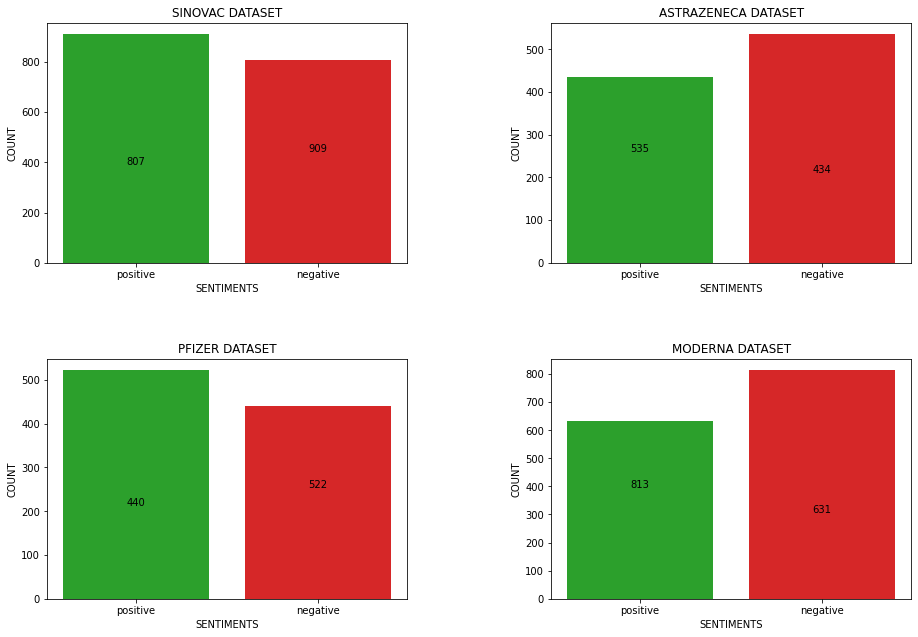

In [ ]:
# Visualize the sentiment class before data split
sinovac_sentiment_count = df_sinovac_agg['count'].values
astrazeneca_sentiment_count = df_astrazeneca_agg['count'].values
pfizer_sentiment_count = df_pfizer_agg['count'].values
moderna_sentiment_count = df_moderna_agg['count'].values

class_visualizer.visualize_bar_data(sinovac_sentiment_count,
                                    astrazeneca_sentiment_count,
                                    pfizer_sentiment_count,
                                    moderna_sentiment_count,
                                    'class_before_split.jpg')

In [ ]:
print('Total size Sinovac dataset : ', df_sinovac.shape)
print('Total size AstraZeneca dataset : ', df_astrazeneca.shape)
print('Total size Pfizer dataset : ', df_pfizer.shape)
print('Total size Moderna dataset : ', df_moderna.shape)

Total size Sinovac dataset :  (1716, 2)
Total size AstraZeneca dataset :  (969, 2)
Total size Pfizer dataset :  (962, 2)
Total size Moderna dataset :  (1444, 2)


## **Data Distribution**

In [ ]:
df_sinovac_temp = df_sinovac.copy()
df_astrazeneca_temp = df_astrazeneca.copy()
df_pfizer_temp = df_pfizer.copy()
df_moderna_temp = df_moderna.copy()

In [ ]:
df_sinovac_temp['text_length'] = df_sinovac_temp['text'].apply(len)
df_sinovac_temp['word_count'] = df_sinovac_temp['text'].apply(lambda x: len(x.split()))

df_astrazeneca_temp['text_length'] = df_astrazeneca_temp['text'].apply(len)
df_astrazeneca_temp['word_count'] = df_astrazeneca_temp['text'].apply(lambda x: len(x.split()))

df_pfizer_temp['text_length'] = df_pfizer_temp['text'].apply(len)
df_pfizer_temp['word_count'] = df_pfizer_temp['text'].apply(lambda x: len(x.split()))

df_moderna_temp['text_length'] = df_moderna_temp['text'].apply(len)
df_moderna_temp['word_count'] = df_moderna_temp['text'].apply(lambda x: len(x.split()))

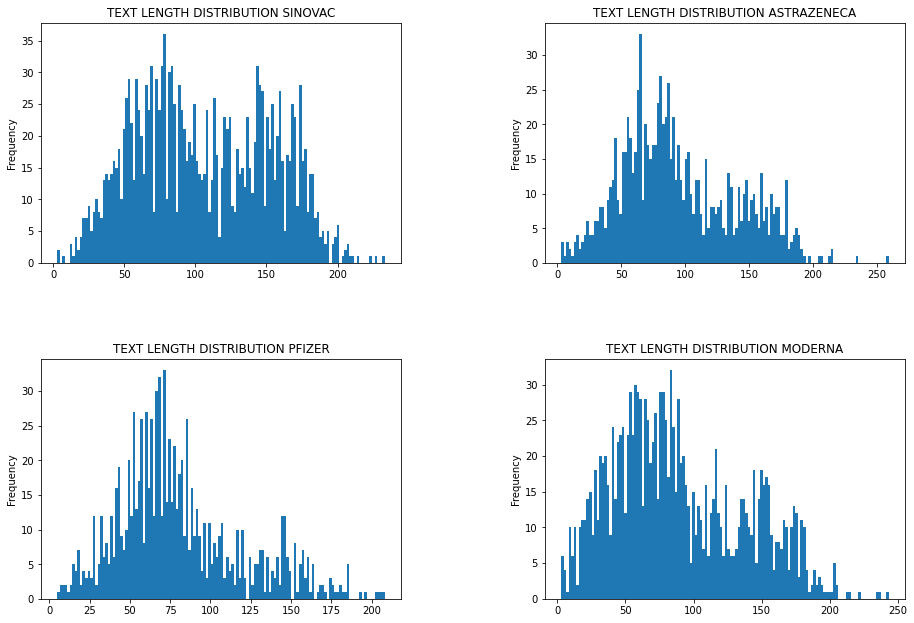

In [ ]:
class_visualizer.visualize_text_length_distribution(df_sinovac_temp,
                                                    df_astrazeneca_temp,
                                                    df_pfizer_temp,
                                                    df_moderna_temp,
                                                    'text_length_distribution.jpg')

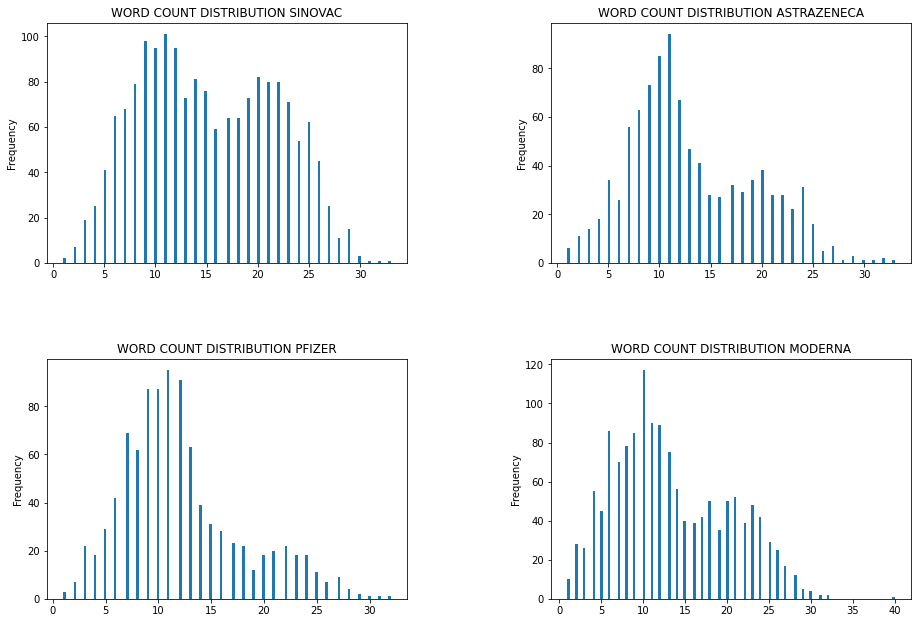

In [ ]:
class_visualizer.visualize_word_count_distribution(df_sinovac_temp,
                                                    df_astrazeneca_temp,
                                                    df_pfizer_temp,
                                                    df_moderna_temp,
                                                    'word_count_distribution.jpg')

## **Remove Short Text**

In [ ]:
df_sinovac = df_sinovac_temp[df_sinovac_temp['word_count'] >= 5]
df_astrazeneca = df_astrazeneca_temp[df_astrazeneca_temp['word_count'] >= 5]
df_pfizer = df_pfizer_temp[df_pfizer_temp['word_count'] >= 5]
df_moderna = df_moderna_temp[df_moderna_temp['word_count'] >= 5]

In [ ]:
df_sinovac_temp = df_sinovac.copy()
df_astrazeneca_temp = df_astrazeneca.copy()
df_pfizer_temp = df_pfizer.copy()
df_moderna_temp = df_moderna.copy()

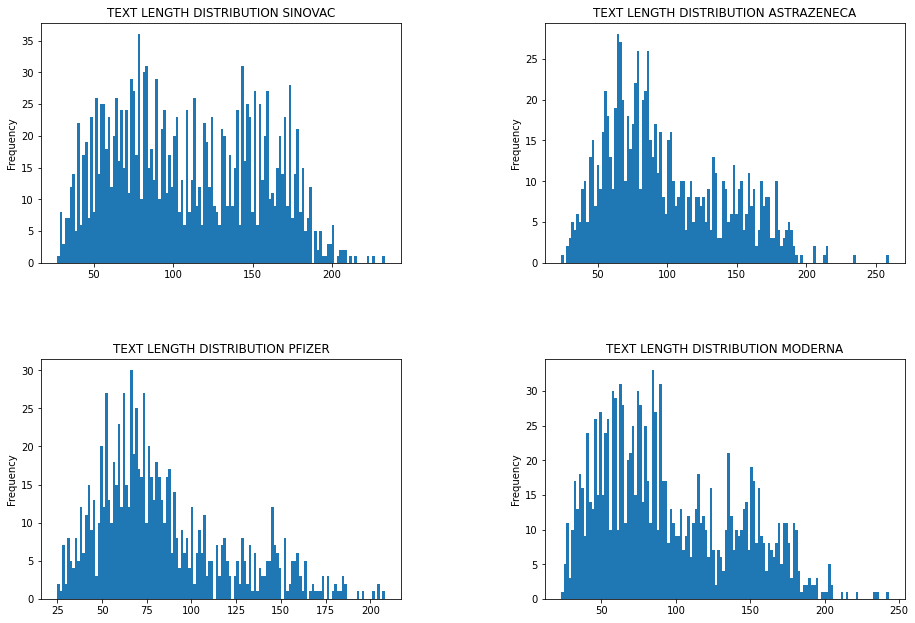

In [ ]:
class_visualizer.visualize_text_length_distribution(df_sinovac_temp,
                                                    df_astrazeneca_temp,
                                                    df_pfizer_temp,
                                                    df_moderna_temp,
                                                    'text_length_no_short_distribution.jpg')

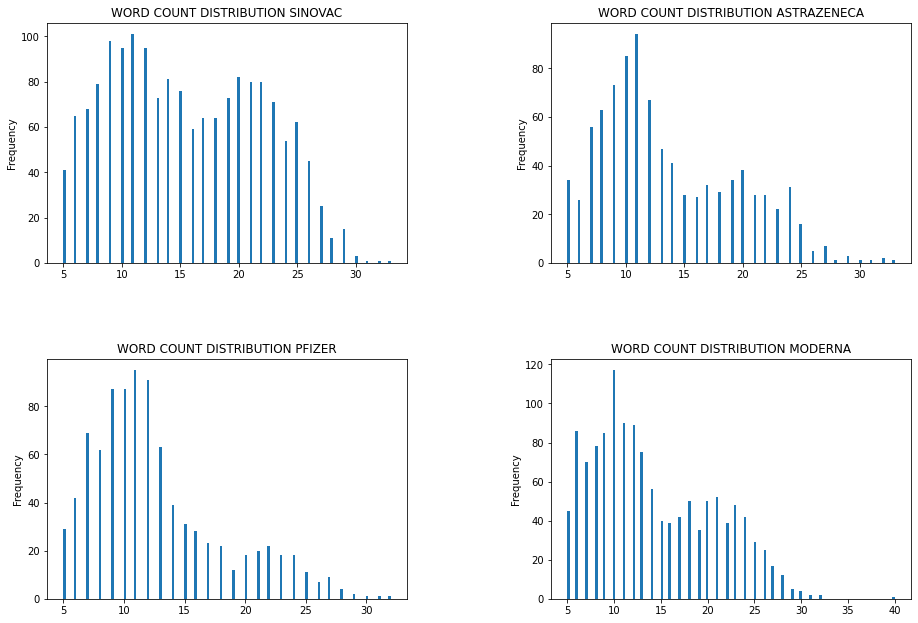

In [ ]:
class_visualizer.visualize_word_count_distribution(df_sinovac_temp,
                                                    df_astrazeneca_temp,
                                                    df_pfizer_temp,
                                                    df_moderna_temp,
                                                    'word_count_no_short_distribution.jpg')

## **Word Cloud Visualization**

In [ ]:
df_sinovac_temp = df_sinovac.copy()
df_astrazeneca_temp = df_astrazeneca.copy()
df_pfizer_temp = df_pfizer.copy()
df_moderna_temp = df_moderna.copy()

In [ ]:
df_sinovac_positive_temp = df_sinovac_temp[df_sinovac_temp['sentiment'] == 'positive']
df_sinovac_negative_temp = df_sinovac_temp[df_sinovac_temp['sentiment'] == 'negative']

df_astrazeneca_positive_temp = df_astrazeneca_temp[df_astrazeneca_temp['sentiment'] == 'positive']
df_astrazeneca_negative_temp = df_astrazeneca_temp[df_astrazeneca_temp['sentiment'] == 'negative']

df_pfizer_positive_temp = df_pfizer_temp[df_pfizer_temp['sentiment'] == 'positive']
df_pfizer_negative_temp = df_pfizer_temp[df_pfizer_temp['sentiment'] == 'negative']

df_moderna_positive_temp = df_moderna_temp[df_moderna_temp['sentiment'] == 'positive']
df_moderna_negative_temp = df_moderna_temp[df_moderna_temp['sentiment'] == 'negative']

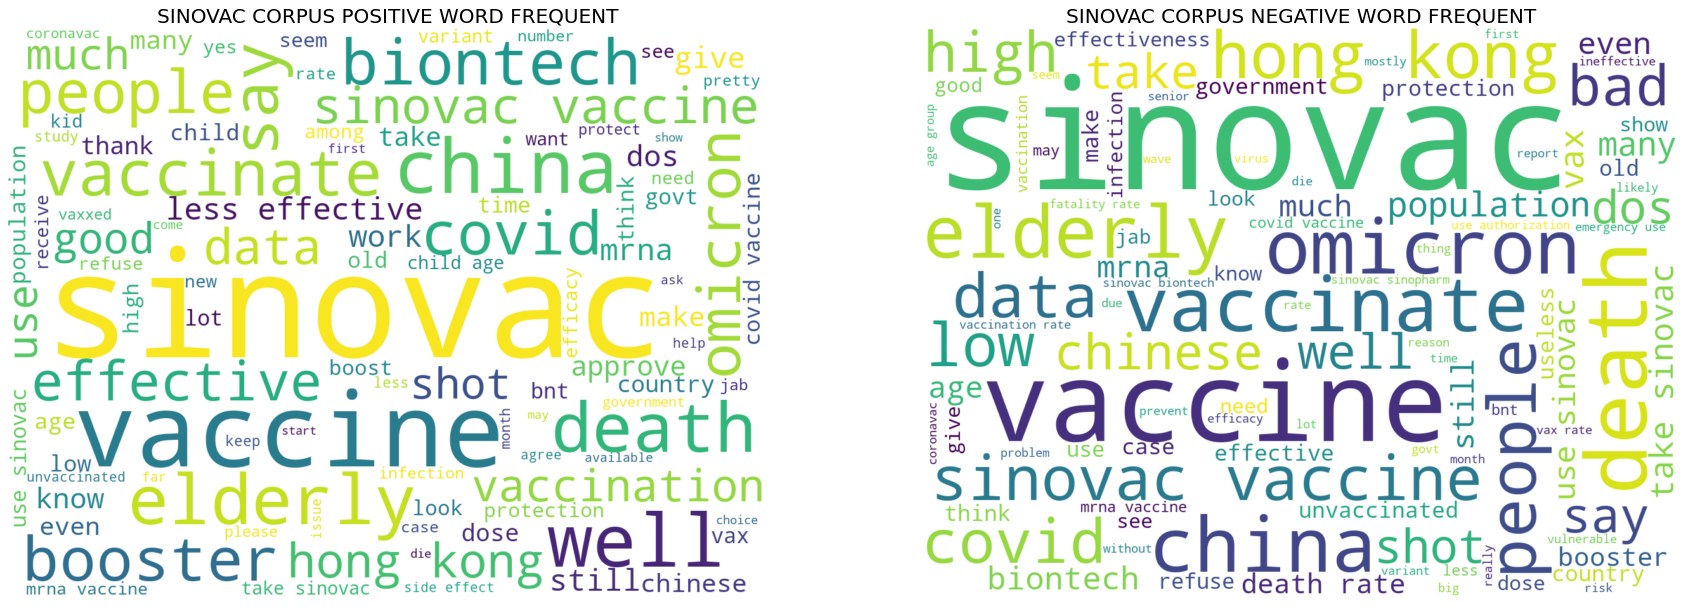

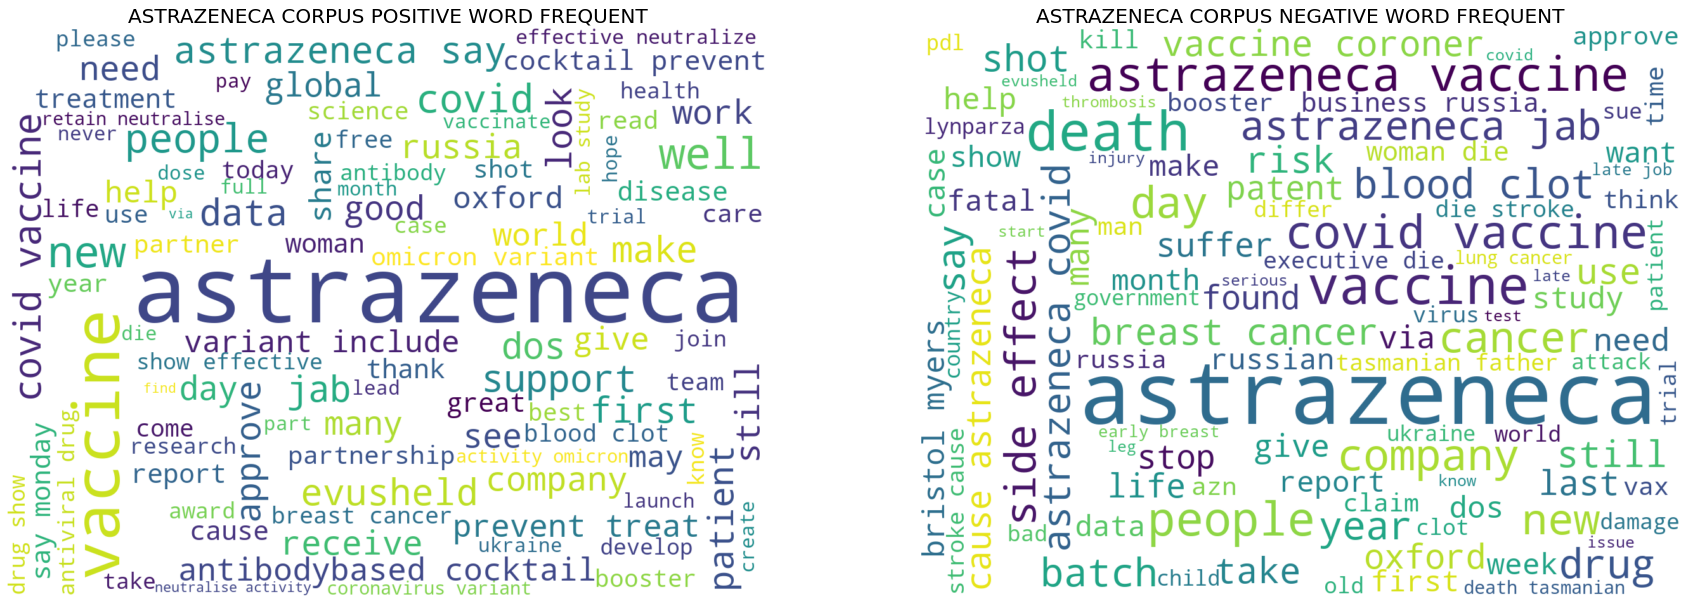

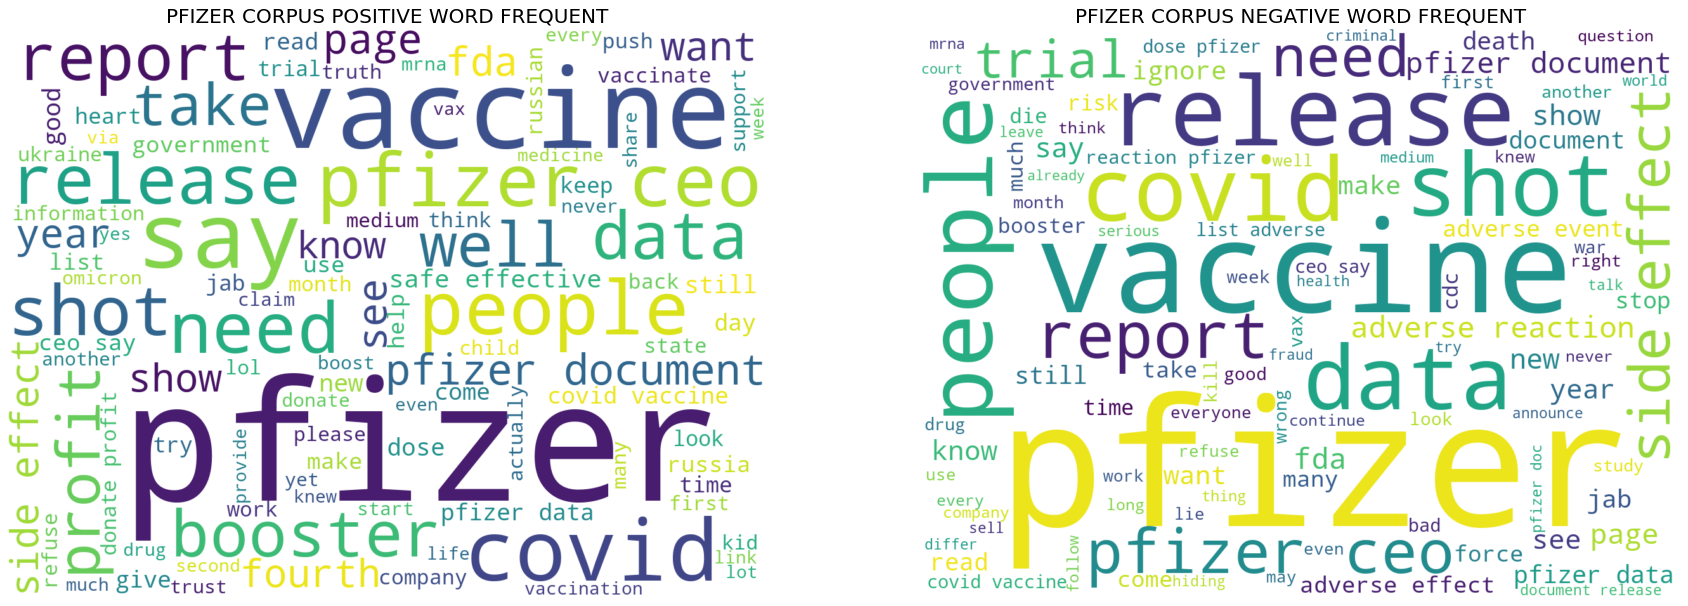

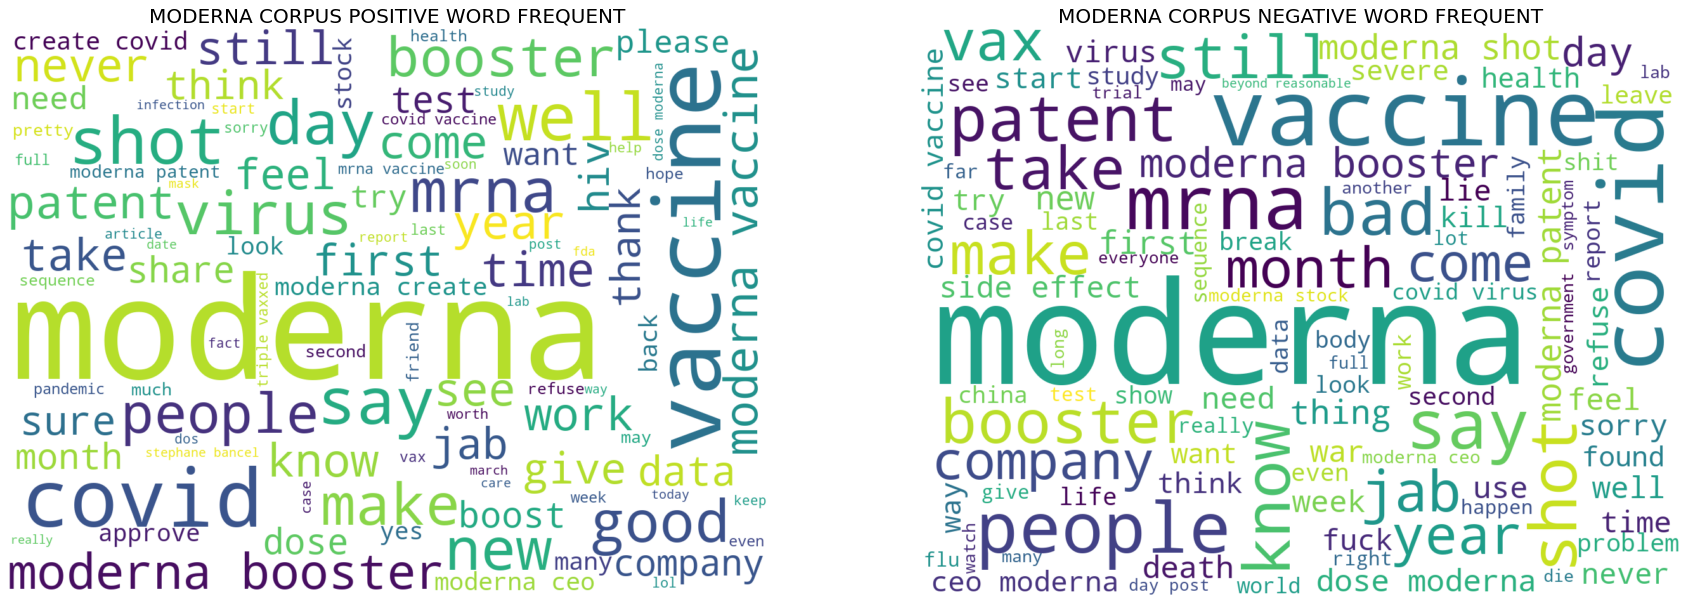

In [ ]:
class_visualizer.visualize_wordcloud(df_sinovac_positive_temp,
                                     df_sinovac_negative_temp,
                                     'SINOVAC',
                                     'word_cloud_sinovac.jpg')

class_visualizer.visualize_wordcloud(df_astrazeneca_positive_temp,
                                     df_astrazeneca_negative_temp,
                                     'ASTRAZENECA',
                                     'word_cloud_astrazeneca.jpg')

class_visualizer.visualize_wordcloud(df_pfizer_positive_temp,
                                     df_pfizer_negative_temp,
                                     'PFIZER',
                                     'word_cloud_pfizer.jpg')

class_visualizer.visualize_wordcloud(df_moderna_positive_temp,
                                     df_moderna_negative_temp,
                                     'MODERNA',
                                     'word_cloud_moderna.jpg')

In [ ]:
df_sinovac = df_sinovac_temp[['text', 'sentiment']]
df_astrazeneca = df_astrazeneca_temp[['text', 'sentiment']]
df_pfizer = df_pfizer_temp[['text', 'sentiment']]
df_moderna = df_moderna_temp[['text', 'sentiment']]

In [ ]:
print('Total size Sinovac after remove short text dataset : ', df_sinovac.shape)
print('Total size AstraZeneca after remove short text dataset : ', df_astrazeneca.shape)
print('Total size Pfizer after remove short text dataset : ', df_pfizer.shape)
print('Total size Moderna after remove short text dataset : ', df_moderna.shape)

Total size Sinovac after remove short text dataset :  (1663, 2)
Total size AstraZeneca after remove short text dataset :  (920, 2)
Total size Pfizer after remove short text dataset :  (912, 2)
Total size Moderna after remove short text dataset :  (1325, 2)


## **Dataset Splitting**

In [ ]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        test_size=0.2, 
                                                        stratify=y,
                                                        shuffle=True,
                                                        random_state=0)


    return X_train, X_test, y_train, y_test

### **Sinovac Dataset**

In [ ]:
# Split the Sinovac dataset into training, validation, and testing
X_sinovac = df_sinovac['text'].values
y_sinovac = df_sinovac['sentiment'].values

X_sinovac_train, X_sinovac_test, y_sinovac_train, y_sinovac_test = split_data(X_sinovac, y_sinovac)

df_sinovac_train = pd.DataFrame({'text': X_sinovac_train, 'sentiment': y_sinovac_train})
df_sinovac_test = pd.DataFrame({'text': X_sinovac_test, 'sentiment': y_sinovac_test})

### **AstraZeneca Dataset**

In [ ]:
# Split the AstraZeneca dataset into training, validation, and testing
X_astrazeneca = df_astrazeneca['text'].values
y_astrazeneca = df_astrazeneca['sentiment'].values

X_astrazeneca_train, X_astrazeneca_test, y_astrazeneca_train, y_astrazeneca_test = split_data(X_astrazeneca, y_astrazeneca)

df_astrazeneca_train = pd.DataFrame({'text': X_astrazeneca_train, 'sentiment': y_astrazeneca_train})
df_astrazeneca_test = pd.DataFrame({'text': X_astrazeneca_test, 'sentiment': y_astrazeneca_test})

### **Pfizer Dataset**

In [ ]:
# Split the Pfizer dataset into training, validation, and testing
X_pfizer = df_pfizer['text'].values
y_pfizer = df_pfizer['sentiment'].values

X_pfizer_train, X_pfizer_test, y_pfizer_train, y_pfizer_test = split_data(X_pfizer, y_pfizer)

df_pfizer_train = pd.DataFrame({'text': X_pfizer_train, 'sentiment': y_pfizer_train})
df_pfizer_test = pd.DataFrame({'text': X_pfizer_test, 'sentiment': y_pfizer_test})

### **Moderna Dataset**

In [ ]:
# Split the Pfizer dataset into training, validation, and testing
X_moderna = df_moderna['text'].values
y_moderna = df_moderna['sentiment'].values

X_moderna_train, X_moderna_test, y_moderna_train, y_moderna_test = split_data(X_moderna, y_moderna)

df_moderna_train = pd.DataFrame({'text': X_moderna_train, 'sentiment': y_moderna_train})
df_moderna_test = pd.DataFrame({'text': X_moderna_test, 'sentiment': y_moderna_test})

In [ ]:
df_sinovac_train.to_csv('train/sinovac_train.csv', index=False)
df_astrazeneca_train.to_csv('train/astrazeneca_train.csv', index=False)
df_pfizer_train.to_csv('train/pfizer_train.csv', index=False)
df_moderna_train.to_csv('train/moderna_train.csv', index=False)

df_sinovac_test.to_csv('test/sinovac_test.csv', index=False)
df_astrazeneca_test.to_csv('test/astrazeneca_test.csv', index=False)
df_pfizer_test.to_csv('test/pfizer_test.csv', index=False)
df_moderna_test.to_csv('test/moderna_test.csv', index=False)

## **Dataset Visualization After Split**

In [ ]:
df_sinovac_train = pd.read_csv('train/sinovac_train.csv')
df_astrazeneca_train = pd.read_csv('train/astrazeneca_train.csv')
df_pfizer_train = pd.read_csv('train/pfizer_train.csv')
df_moderna_train = pd.read_csv('train/moderna_train.csv')

df_sinovac_test = pd.read_csv('test/sinovac_test.csv')
df_astrazeneca_test = pd.read_csv('test/astrazeneca_test.csv')
df_pfizer_test = pd.read_csv('test/pfizer_test.csv')
df_moderna_test = pd.read_csv('test/moderna_test.csv')

In [ ]:
# Retrieve the sentiment class distribution for Sinovac training data
df_sinovac_train_agg = df_sinovac_train.groupby('sentiment').count()
df_sinovac_train_agg = df_sinovac_train_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for AstraZeneca training data
df_astrazeneca_train_agg = df_astrazeneca_train.groupby('sentiment').count()
df_astrazeneca_train_agg = df_astrazeneca_train_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for Pfizer training data
df_pfizer_train_agg = df_pfizer_train.groupby('sentiment').count()
df_pfizer_train_agg = df_pfizer_train_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for Moderna training data
df_moderna_train_agg = df_moderna_train.groupby('sentiment').count()
df_moderna_train_agg = df_moderna_train_agg.rename(columns={'text': 'count'})

In [ ]:
# Retrieve the sentiment class distribution for Sinovac testing data
df_sinovac_test_agg = df_sinovac_test.groupby('sentiment').count()
df_sinovac_test_agg = df_sinovac_test_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for Moderna AstraZeneca data
df_astrazeneca_test_agg = df_astrazeneca_test.groupby('sentiment').count()
df_astrazeneca_test_agg = df_astrazeneca_test_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for Moderna Pfizer data
df_pfizer_test_agg = df_pfizer_test.groupby('sentiment').count()
df_pfizer_test_agg = df_pfizer_test_agg.rename(columns={'text': 'count'})

# Retrieve the sentiment class distribution for Moderna testing data
df_moderna_test_agg = df_moderna_test.groupby('sentiment').count()
df_moderna_test_agg = df_moderna_test_agg.rename(columns={'text': 'count'})

### **Train Data**

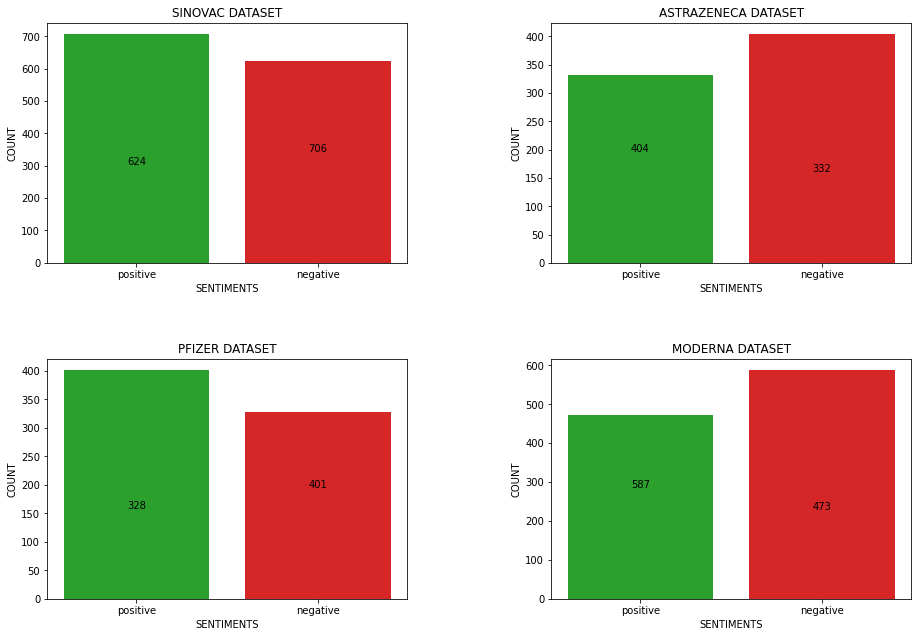

In [ ]:
# Visualize the sentiment class in training data
sinovac_train_sentiment_count = df_sinovac_train_agg['count'].values
astrazeneca_train_sentiment_count = df_astrazeneca_train_agg['count'].values
pfizer_train_sentiment_count = df_pfizer_train_agg['count'].values
moderna_train_sentiment_count = df_moderna_train_agg['count'].values

class_visualizer.visualize_bar_data(sinovac_train_sentiment_count, 
                                    astrazeneca_train_sentiment_count, 
                                    pfizer_train_sentiment_count, 
                                    moderna_train_sentiment_count,
                                    'train_class.jpg')

In [ ]:
print('Total training size Sinovac dataset : ', df_sinovac_train.shape)
print('Total training size AstraZeneca dataset : ', df_astrazeneca_train.shape)
print('Total training size Pfizer dataset : ', df_pfizer_train.shape)
print('Total training size Moderna dataset : ', df_moderna_train.shape)

Total training size Sinovac dataset :  (1330, 2)
Total training size AstraZeneca dataset :  (736, 2)
Total training size Pfizer dataset :  (729, 2)
Total training size Moderna dataset :  (1060, 2)


### **Distribution**

In [ ]:
df_sinovac_train_temp = df_sinovac_train.copy()
df_astrazeneca_train_temp = df_astrazeneca_train.copy()
df_pfizer_train_temp = df_pfizer_train.copy()
df_moderna_train_temp = df_moderna_train.copy()

In [ ]:
df_sinovac_train_temp['text_length'] = df_sinovac_train_temp['text'].apply(len)
df_sinovac_train_temp['word_count'] = df_sinovac_train_temp['text'].apply(lambda x: len(x.split()))

df_astrazeneca_train_temp['text_length'] = df_astrazeneca_train_temp['text'].apply(len)
df_astrazeneca_train_temp['word_count'] = df_astrazeneca_train_temp['text'].apply(lambda x: len(x.split()))

df_pfizer_train_temp['text_length'] = df_pfizer_train_temp['text'].apply(len)
df_pfizer_train_temp['word_count'] = df_pfizer_train_temp['text'].apply(lambda x: len(x.split()))

df_moderna_train_temp['text_length'] = df_moderna_train_temp['text'].apply(len)
df_moderna_train_temp['word_count'] = df_moderna_train_temp['text'].apply(lambda x: len(x.split()))

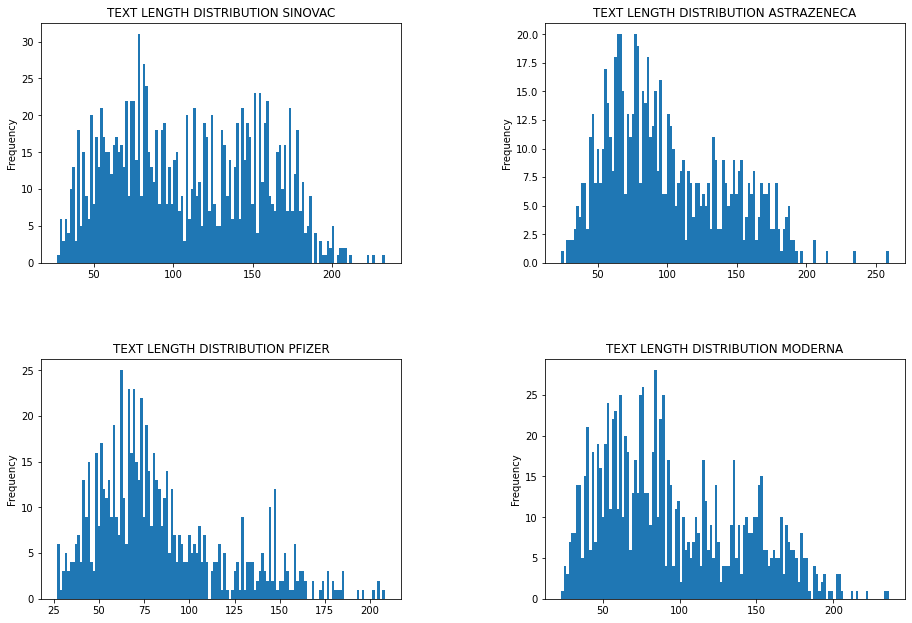

In [ ]:
class_visualizer.visualize_text_length_distribution(df_sinovac_train_temp,
                                                    df_astrazeneca_train_temp,
                                                    df_pfizer_train_temp,
                                                    df_moderna_train_temp,
                                                    'text_length_train_distribution.jpg')

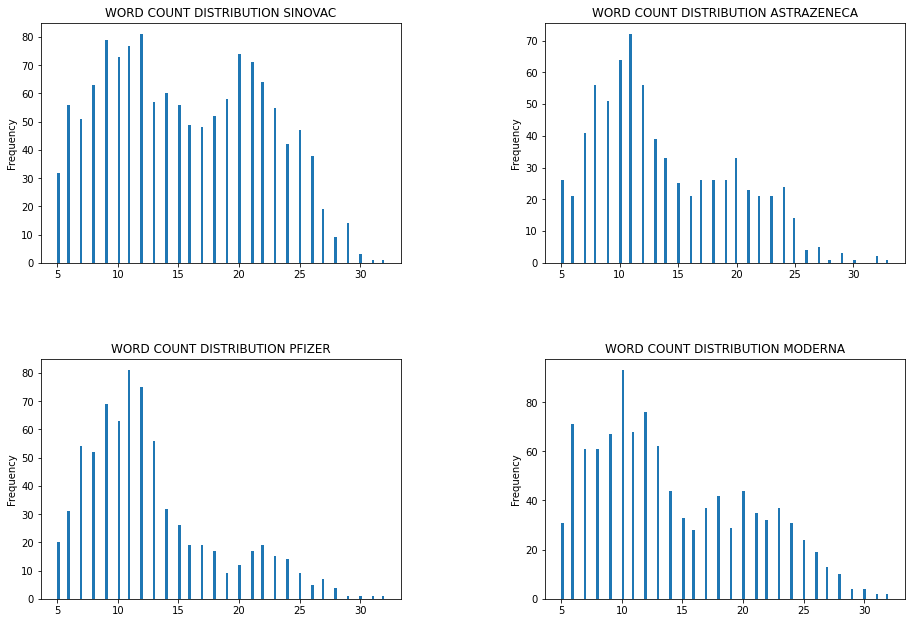

In [ ]:
class_visualizer.visualize_word_count_distribution(df_sinovac_train_temp,
                                                    df_astrazeneca_train_temp,
                                                    df_pfizer_train_temp,
                                                    df_moderna_train_temp,
                                                    'word_count_train_distribution.jpg')

### **Test Data**

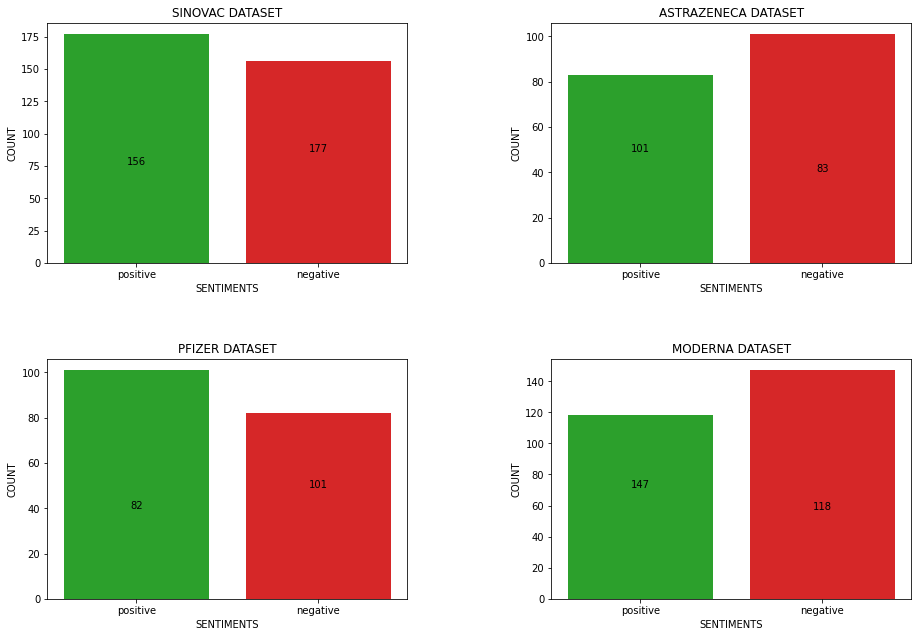

In [ ]:
# Visualize the sentiment class in testing data
sinovac_test_sentiment_count = df_sinovac_test_agg['count'].values
astrazeneca_test_sentiment_count = df_astrazeneca_test_agg['count'].values
pfizer_test_sentiment_count = df_pfizer_test_agg['count'].values
moderna_test_sentiment_count = df_moderna_test_agg['count'].values

class_visualizer.visualize_bar_data(sinovac_test_sentiment_count, 
                                    astrazeneca_test_sentiment_count, 
                                    pfizer_test_sentiment_count, 
                                    moderna_test_sentiment_count,
                                    'test_class.jpg')

In [ ]:
print('Total test size Sinovac dataset : ', df_sinovac_test.shape)
print('Total test size AstraZeneca dataset : ', df_astrazeneca_test.shape)
print('Total test size Pfizer dataset : ', df_pfizer_test.shape)
print('Total test size Moderna dataset : ', df_moderna_test.shape)

Total test size Sinovac dataset :  (333, 2)
Total test size AstraZeneca dataset :  (184, 2)
Total test size Pfizer dataset :  (183, 2)
Total test size Moderna dataset :  (265, 2)


### **Distribution**

In [ ]:
df_sinovac_test_temp = df_sinovac_test.copy()
df_astrazeneca_test_temp = df_astrazeneca_test.copy()
df_pfizer_test_temp = df_pfizer_test.copy()
df_moderna_test_temp = df_moderna_test.copy()

In [ ]:
df_sinovac_test_temp['text_length'] = df_sinovac_test_temp['text'].apply(len)
df_sinovac_test_temp['word_count'] = df_sinovac_test_temp['text'].apply(lambda x: len(x.split()))

df_astrazeneca_test_temp['text_length'] = df_astrazeneca_test_temp['text'].apply(len)
df_astrazeneca_test_temp['word_count'] = df_astrazeneca_test_temp['text'].apply(lambda x: len(x.split()))

df_pfizer_test_temp['text_length'] = df_pfizer_test_temp['text'].apply(len)
df_pfizer_test_temp['word_count'] = df_pfizer_test_temp['text'].apply(lambda x: len(x.split()))

df_moderna_test_temp['text_length'] = df_moderna_test_temp['text'].apply(len)
df_moderna_test_temp['word_count'] = df_moderna_test_temp['text'].apply(lambda x: len(x.split()))

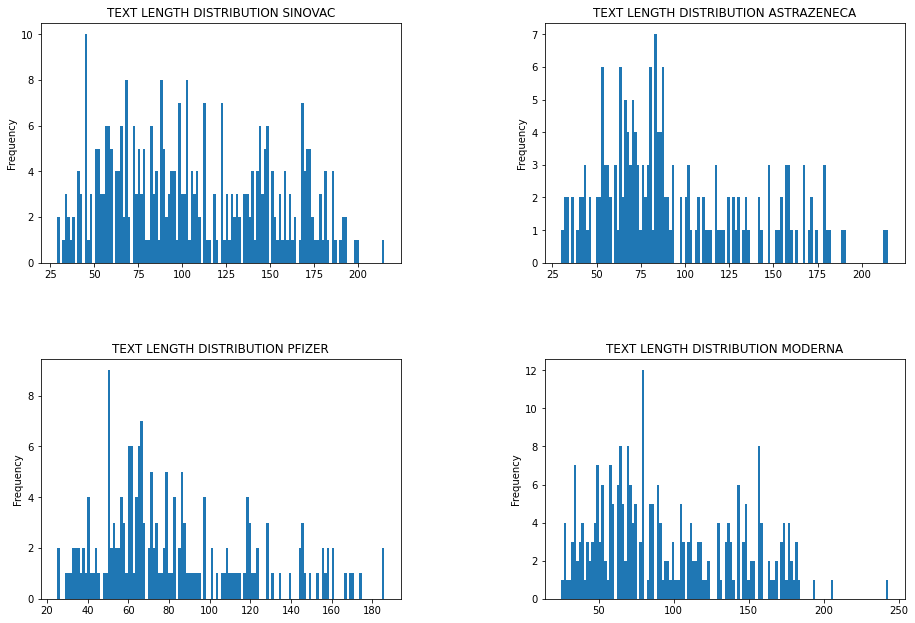

In [ ]:
class_visualizer.visualize_text_length_distribution(df_sinovac_test_temp,
                                                    df_astrazeneca_test_temp,
                                                    df_pfizer_test_temp,
                                                    df_moderna_test_temp,
                                                    'text_length_test_distribution.jpg')

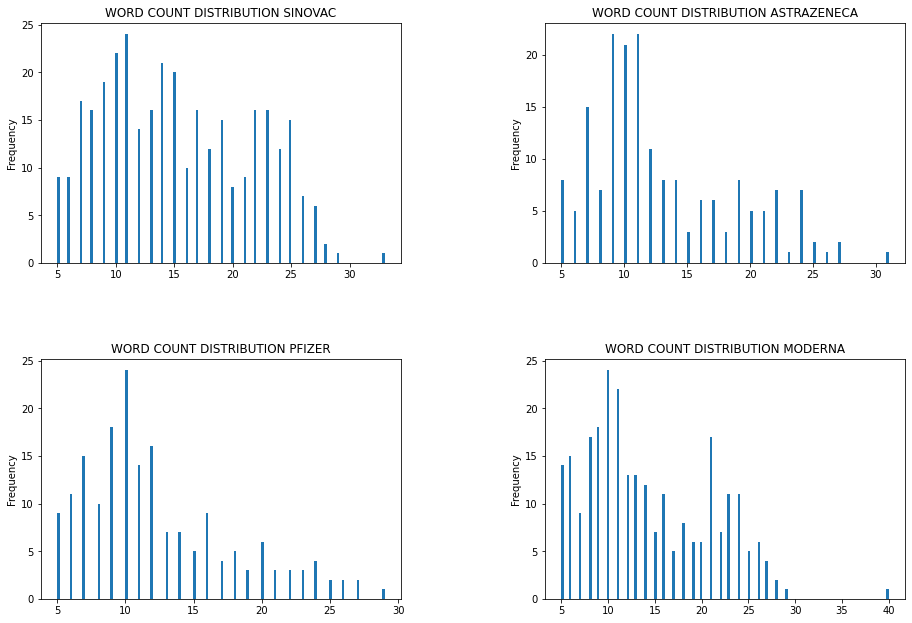

In [ ]:
class_visualizer.visualize_word_count_distribution(df_sinovac_test_temp,
                                                    df_astrazeneca_test_temp,
                                                    df_pfizer_test_temp,
                                                    df_moderna_test_temp,
                                                    'word_count_test_distribution.jpg')

# **Data Augmentation**

In [ ]:
df_sinovac_train = pd.read_csv('train/sinovac_train.csv')
df_astrazeneca_train = pd.read_csv('train/astrazeneca_train.csv')
df_pfizer_train = pd.read_csv('train/pfizer_train.csv')
df_moderna_train = pd.read_csv('train/moderna_train.csv')

In [ ]:
class TextAugmentation:
    def __init__(self):
        self.augmenter = EDA()

    def replace_synonym(self, text):
        augmented_text_portion = max(1, int(len(text)*0.1)) 
        synonym_replaced = self.augmenter.synonym_replacement(text, n=augmented_text_portion)
        return synonym_replaced

    def random_insert(self, text):
        augmented_text_portion = max(1, int(len(text)*0.1)) 
        random_inserted = self.augmenter.random_insertion(text, n=augmented_text_portion)
        return random_inserted

    def random_swap(self, text):
        augmented_text_portion = max(1, int(len(text)*0.1)) 
        random_swaped = self.augmenter.random_swap(text, n=augmented_text_portion)
        return random_swaped

    def random_delete(self, text):
        random_deleted = self.augmenter.random_deletion(text, p=0.1)
        return random_deleted

text_augmentation = TextAugmentation()

## **Sinovac Dataset Augmentation**

In [ ]:
# Sinovac training data before augmentation for each sentiment class
df_sinovac_train_positive = df_sinovac_train[df_sinovac_train['sentiment'] == 'positive']
df_sinovac_train_negative = df_sinovac_train[df_sinovac_train['sentiment'] == 'negative']
print('Total training size before augmentation : ', df_sinovac_train.shape)
print('Total positive size before augmentation : ', df_sinovac_train_positive.shape)
print('Total negative size before augmentation : ', df_sinovac_train_negative.shape)

Total training size before augmentation :  (1330, 2)
Total positive size before augmentation :  (624, 2)
Total negative size before augmentation :  (706, 2)


In [ ]:
# Data augmentation for positive class in Sinovac training data
synonym_replacement_train_positive = df_sinovac_train_positive['text'].apply(lambda text: text_augmentation.replace_synonym(text))
random_insertion_train_positive = df_sinovac_train_positive['text'].apply(lambda text: text_augmentation.random_insert(text))
random_swap_train_positive = df_sinovac_train_positive['text'].apply(lambda text: text_augmentation.random_swap(text))
random_deletion_train_positive = df_sinovac_train_positive['text'].apply(lambda text: text_augmentation.random_delete(text))

# Data augmentation for negative class in Sinovac training data 
synonym_replacement_train_negative = df_sinovac_train_negative['text'].apply(lambda text: text_augmentation.replace_synonym(text))
random_insertion_train_negative = df_sinovac_train_negative['text'].apply(lambda text: text_augmentation.random_insert(text))
random_swap_train_negative = df_sinovac_train_negative['text'].apply(lambda text: text_augmentation.random_swap(text))
random_deletion_train_negative = df_sinovac_train_negative['text'].apply(lambda text: text_augmentation.random_delete(text))

In [ ]:
# Merged each augmented positive class data and set the sentiment class to positive sentiment for Sinovac training data
augmented_train_positive = synonym_replacement_train_positive.append([random_insertion_train_positive, 
                                                                      random_swap_train_positive, 
                                                                      random_deletion_train_positive])
df_augmented_train_positive = pd.DataFrame({'text': augmented_train_positive})
df_augmented_train_positive['sentiment'] = 'positive'

# Merged each augmented negative class data and set the sentiment class to negative sentiment for Sinovac training data
augmented_train_negative = synonym_replacement_train_negative.append([random_insertion_train_negative, 
                                                                      random_swap_train_negative, 
                                                                      random_deletion_train_negative])
df_augmented_train_negative = pd.DataFrame({'text': augmented_train_negative})
df_augmented_train_negative['sentiment'] = 'negative'

# Merged all the augmented data with the original data for Sinovac training data
df_sinovac_train = pd.concat([df_sinovac_train, df_augmented_train_positive, df_augmented_train_negative], ignore_index=True)

In [ ]:
df_sinovac_train_positive = df_sinovac_train[df_sinovac_train['sentiment'] == 'positive']
df_sinovac_train_negative = df_sinovac_train[df_sinovac_train['sentiment'] == 'negative']

# Sinovac training data after augmentation for each sentiment class
print('Total training size after agumentation : ', df_sinovac_train.shape)
print('Total positive size after agumentation : ', df_sinovac_train_positive.shape)
print('Total negative size after agumentation : ', df_sinovac_train_negative.shape)

Total training size after agumentation :  (6650, 2)
Total positive size after agumentation :  (3120, 2)
Total negative size after agumentation :  (3530, 2)


## **AstraZeneca Dataset Augmentation**

In [ ]:
# AstraZeneca training data before augmentation for each sentiment class
df_astrazeneca_train_positive = df_astrazeneca_train[df_astrazeneca_train['sentiment'] == 'positive']
df_astrazeneca_train_negative = df_astrazeneca_train[df_astrazeneca_train['sentiment'] == 'negative']
print('Total training size before augmentation : ', df_astrazeneca_train.shape)
print('Total positive size before augmentation : ', df_astrazeneca_train_positive.shape)
print('Total negative size before augmentation : ', df_astrazeneca_train_negative.shape)

Total training size before augmentation :  (736, 2)
Total positive size before augmentation :  (404, 2)
Total negative size before augmentation :  (332, 2)


In [ ]:
# Data augmentation for positive class in AstraZeneca training data
synonym_replacement_train_positive = df_astrazeneca_train_positive['text'].apply(lambda text: text_augmentation.replace_synonym(text))
random_insertion_train_positive = df_astrazeneca_train_positive['text'].apply(lambda text: text_augmentation.random_insert(text))
random_swap_train_positive = df_astrazeneca_train_positive['text'].apply(lambda text: text_augmentation.random_swap(text))
random_deletion_train_positive = df_astrazeneca_train_positive['text'].apply(lambda text: text_augmentation.random_delete(text))

# Data augmentation for negative class in AstraZeneca training data
synonym_replacement_train_negative = df_astrazeneca_train_negative['text'].apply(lambda text: text_augmentation.replace_synonym(text))
random_insertion_train_negative = df_astrazeneca_train_negative['text'].apply(lambda text: text_augmentation.random_insert(text))
random_swap_train_negative = df_astrazeneca_train_negative['text'].apply(lambda text: text_augmentation.random_swap(text))
random_deletion_train_negative = df_astrazeneca_train_negative['text'].apply(lambda text: text_augmentation.random_delete(text))

In [ ]:
# Merged each augmented positive class data and set the sentiment class to positive sentiment for AstraZeneca training data
augmented_train_positive = synonym_replacement_train_positive.append([random_insertion_train_positive, 
                                                                      random_swap_train_positive, 
                                                                      random_deletion_train_positive])
df_augmented_train_positive = pd.DataFrame({'text': augmented_train_positive})
df_augmented_train_positive['sentiment'] = 'positive'

# Merged each augmented negative class data and set the sentiment class to negative sentiment for AstraZeneca training data
augmented_train_negative = synonym_replacement_train_negative.append([random_insertion_train_negative, 
                                                                      random_swap_train_negative, 
                                                                      random_deletion_train_negative])
df_augmented_train_negative = pd.DataFrame({'text': augmented_train_negative})
df_augmented_train_negative['sentiment'] = 'negative'

# Merged all the augmented data with the original data for AstraZeneca training data
df_astrazeneca_train = pd.concat([df_astrazeneca_train, df_augmented_train_positive, df_augmented_train_negative], ignore_index=True)

In [ ]:
df_astrazeneca_train_positive = df_astrazeneca_train[df_astrazeneca_train['sentiment'] == 'positive']
df_astrazeneca_train_negative = df_astrazeneca_train[df_astrazeneca_train['sentiment'] == 'negative']

# AstraZeneca training data after augmentation for each sentiment class
print('Total training size after agumentation : ', df_astrazeneca_train.shape)
print('Total positive size after agumentation : ', df_astrazeneca_train_positive.shape)
print('Total negative size after agumentation : ', df_astrazeneca_train_negative.shape)

Total training size after agumentation :  (3680, 2)
Total positive size after agumentation :  (2020, 2)
Total negative size after agumentation :  (1660, 2)


## **Pfizer Dataset Augmentation**

In [ ]:
# Pfizer training data after augmentation for each sentiment class
df_pfizer_train_positive = df_pfizer_train[df_pfizer_train['sentiment'] == 'positive']
df_pfizer_train_negative = df_pfizer_train[df_pfizer_train['sentiment'] == 'negative']
print('Total training size before augmentation : ', df_pfizer_train.shape)
print('Total positive size before augmentation : ', df_pfizer_train_positive.shape)
print('Total negative size before augmentation : ', df_pfizer_train_negative.shape)

Total training size before augmentation :  (729, 2)
Total positive size before augmentation :  (328, 2)
Total negative size before augmentation :  (401, 2)


In [ ]:
# Data augmentation for positive class in Pfizer training data
synonym_replacement_train_positive = df_pfizer_train_positive['text'].apply(lambda text: text_augmentation.replace_synonym(text))
random_insertion_train_positive = df_pfizer_train_positive['text'].apply(lambda text: text_augmentation.random_insert(text))
random_swap_train_positive = df_pfizer_train_positive['text'].apply(lambda text: text_augmentation.random_swap(text))
random_deletion_train_positive = df_pfizer_train_positive['text'].apply(lambda text: text_augmentation.random_delete(text))

# Data augmentation for negative class in Pfizer training data
synonym_replacement_train_negative = df_pfizer_train_negative['text'].apply(lambda text: text_augmentation.replace_synonym(text))
random_insertion_train_negative = df_pfizer_train_negative['text'].apply(lambda text: text_augmentation.random_insert(text))
random_swap_train_negative = df_pfizer_train_negative['text'].apply(lambda text: text_augmentation.random_swap(text))
random_deletion_train_negative = df_pfizer_train_negative['text'].apply(lambda text: text_augmentation.random_delete(text))

In [ ]:
# Merged each augmented positive class data and set the sentiment class to positive sentiment for Pfizer training data
augmented_train_positive = synonym_replacement_train_positive.append([random_insertion_train_positive, 
                                                                      random_swap_train_positive, 
                                                                      random_deletion_train_positive])
df_augmented_train_positive = pd.DataFrame({'text': augmented_train_positive})
df_augmented_train_positive['sentiment'] = 'positive'

# Merged each augmented negative class data and set the sentiment class to negative sentiment for Pfizer training data
augmented_train_negative = synonym_replacement_train_negative.append([random_insertion_train_negative, 
                                                                      random_swap_train_negative, 
                                                                      random_deletion_train_negative])
df_augmented_train_negative = pd.DataFrame({'text': augmented_train_negative})
df_augmented_train_negative['sentiment'] = 'negative'

# Merged all the augmented data with the original data for Pfizer training data
df_pfizer_train = pd.concat([df_pfizer_train, df_augmented_train_positive, df_augmented_train_negative], ignore_index=True)

In [ ]:
df_pfizer_train_positive = df_pfizer_train[df_pfizer_train['sentiment'] == 'positive']
df_pfizer_train_negative = df_pfizer_train[df_pfizer_train['sentiment'] == 'negative']


# Pfizer training data after augmentation for each sentiment class
print('Total training size after augmentation : ', df_pfizer_train.shape)
print('Total positive size after augmentation : ', df_pfizer_train_positive.shape)
print('Total negative size after augmentation : ', df_pfizer_train_negative.shape)

Total training size after augmentation :  (3645, 2)
Total positive size after augmentation :  (1640, 2)
Total negative size after augmentation :  (2005, 2)


## **Moderna Dataset Augmentation**

In [ ]:
# Moderna training data after augmentation for each sentiment class
df_moderna_train_positive = df_moderna_train[df_moderna_train['sentiment'] == 'positive']
df_moderna_train_negative = df_moderna_train[df_moderna_train['sentiment'] == 'negative']
print('Total training size before augmentation : ', df_moderna_train.shape)
print('Total positive size before augmentation : ', df_moderna_train_positive.shape)
print('Total negative size before augmentation : ', df_moderna_train_negative.shape)

Total training size before augmentation :  (1060, 2)
Total positive size before augmentation :  (587, 2)
Total negative size before augmentation :  (473, 2)


In [ ]:
# Data augmentation for positive class in Moderna training data
synonym_replacement_train_positive = df_moderna_train_positive['text'].apply(lambda text: text_augmentation.replace_synonym(text))
random_insertion_train_positive = df_moderna_train_positive['text'].apply(lambda text: text_augmentation.random_insert(text))
random_swap_train_positive = df_moderna_train_positive['text'].apply(lambda text: text_augmentation.random_swap(text))
random_deletion_train_positive = df_moderna_train_positive['text'].apply(lambda text: text_augmentation.random_delete(text))

# Data augmentation for negative class in Moderna training data
synonym_replacement_train_negative = df_moderna_train_negative['text'].apply(lambda text: text_augmentation.replace_synonym(text))
random_insertion_train_negative = df_moderna_train_negative['text'].apply(lambda text: text_augmentation.random_insert(text))
random_swap_train_negative = df_moderna_train_negative['text'].apply(lambda text: text_augmentation.random_swap(text))
random_deletion_train_negative = df_moderna_train_negative['text'].apply(lambda text: text_augmentation.random_delete(text))

In [ ]:
# Merged each augmented positive class data and set the sentiment class to positive sentiment for Moderna training data
augmented_train_positive = synonym_replacement_train_positive.append([random_insertion_train_positive, 
                                                                      random_swap_train_positive, 
                                                                      random_deletion_train_positive])
df_augmented_train_positive = pd.DataFrame({'text': augmented_train_positive})
df_augmented_train_positive['sentiment'] = 'positive'

# Merged each augmented negative class data and set the sentiment class to negative sentiment for Moderna training data
augmented_train_negative = synonym_replacement_train_negative.append([random_insertion_train_negative, 
                                                                      random_swap_train_negative, 
                                                                      random_deletion_train_negative])
df_augmented_train_negative = pd.DataFrame({'text': augmented_train_negative})
df_augmented_train_negative['sentiment'] = 'negative'

# Merged all the augmented data with the original data for Moderna training data
df_moderna_train = pd.concat([df_moderna_train, df_augmented_train_positive, df_augmented_train_negative], ignore_index=True)

In [ ]:
df_moderna_train_positive = df_moderna_train[df_moderna_train['sentiment'] == 'positive']
df_moderna_train_negative = df_moderna_train[df_moderna_train['sentiment'] == 'negative']

# Moderna training data after augmentation for each sentiment class
print('Total training size after augmentation : ', df_moderna_train.shape)
print('Total positive size after augmentation : ', df_moderna_train_positive.shape)
print('Total negative size after augmentation : ', df_moderna_train_negative.shape)

Total training size after augmentation :  (5300, 2)
Total positive size after augmentation :  (2935, 2)
Total negative size after augmentation :  (2365, 2)


In [ ]:
df_sinovac_train.to_csv('augmented/sinovac_augmented.csv', index=False)
df_astrazeneca_train.to_csv('augmented/astrazeneca_augmented.csv', index=False)
df_pfizer_train.to_csv('augmented/pfizer_augmented.csv', index=False)
df_moderna_train.to_csv('augmented/moderna_augmented.csv', index=False)

# **Data Transformation**

In [ ]:
df_sinovac_train = pd.read_csv('augmented/sinovac_augmented.csv')
df_astrazeneca_train = pd.read_csv('augmented/astrazeneca_augmented.csv')
df_pfizer_train = pd.read_csv('augmented/pfizer_augmented.csv')
df_moderna_train = pd.read_csv('augmented/moderna_augmented.csv')

df_sinovac_test = pd.read_csv('test/sinovac_test.csv')
df_astrazeneca_test = pd.read_csv('test/astrazeneca_test.csv')
df_pfizer_test = pd.read_csv('test/pfizer_test.csv')
df_moderna_test = pd.read_csv('test/moderna_test.csv')

df_sinovac = pd.concat([df_sinovac_train, df_sinovac_test], ignore_index=True)
df_astrazeneca = pd.concat([df_astrazeneca_train, df_astrazeneca_test], ignore_index=True)
df_pfizer = pd.concat([df_pfizer_train, df_pfizer_test], ignore_index=True)
df_moderna = pd.concat([df_moderna_train, df_moderna_test], ignore_index=True)

In [ ]:
def encode_label(sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'positive':
        return 1

## **Sinovac Dataset**

In [ ]:
# Tokenize the sequence
sinovac_max_length = 100
sinovac_tokenizer = Tokenizer()
sinovac_tokenizer.fit_on_texts(df_sinovac['text'].values)

X_sinovac_train_tokenized = sinovac_tokenizer.texts_to_sequences(df_sinovac_train['text'].values)
X_sinovac_test_tokenized = sinovac_tokenizer.texts_to_sequences(df_sinovac_test['text'].values)

# Pad the sequence
X_sinovac_train_padded = pad_sequences(X_sinovac_train_tokenized, maxlen=sinovac_max_length)
X_sinovac_test_padded = pad_sequences(X_sinovac_test_tokenized, maxlen=sinovac_max_length)

sinovac_num_words = len(sinovac_tokenizer.word_index) + 1

# Encode label
df_sinovac_train['sentiment'] = df_sinovac_train['sentiment'].apply(lambda x: encode_label(x))
df_sinovac_test['sentiment'] = df_sinovac_test['sentiment'].apply(lambda x: encode_label(x))

y_sinovac_train_category = df_sinovac_train['sentiment'].values
y_sinovac_test_category = to_categorical(df_sinovac_test['sentiment'])

print('The maximum sequence length : ', sinovac_max_length)
print('Total unique words : ', sinovac_num_words)
print('Padded training data : ', X_sinovac_train_padded.shape)
print('Padded testing data : ', X_sinovac_test_padded.shape)
print('Train label size : ', y_sinovac_train_category.shape)
print('Test label size : ', y_sinovac_test_category.shape)

The maximum sequence length :  100
Total unique words :  7762
Padded training data :  (6650, 100)
Padded testing data :  (333, 100)
Train label size :  (6650,)
Test label size :  (333, 2)


## **AstraZeneca Dataset**

In [ ]:
# Tokenize the sequence
astrazeneca_max_length = 100
astrazeneca_tokenizer = Tokenizer()
astrazeneca_tokenizer.fit_on_texts(df_astrazeneca['text'].values)

X_astrazeneca_train_tokenized = astrazeneca_tokenizer.texts_to_sequences(df_astrazeneca_train['text'].values)
X_astrazeneca_test_tokenized = astrazeneca_tokenizer.texts_to_sequences(df_astrazeneca_test['text'].values)

# Pad the sequence
X_astrazeneca_train_padded = pad_sequences(X_astrazeneca_train_tokenized, maxlen=astrazeneca_max_length)
X_astrazeneca_test_padded = pad_sequences(X_astrazeneca_test_tokenized, maxlen=astrazeneca_max_length)

astrazeneca_num_words = len(astrazeneca_tokenizer.word_index) + 1

# Encode label
df_astrazeneca_train['sentiment'] = df_astrazeneca_train['sentiment'].apply(lambda x: encode_label(x))
df_astrazeneca_test['sentiment'] = df_astrazeneca_test['sentiment'].apply(lambda x: encode_label(x))

y_astrazeneca_train_category = df_astrazeneca_train['sentiment'].values
y_astrazeneca_test_category = to_categorical(df_astrazeneca_test['sentiment'])

print('The maximum sequence length : ', astrazeneca_max_length)
print('Total unique words : ', astrazeneca_num_words)
print('Padded training data : ', X_astrazeneca_train_padded.shape)
print('Padded testing data : ', X_astrazeneca_test_padded.shape)
print('Train label size : ', y_astrazeneca_train_category.shape)
print('Test label size : ', y_astrazeneca_test_category.shape)

The maximum sequence length :  100
Total unique words :  6389
Padded training data :  (3680, 100)
Padded testing data :  (184, 100)
Train label size :  (3680,)
Test label size :  (184, 2)


## **Pfizer Dataset**

In [ ]:
# Tokenize the sequence
pfizer_max_length = 100
pfizer_tokenizer = Tokenizer()
pfizer_tokenizer.fit_on_texts(df_pfizer['text'].values)

X_pfizer_train_tokenized = pfizer_tokenizer.texts_to_sequences(df_pfizer_train['text'].values)
X_pfizer_test_tokenized = pfizer_tokenizer.texts_to_sequences(df_pfizer_test['text'].values)

# Pad the sequence
X_pfizer_train_padded = pad_sequences(X_pfizer_train_tokenized, maxlen=pfizer_max_length)
X_pfizer_test_padded = pad_sequences(X_pfizer_test_tokenized, maxlen=pfizer_max_length)

pfizer_num_words = len(pfizer_tokenizer.word_index) + 1

# Encode label
df_pfizer_train['sentiment'] = df_pfizer_train['sentiment'].apply(lambda x: encode_label(x))
df_pfizer_test['sentiment'] = df_pfizer_test['sentiment'].apply(lambda x: encode_label(x))

y_pfizer_train_category = df_pfizer_train['sentiment'].values
y_pfizer_test_category = to_categorical(df_pfizer_test['sentiment'])

print('The maximum sequence length : ', pfizer_max_length)
print('Total unique words : ', pfizer_num_words)
print('Padded training data : ', X_pfizer_train_padded.shape)
print('Padded testing data : ', X_pfizer_test_padded.shape)
print('Train label size : ', y_pfizer_train_category.shape)
print('Test label size : ', y_pfizer_test_category.shape)

The maximum sequence length :  100
Total unique words :  5668
Padded training data :  (3645, 100)
Padded testing data :  (183, 100)
Train label size :  (3645,)
Test label size :  (183, 2)


## **Moderna Dataset**

In [ ]:
# Tokenize the sequence
moderna_max_length = 100
moderna_tokenizer = Tokenizer()
moderna_tokenizer.fit_on_texts(df_moderna['text'].values)

X_moderna_train_tokenized = moderna_tokenizer.texts_to_sequences(df_moderna_train['text'].values)
X_moderna_test_tokenized = moderna_tokenizer.texts_to_sequences(df_moderna_test['text'].values)

# Pad the sequence
X_moderna_train_padded = pad_sequences(X_moderna_train_tokenized, maxlen=moderna_max_length)
X_moderna_test_padded = pad_sequences(X_moderna_test_tokenized, maxlen=moderna_max_length)

moderna_num_words = len(moderna_tokenizer.word_index) + 1

# Encode label
df_moderna_train['sentiment'] = df_moderna_train['sentiment'].apply(lambda x: encode_label(x))
df_moderna_test['sentiment'] = df_moderna_test['sentiment'].apply(lambda x: encode_label(x))

y_moderna_train_category = df_moderna_train['sentiment'].values
y_moderna_test_category = to_categorical(df_moderna_test['sentiment'])

print('The maximum sequence length : ', moderna_max_length)
print('Total unique words : ', moderna_num_words)
print('Padded training data : ', X_moderna_train_padded.shape)
print('Padded testing data : ', X_moderna_test_padded.shape)
print('Train label size : ', y_moderna_train_category.shape)
print('Test label size : ', y_moderna_test_category.shape)

The maximum sequence length :  100
Total unique words :  7732
Padded training data :  (5300, 100)
Padded testing data :  (265, 100)
Train label size :  (5300,)
Test label size :  (265, 2)


# **Build Sentiment Analysis Model**

## **Load Pre-Trained Word2Vec**

In [ ]:
def load_word_embedding(file_name):
    embeddings_weight_vector = {}
    
    with open(os.path.join('', file_name)) as file:
        for line in file:
            values = line.split();
            word = values[0]
            weights = np.asarray(values[1:], dtype='float32')
            embeddings_weight_vector[word] = weights;
            
    return embeddings_weight_vector

def map_word_embedding(word_index, num_words, embedding_weight_vectors):
    embedding_matrix = np.zeros((num_words, 200))
    for word, index in word_index.items():
        embedding_vector = embedding_weight_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

    return embedding_matrix

# Build hybrid CNN-LSTM model
def build_cnn_lstm_model(embedding_matrix, max_sequence_length):
    # Input layer
    input_layer = Input(shape=(max_sequence_length,))

    # Word embedding layer
    embedding_layer = Embedding(input_dim=embedding_matrix.shape[0],
                                output_dim=embedding_matrix.shape[1],
                                weights=[embedding_matrix],
                                input_length=max_sequence_length,
                                trainable=True)(input_layer)
    dropout_layer = Dropout(rate=0.5)(embedding_layer)

    # CNN model layer     
    cnn_layer = Conv1D(filters=64,
                       kernel_size=3,
                       strides=1,
                       activation='relu')(dropout_layer)
    cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
    cnn_layer = Dropout(rate=0.5)(cnn_layer)
       
    # LSTM model layer
    lstm_layer = LSTM(units=128,
                      dropout=0.5,
                      return_sequences=False)(cnn_layer) 

    # Dense model layer   
    dense_layer = Dense(units=128, activation='relu')(lstm_layer)
    dropout_layer = Dropout(rate=0.5)(dense_layer)
    
    output_layer = Dense(units=2, activation='softmax')(dropout_layer)
    
    cnn_lstm_model = Model(inputs=input_layer, outputs=output_layer)
    
    cnn_lstm_model.compile(loss='categorical_crossentropy',
                           optimizer=Adam(learning_rate=0.001),
                           metrics=['accuracy'])

    return cnn_lstm_model

# Build single CNN model
def build_cnn_model(embedding_matrix, max_sequence_length):
    # Input layer
    input_layer = Input(shape=(max_sequence_length,))

    # Word embedding layer
    embedding_layer = Embedding(input_dim=embedding_matrix.shape[0],
                                output_dim=embedding_matrix.shape[1],
                                weights=[embedding_matrix],
                                input_length=max_sequence_length,
                                trainable=True)(input_layer)
    dropout_layer = Dropout(rate=0.5)(embedding_layer)


    # CNN model layer     
    cnn_layer = Conv1D(filters=64,
                       kernel_size=3,
                       strides=1,
                       activation='relu')(dropout_layer)
    cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
    cnn_layer = Dropout(rate=0.5)(cnn_layer)
    
    flatten = Flatten()(cnn_layer)

    # Dense model layer   
    dense_layer = Dense(units=128, activation='relu')(flatten)
    dropout_layer = Dropout(rate=0.5)(dense_layer)
    
    output_layer = Dense(units=2, activation='softmax')(dropout_layer)
  
    cnn_model = Model(inputs=input_layer, outputs=output_layer)
    
    cnn_model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(learning_rate=0.001),
                      metrics=['accuracy'])
  
    return cnn_model

# Build single LSTM model
def build_lstm_model(embedding_matrix, max_sequence_length):
    # Input layer
    input_layer = Input(shape=(max_sequence_length,), dtype='int32')
    
    # Word embedding layer
    embedding_layer = Embedding(input_dim=embedding_matrix.shape[0],
                                output_dim=embedding_matrix.shape[1],
                                weights=[embedding_matrix],
                                input_length=max_sequence_length,
                                trainable=True)(input_layer)
    dropout_layer = Dropout(rate=0.5)(embedding_layer)

    
    # LSTM model layer
    lstm_layer = LSTM(units=128,
                      dropout=0.5,
                      return_sequences=False)(dropout_layer)    

    # Dense model layer   
    dense_layer = Dense(units=128, activation='relu')(lstm_layer)
    dropout_layer = Dropout(rate=0.5)(dense_layer)
    
    output_layer = Dense(units=2, activation='softmax')(dropout_layer)

    lstm_model = Model(inputs=input_layer, outputs=output_layer)
    
    lstm_model.compile(loss='categorical_crossentropy',
                       optimizer=Adam(learning_rate=0.001),
                       metrics=['accuracy'])

    return lstm_model

# Visualize training result
def visualize_training(histories, file_name):
    
    metrics=['loss', 'accuracy', 'val_accuracy', 'val_loss']
    nrows = (len(metrics)-1) // 2 + 1
    
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(16, 16))
    axes = axes.reshape(nrows, 2)
    
    for index, metric in enumerate(metrics):
        axes[(index+2)//2 - 1, 1 - (index+1)%2].set_title(metric)
        axes[(index+2)//2 - 1, 1 - (index+1)%2].set_xlabel('epochs')
        axes[(index+2)//2 - 1, 1 - (index+1)%2].set_ylabel(metric)
        
        for history in histories:
            axes[(index+2)//2 - 1, 1 - (index+1)%2].plot(history[metric])
            axes[(index+2)//2 - 1, 1 - (index+1)%2].legend([index+1 for index in range(len(histories))])
            
    fig.savefig(os.path.join('assets/', file_name))

In [ ]:
GLOVE_WORD_EMBEDDING = load_word_embedding('glove.twitter.27B.200d.txt')

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

## **Sinovac Dataset**

In [ ]:
# Define the training data, validation data, and test data
X_sinovac_train = X_sinovac_train_padded
X_sinovac_test = X_sinovac_test_padded

y_sinovac_train = y_sinovac_train_category
y_sinovac_test = y_sinovac_test_category 

SINOVAC_WORD_INDEX = sinovac_tokenizer.word_index
SINOVAC_NUM_WORDS = sinovac_num_words
SINOVAC_MAX_SEQUENCE = sinovac_max_length
SINOVAC_EMBEDDING_MATRIX = map_word_embedding(SINOVAC_WORD_INDEX,
                                              SINOVAC_NUM_WORDS,
                                              GLOVE_WORD_EMBEDDING)

### **Training Model: CNN**

In [ ]:
# Training single CNN model
sinovac_cnn_histories = []
sinovac_cnn_train_scores = []
sinovac_cnn_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_sinovac_train, y_sinovac_train):
        X_train, X_val = X_sinovac_train[train], X_sinovac_train[val]
        y_train, y_val = to_categorical(y_sinovac_train[train]), to_categorical(y_sinovac_train[val])
        
        sinovac_cnn_model = build_cnn_model(SINOVAC_EMBEDDING_MATRIX, SINOVAC_MAX_SEQUENCE)

        sinovac_cnn_history = sinovac_cnn_model.fit(x=X_train,
                                                    y=y_train,
                                                    batch_size=64,
                                                    validation_data=(X_val, y_val),
                                                    epochs=20)
        
        sinovac_cnn_histories.append(sinovac_cnn_history.history)
        sinovac_cnn_train_scores.append(sinovac_cnn_model.evaluate(X_train, y_train, verbose=0))
        sinovac_cnn_val_scores.append(sinovac_cnn_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
94/94 [==============================] - 6s 8ms/step - loss: 0.7238 - accuracy: 0.5216 - val_loss: 0.6850 - val_accuracy: 0.5820
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.5537 - val_loss: 0.6708 - val_accuracy: 0.6256
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.6463 - accuracy: 0.6262 - val_loss: 0.5702 - val_accuracy: 0.7233
Epoch 4/20
94/94 [==============================] - 0s 4ms/step - loss: 0.5362 - accuracy: 0.7268 - val_loss: 0.4430 - val_accuracy: 0.8030
Epoch 5/20
94/94 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8209 - val_loss: 0.3404 - val_accuracy: 0.8556
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 0.3014 - accuracy: 0.8764 - val_loss: 0.2830 - val_accuracy: 0.8827
Epoch 7/20
94/94 [==============================] - 0s 5ms/step - loss: 0.2242 - accuracy: 0.9135 - val_loss: 0.2410 - val_accuracy: 0.8992
Epoch 8/20
94/94 [==

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(sinovac_cnn_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(sinovac_cnn_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(sinovac_cnn_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(sinovac_cnn_val_scores)[:, 0].mean()))
sinovac_cnn_model.summary()

Average train accuracy: 99.96%
Average train loss: 0.00
Average validation accuracy: 95.16%
Average validation loss: 0.16

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 100, 200)          1552400   
_________________________________________________________________
dropout_27 (Dropout)         (None, 100, 200)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 98, 64)            38464     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 49, 64)            0         
__

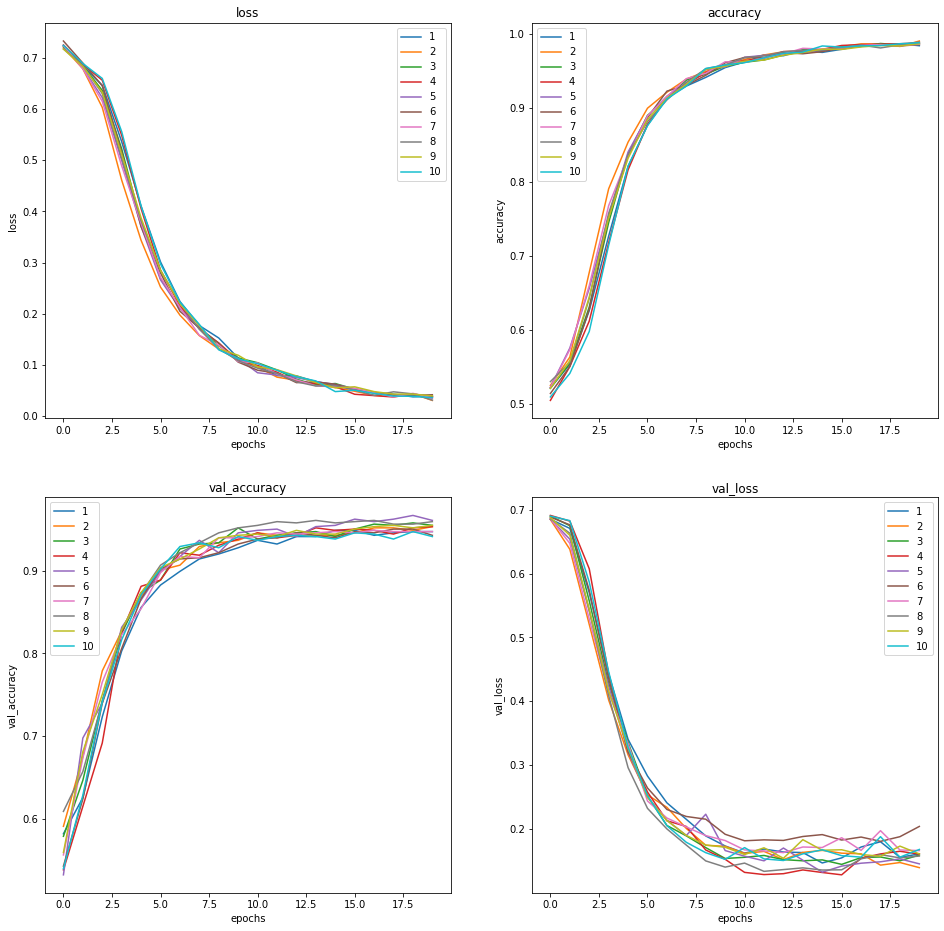

In [ ]:
# Visualize training result
visualize_training(sinovac_cnn_histories, 'sinovac_training_cnn.jpg')

### **Training Model: LSTM**

In [ ]:
# Training single LSTM model
sinovac_lstm_histories = []
sinovac_lstm_train_scores = []
sinovac_lstm_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_sinovac_train, y_sinovac_train):
        X_train, X_val = X_sinovac_train[train], X_sinovac_train[val]
        y_train, y_val = to_categorical(y_sinovac_train[train]), to_categorical(y_sinovac_train[val])
        
        sinovac_lstm_model = build_lstm_model(SINOVAC_EMBEDDING_MATRIX, SINOVAC_MAX_SEQUENCE)

        sinovac_lstm_history = sinovac_lstm_model.fit(x=X_train,
                                                      y=y_train,
                                                      batch_size=64,
                                                      validation_data=(X_val, y_val),
                                                      epochs=20)
        
        sinovac_lstm_histories.append(sinovac_lstm_history.history)
        sinovac_lstm_train_scores.append(sinovac_lstm_model.evaluate(X_train, y_train, verbose=0))
        sinovac_lstm_val_scores.append(sinovac_lstm_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
94/94 [==============================] - 3s 15ms/step - loss: 0.6788 - accuracy: 0.5656 - val_loss: 0.5933 - val_accuracy: 0.6932
Epoch 2/20
94/94 [==============================] - 1s 10ms/step - loss: 0.5874 - accuracy: 0.6916 - val_loss: 0.4902 - val_accuracy: 0.7684
Epoch 3/20
94/94 [==============================] - 1s 11ms/step - loss: 0.5050 - accuracy: 0.7624 - val_loss: 0.4961 - val_accuracy: 0.7850
Epoch 4/20
94/94 [==============================] - 1s 11ms/step - loss: 0.4203 - accuracy: 0.8109 - val_loss: 0.3461 - val_accuracy: 0.8511
Epoch 5/20
94/94 [==============================] - 1s 11ms/step - loss: 0.3494 - accuracy: 0.8491 - val_loss: 0.4089 - val_accuracy: 0.8511
Epoch 6/20
94/94 [==============================] - 1s 10ms/step - loss: 0.3010 - accuracy: 0.8745 - val_loss: 0.3219 - val_accuracy: 0.8767
Epoch 7/20
94/94 [==============================] - 1s 10ms/step - loss: 0.2513 - accuracy: 0.9011 - val_loss: 0.2720 - val_accuracy: 0.9068
Epoch 8/20
94

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(sinovac_lstm_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(sinovac_lstm_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(sinovac_lstm_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(sinovac_lstm_val_scores)[:, 0].mean()))
sinovac_lstm_model.summary()

Average train accuracy: 99.82%
Average train loss: 0.01
Average validation accuracy: 95.08%
Average validation loss: 0.19

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_19 (Embedding)     (None, 100, 200)          1552400   
_________________________________________________________________
dropout_48 (Dropout)         (None, 100, 200)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_49 (Dropout)         (None, 128)               0         
_

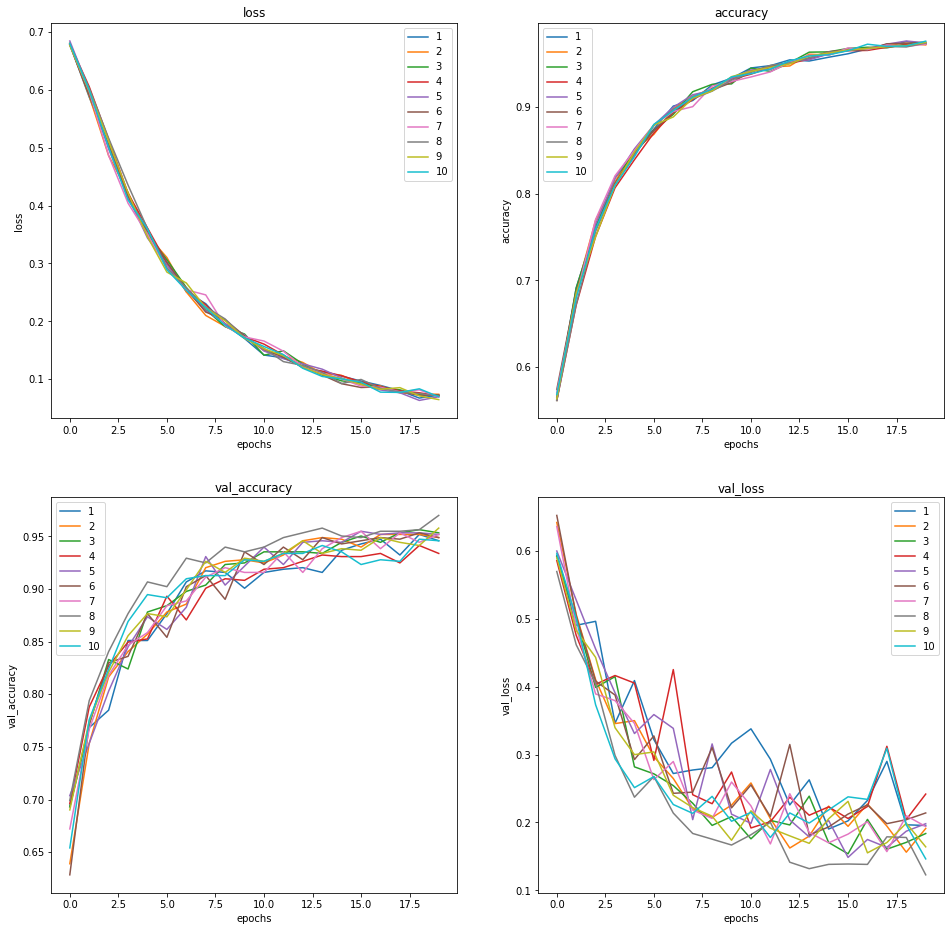

In [ ]:
# Visualize training result
visualize_training(sinovac_lstm_histories, 'sinovac_training_lstm.jpg')

### **Training Model: CNN-LSTM**

In [ ]:
# Training hybrid CNN-LSTM model
sinovac_cnn_lstm_histories = []
sinovac_cnn_lstm_train_scores = []
sinovac_cnn_lstm_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_sinovac_train, y_sinovac_train):
        X_train, X_val = X_sinovac_train[train], X_sinovac_train[val]
        y_train, y_val = to_categorical(y_sinovac_train[train]), to_categorical(y_sinovac_train[val])
        
        sinovac_cnn_lstm_model = build_cnn_lstm_model(SINOVAC_EMBEDDING_MATRIX, SINOVAC_MAX_SEQUENCE)

        sinovac_cnn_lstm_history = sinovac_cnn_lstm_model.fit(x=X_train,
                                                              y=y_train,
                                                              batch_size=64,
                                                              validation_data=(X_val, y_val),
                                                              epochs=20)
        
        sinovac_cnn_lstm_histories.append(sinovac_cnn_lstm_history.history)
        sinovac_cnn_lstm_train_scores.append(sinovac_cnn_lstm_model.evaluate(X_train, y_train, verbose=0))
        sinovac_cnn_lstm_val_scores.append(sinovac_cnn_lstm_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
94/94 [==============================] - 3s 13ms/step - loss: 0.6973 - accuracy: 0.5221 - val_loss: 0.6657 - val_accuracy: 0.5910
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.6597 - accuracy: 0.6032 - val_loss: 0.5638 - val_accuracy: 0.7474
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.5471 - accuracy: 0.7272 - val_loss: 0.4165 - val_accuracy: 0.8271
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4165 - accuracy: 0.8144 - val_loss: 0.3385 - val_accuracy: 0.8617
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3266 - accuracy: 0.8617 - val_loss: 0.3007 - val_accuracy: 0.8857
Epoch 6/20
94/94 [==============================] - 1s 9ms/step - loss: 0.2618 - accuracy: 0.8971 - val_loss: 0.2932 - val_accuracy: 0.8962
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 0.2173 - accuracy: 0.9183 - val_loss: 0.2667 - val_accuracy: 0.9083
Epoch 8/20
94/94 [=

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(sinovac_cnn_lstm_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(sinovac_cnn_lstm_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(sinovac_cnn_lstm_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(sinovac_cnn_lstm_val_scores)[:, 0].mean()))
sinovac_cnn_lstm_model.summary()

Average train accuracy: 99.86%
Average train loss: 0.01
Average validation accuracy: 94.90%
Average validation loss: 0.19

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_29 (Embedding)     (None, 100, 200)          1552400   
_________________________________________________________________
dropout_77 (Dropout)         (None, 100, 200)          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 98, 64)            38464     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 49, 64)            0         
_

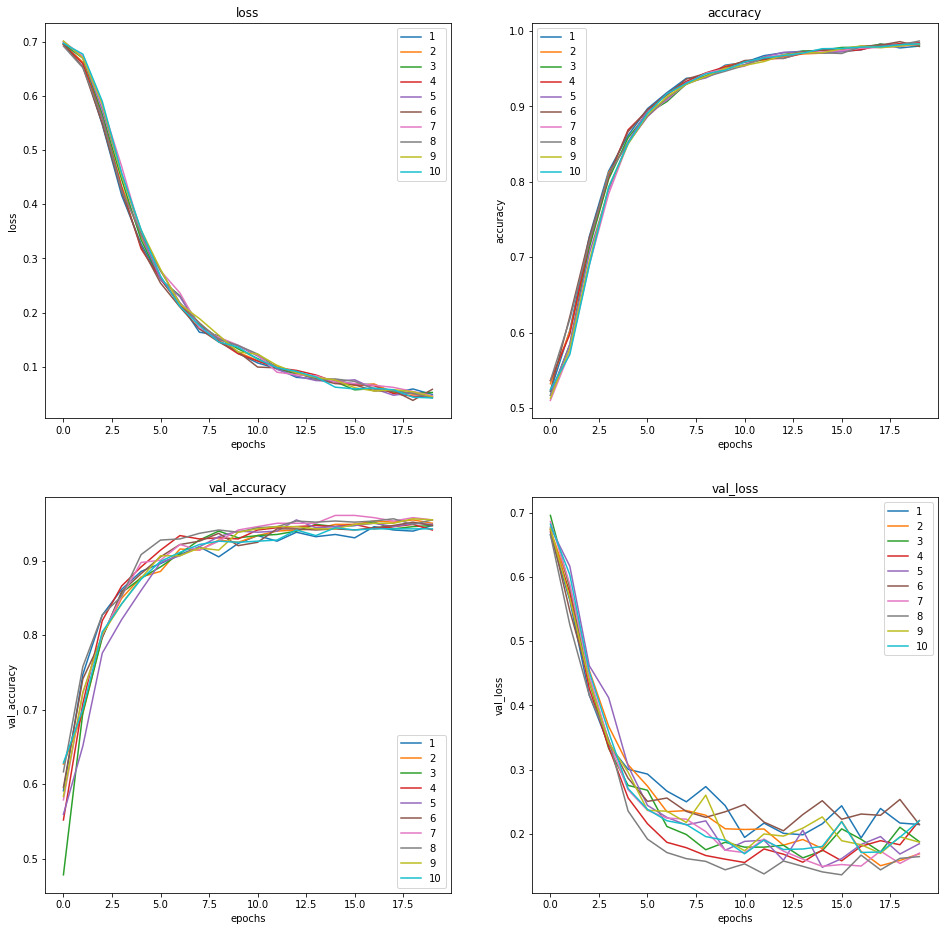

In [ ]:
# Visualize training result
visualize_training(sinovac_cnn_lstm_histories, 'sinovac_training_cnn_lstm.jpg')

## **AstraZeneca Dataset**

In [ ]:
# Define the training data, validation data, and test data
X_astrazeneca_train = X_astrazeneca_train_padded
X_astrazeneca_test = X_astrazeneca_test_padded

y_astrazeneca_train = y_astrazeneca_train_category
y_astrazeneca_test = y_astrazeneca_test_category 

ASTRAZENECA_WORD_INDEX = astrazeneca_tokenizer.word_index
ASTRAZENECA_NUM_WORDS = astrazeneca_num_words
ASTRAZENECA_MAX_SEQUENCE = astrazeneca_max_length
ASTRAZENECA_EMBEDDING_MATRIX = map_word_embedding(ASTRAZENECA_WORD_INDEX,
                                                  ASTRAZENECA_NUM_WORDS,
                                                  GLOVE_WORD_EMBEDDING)

### **Training Model: CNN**

In [ ]:
# Training single CNN model
astrazeneca_cnn_histories = []
astrazeneca_cnn_train_scores = []
astrazeneca_cnn_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_astrazeneca_train, y_astrazeneca_train):
        X_train, X_val = X_astrazeneca_train[train], X_astrazeneca_train[val]
        y_train, y_val = to_categorical(y_astrazeneca_train[train]), to_categorical(y_astrazeneca_train[val])
        
        astrazeneca_cnn_model = build_cnn_model(ASTRAZENECA_EMBEDDING_MATRIX, ASTRAZENECA_MAX_SEQUENCE)

        astrazeneca_cnn_history = astrazeneca_cnn_model.fit(x=X_train,
                                                            y=y_train,
                                                            batch_size=64,
                                                            validation_data=(X_val, y_val),
                                                            epochs=20)

        astrazeneca_cnn_histories.append(astrazeneca_cnn_history.history)
        astrazeneca_cnn_train_scores.append(astrazeneca_cnn_model.evaluate(X_train, y_train, verbose=0))
        astrazeneca_cnn_val_scores.append(astrazeneca_cnn_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
52/52 [==============================] - 1s 10ms/step - loss: 0.7205 - accuracy: 0.5534 - val_loss: 0.6818 - val_accuracy: 0.5734
Epoch 2/20
52/52 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.6039 - val_loss: 0.6208 - val_accuracy: 0.7147
Epoch 3/20
52/52 [==============================] - 0s 5ms/step - loss: 0.5636 - accuracy: 0.7008 - val_loss: 0.4850 - val_accuracy: 0.7826
Epoch 4/20
52/52 [==============================] - 0s 5ms/step - loss: 0.4562 - accuracy: 0.7838 - val_loss: 0.4100 - val_accuracy: 0.8152
Epoch 5/20
52/52 [==============================] - 0s 5ms/step - loss: 0.3459 - accuracy: 0.8569 - val_loss: 0.3095 - val_accuracy: 0.8723
Epoch 6/20
52/52 [==============================] - 0s 5ms/step - loss: 0.2691 - accuracy: 0.8937 - val_loss: 0.2532 - val_accuracy: 0.8967
Epoch 7/20
52/52 [==============================] - 0s 5ms/step - loss: 0.1932 - accuracy: 0.9263 - val_loss: 0.2099 - val_accuracy: 0.9239
Epoch 8/20
52/52 [=

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(astrazeneca_cnn_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(astrazeneca_cnn_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(astrazeneca_cnn_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(astrazeneca_cnn_val_scores)[:, 0].mean()))
astrazeneca_cnn_model.summary()

Average train accuracy: 99.99%
Average train loss: 0.00
Average validation accuracy: 95.87%
Average validation loss: 0.13

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_39 (Embedding)     (None, 100, 200)          1277800   
_________________________________________________________________
dropout_107 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 98, 64)            38464     
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
dropout_108 (Dropout)        (None, 49, 64)            0         
_

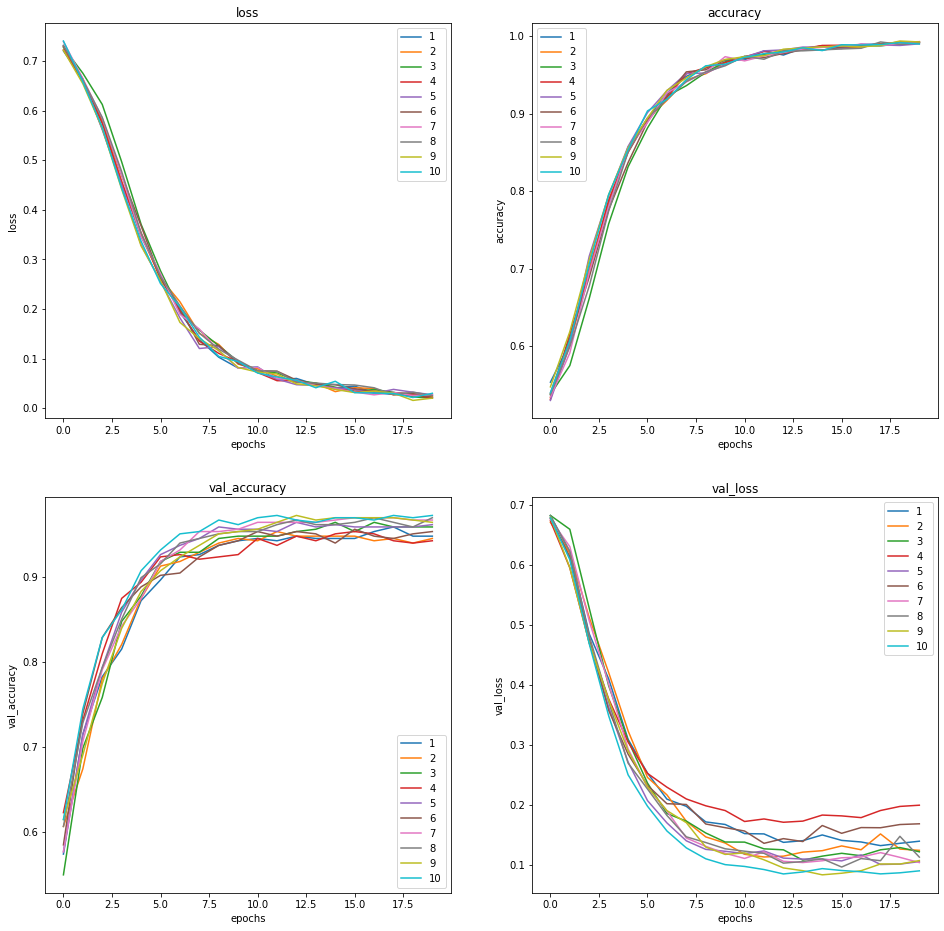

In [ ]:
# Visualize training result
visualize_training(astrazeneca_cnn_histories, 'astrazeneca_training_cnn.jpg')

### **Training Model: LSTM**

In [ ]:
# Training single LSTM model
astrazeneca_lstm_histories = []
astrazeneca_lstm_train_scores = []
astrazeneca_lstm_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_astrazeneca_train, y_astrazeneca_train):
        X_train, X_val = X_astrazeneca_train[train], X_astrazeneca_train[val]
        y_train, y_val = to_categorical(y_astrazeneca_train[train]), to_categorical(y_astrazeneca_train[val])
        
        astrazeneca_lstm_model = build_lstm_model(ASTRAZENECA_EMBEDDING_MATRIX, ASTRAZENECA_MAX_SEQUENCE)

        astrazeneca_lstm_history = astrazeneca_lstm_model.fit(x=X_train,
                                                              y=y_train,
                                                              batch_size=64,
                                                              validation_data=(X_val, y_val),
                                                              epochs=20)

        astrazeneca_lstm_histories.append(astrazeneca_lstm_history.history)
        astrazeneca_lstm_train_scores.append(astrazeneca_lstm_model.evaluate(X_train, y_train, verbose=0))
        astrazeneca_lstm_val_scores.append(astrazeneca_lstm_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
52/52 [==============================] - 2s 19ms/step - loss: 0.6555 - accuracy: 0.6039 - val_loss: 0.5120 - val_accuracy: 0.7554
Epoch 2/20
52/52 [==============================] - 1s 11ms/step - loss: 0.5400 - accuracy: 0.7268 - val_loss: 0.4092 - val_accuracy: 0.8207
Epoch 3/20
52/52 [==============================] - 1s 11ms/step - loss: 0.4385 - accuracy: 0.7986 - val_loss: 0.3528 - val_accuracy: 0.8560
Epoch 4/20
52/52 [==============================] - 1s 11ms/step - loss: 0.3808 - accuracy: 0.8367 - val_loss: 0.3324 - val_accuracy: 0.8696
Epoch 5/20
52/52 [==============================] - 1s 11ms/step - loss: 0.3160 - accuracy: 0.8641 - val_loss: 0.2432 - val_accuracy: 0.9049
Epoch 6/20
52/52 [==============================] - 1s 11ms/step - loss: 0.2561 - accuracy: 0.8961 - val_loss: 0.2457 - val_accuracy: 0.9076
Epoch 7/20
52/52 [==============================] - 1s 11ms/step - loss: 0.2125 - accuracy: 0.9109 - val_loss: 0.2071 - val_accuracy: 0.9212
Epoch 8/20
52

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(astrazeneca_lstm_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(astrazeneca_lstm_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(astrazeneca_lstm_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(astrazeneca_lstm_val_scores)[:, 0].mean()))
astrazeneca_lstm_model.summary()

Average train accuracy: 99.96%
Average train loss: 0.00
Average validation accuracy: 96.14%
Average validation loss: 0.14

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_49 (Embedding)     (None, 100, 200)          1277800   
_________________________________________________________________
dropout_128 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 128)               168448    
_________________________________________________________________
dense_98 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_129 (Dropout)        (None, 128)               0         
_

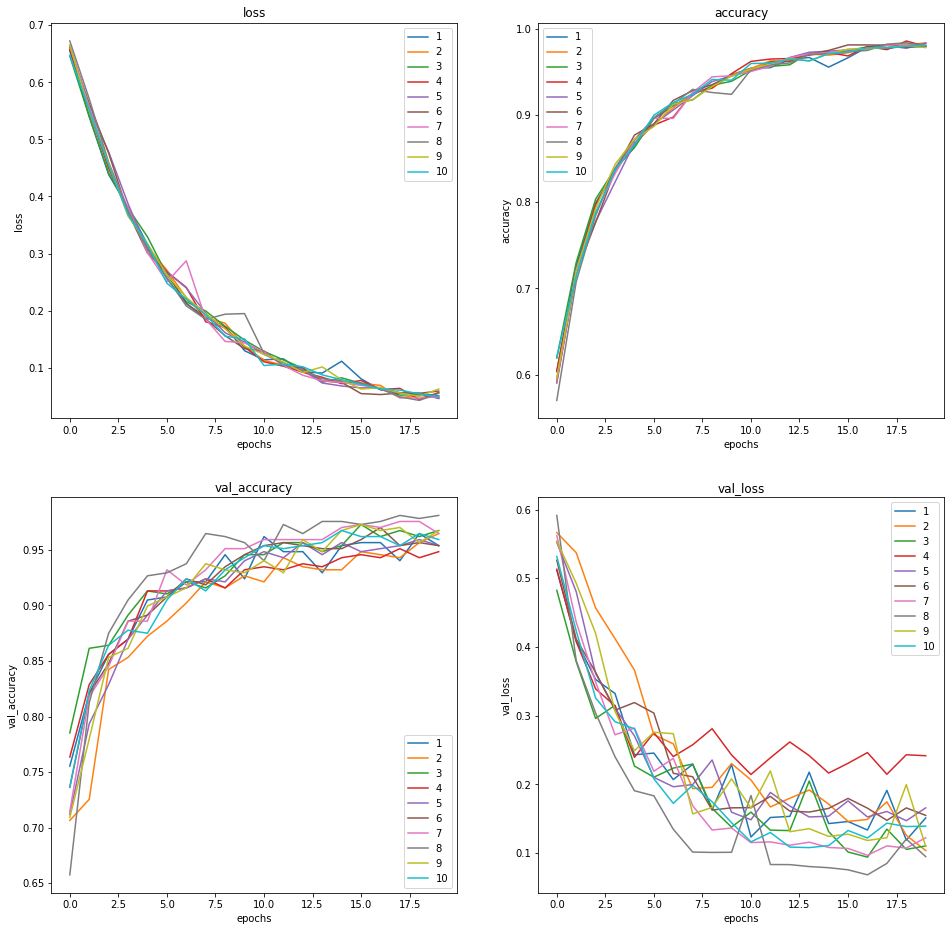

In [ ]:
# Visualize training result
visualize_training(astrazeneca_lstm_histories, 'astrazeneca_training_lstm.jpg')

### **Training Model: CNN-LSTM**

In [ ]:
# Training hybrid CNN-LSTM model
astrazeneca_cnn_lstm_histories = []
astrazeneca_cnn_lstm_train_scores = []
astrazeneca_cnn_lstm_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_astrazeneca_train, y_astrazeneca_train):
        X_train, X_val = X_astrazeneca_train[train], X_astrazeneca_train[val]
        y_train, y_val = to_categorical(y_astrazeneca_train[train]), to_categorical(y_astrazeneca_train[val])
        
        astrazeneca_cnn_lstm_model = build_cnn_lstm_model(ASTRAZENECA_EMBEDDING_MATRIX, ASTRAZENECA_MAX_SEQUENCE)

        astrazeneca_cnn_lstm_history = astrazeneca_cnn_lstm_model.fit(x=X_train,
                                                                      y=y_train,
                                                                      batch_size=64,
                                                                      validation_data=(X_val, y_val),
                                                                      epochs=20)

        astrazeneca_cnn_lstm_histories.append(astrazeneca_cnn_lstm_history.history)
        astrazeneca_cnn_lstm_train_scores.append(astrazeneca_cnn_lstm_model.evaluate(X_train, y_train, verbose=0))
        astrazeneca_cnn_lstm_val_scores.append(astrazeneca_cnn_lstm_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
52/52 [==============================] - 3s 17ms/step - loss: 0.6926 - accuracy: 0.5432 - val_loss: 0.6489 - val_accuracy: 0.7364
Epoch 2/20
52/52 [==============================] - 0s 9ms/step - loss: 0.6421 - accuracy: 0.6335 - val_loss: 0.5190 - val_accuracy: 0.7391
Epoch 3/20
52/52 [==============================] - 1s 10ms/step - loss: 0.5419 - accuracy: 0.7261 - val_loss: 0.4052 - val_accuracy: 0.8179
Epoch 4/20
52/52 [==============================] - 0s 10ms/step - loss: 0.4284 - accuracy: 0.8050 - val_loss: 0.3336 - val_accuracy: 0.8696
Epoch 5/20
52/52 [==============================] - 0s 9ms/step - loss: 0.3332 - accuracy: 0.8696 - val_loss: 0.3026 - val_accuracy: 0.8804
Epoch 6/20
52/52 [==============================] - 0s 9ms/step - loss: 0.2591 - accuracy: 0.8958 - val_loss: 0.2529 - val_accuracy: 0.9103
Epoch 7/20
52/52 [==============================] - 1s 10ms/step - loss: 0.1886 - accuracy: 0.9293 - val_loss: 0.2124 - val_accuracy: 0.9185
Epoch 8/20
52/52

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(astrazeneca_cnn_lstm_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(astrazeneca_cnn_lstm_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(astrazeneca_cnn_lstm_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(astrazeneca_cnn_lstm_val_scores)[:, 0].mean()))
astrazeneca_cnn_lstm_model.summary()

Average train accuracy: 99.91%
Average train loss: 0.00
Average validation accuracy: 96.20%
Average validation loss: 0.14

Model: "model_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_59 (Embedding)     (None, 100, 200)          1277800   
_________________________________________________________________
dropout_157 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 98, 64)            38464     
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
dropout_158 (Dropout)        (None, 49, 64)            0         
_

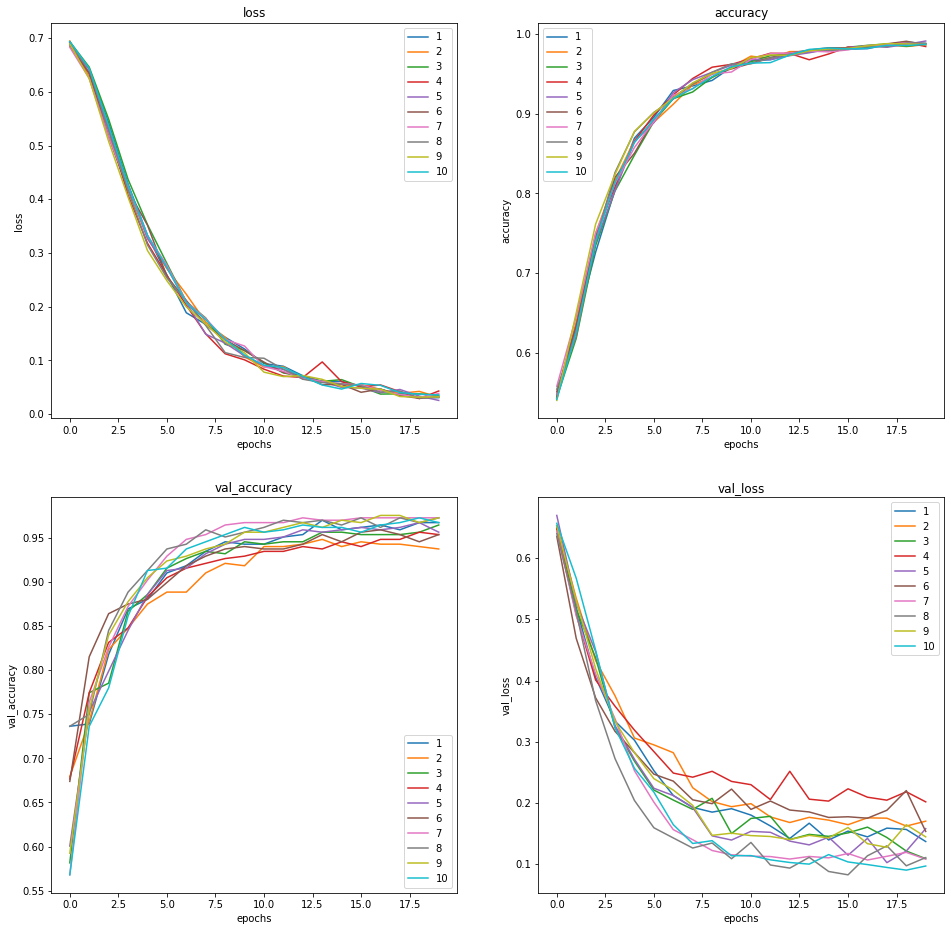

In [ ]:
# Visualize training result
visualize_training(astrazeneca_cnn_lstm_histories, 'astrazeneca_training_cnn_lstm.jpg')

## **Pfizer Dataset**

In [ ]:
# Define the training data, validation data, and test data
X_pfizer_train = X_pfizer_train_padded
X_pfizer_test = X_pfizer_test_padded

y_pfizer_train = y_pfizer_train_category
y_pfizer_test = y_pfizer_test_category 

PFIZER_WORD_INDEX = pfizer_tokenizer.word_index
PFIZER_NUM_WORDS = pfizer_num_words
PFIZER_MAX_SEQUENCE = pfizer_max_length
PFIZER_EMBEDDING_MATRIX = map_word_embedding(PFIZER_WORD_INDEX,
                                             PFIZER_NUM_WORDS,
                                             GLOVE_WORD_EMBEDDING)

### **Training Model: CNN**

In [ ]:
# Training single CNN model
pfizer_cnn_histories = []
pfizer_cnn_train_scores = []
pfizer_cnn_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_pfizer_train, y_pfizer_train):
        X_train, X_val = X_pfizer_train[train], X_pfizer_train[val]
        y_train, y_val = to_categorical(y_pfizer_train[train]), to_categorical(y_pfizer_train[val])
        
        pfizer_cnn_model = build_cnn_model(PFIZER_EMBEDDING_MATRIX, PFIZER_MAX_SEQUENCE)

        pfizer_cnn_history = pfizer_cnn_model.fit(x=X_train,
                                                  y=y_train,
                                                  batch_size=64,
                                                  validation_data=(X_val, y_val),
                                                  epochs=20)

        pfizer_cnn_histories.append(pfizer_cnn_history.history)
        pfizer_cnn_train_scores.append(pfizer_cnn_model.evaluate(X_train, y_train, verbose=0))
        pfizer_cnn_val_scores.append(pfizer_cnn_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
52/52 [==============================] - 1s 9ms/step - loss: 0.7357 - accuracy: 0.5274 - val_loss: 0.6842 - val_accuracy: 0.5479
Epoch 2/20
52/52 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.5643 - val_loss: 0.6674 - val_accuracy: 0.6466
Epoch 3/20
52/52 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6125 - val_loss: 0.6149 - val_accuracy: 0.6849
Epoch 4/20
52/52 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.7006 - val_loss: 0.4966 - val_accuracy: 0.7644
Epoch 5/20
52/52 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.7869 - val_loss: 0.3753 - val_accuracy: 0.8548
Epoch 6/20
52/52 [==============================] - 0s 5ms/step - loss: 0.3389 - accuracy: 0.8549 - val_loss: 0.2618 - val_accuracy: 0.8932
Epoch 7/20
52/52 [==============================] - 0s 5ms/step - loss: 0.2504 - accuracy: 0.8951 - val_loss: 0.2031 - val_accuracy: 0.9260
Epoch 8/20
52/52 [==

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(pfizer_cnn_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(pfizer_cnn_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(pfizer_cnn_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(pfizer_cnn_val_scores)[:, 0].mean()))
pfizer_cnn_model.summary()

Average train accuracy: 99.99%
Average train loss: 0.00
Average validation accuracy: 96.13%
Average validation loss: 0.12

Model: "model_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_69 (Embedding)     (None, 100, 200)          1133600   
_________________________________________________________________
dropout_187 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 98, 64)            38464     
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
dropout_188 (Dropout)        (None, 49, 64)            0         
_

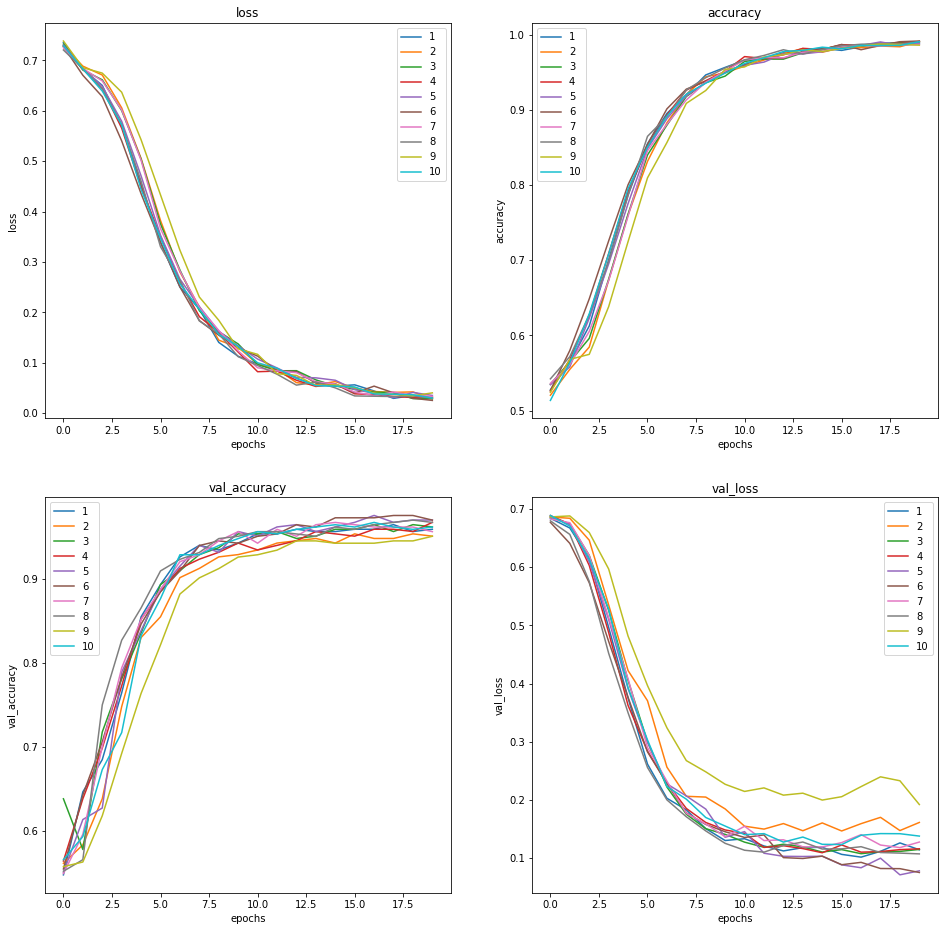

In [ ]:
# Visualize training result
visualize_training(pfizer_cnn_histories, 'pfizer_training_cnn.jpg')

### **Training Model: LSTM**

In [ ]:
# Training single LSTM model
pfizer_lstm_histories = []
pfizer_lstm_train_scores = []
pfizer_lstm_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_pfizer_train, y_pfizer_train):
        X_train, X_val = X_pfizer_train[train], X_pfizer_train[val]
        y_train, y_val = to_categorical(y_pfizer_train[train]), to_categorical(y_pfizer_train[val])
        
        pfizer_lstm_model = build_lstm_model(PFIZER_EMBEDDING_MATRIX, PFIZER_MAX_SEQUENCE)

        pfizer_lstm_history = pfizer_lstm_model.fit(x=X_train,
                                                    y=y_train,
                                                    batch_size=64,
                                                    validation_data=(X_val, y_val),
                                                    epochs=20)

        pfizer_lstm_histories.append(pfizer_lstm_history.history)
        pfizer_lstm_train_scores.append(pfizer_lstm_model.evaluate(X_train, y_train, verbose=0))
        pfizer_lstm_val_scores.append(pfizer_lstm_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
52/52 [==============================] - 3s 18ms/step - loss: 0.6829 - accuracy: 0.5546 - val_loss: 0.6115 - val_accuracy: 0.6767
Epoch 2/20
52/52 [==============================] - 1s 11ms/step - loss: 0.5998 - accuracy: 0.6805 - val_loss: 0.4829 - val_accuracy: 0.7918
Epoch 3/20
52/52 [==============================] - 1s 11ms/step - loss: 0.5157 - accuracy: 0.7442 - val_loss: 0.4236 - val_accuracy: 0.8301
Epoch 4/20
52/52 [==============================] - 1s 11ms/step - loss: 0.4548 - accuracy: 0.7796 - val_loss: 0.3402 - val_accuracy: 0.8712
Epoch 5/20
52/52 [==============================] - 1s 11ms/step - loss: 0.3835 - accuracy: 0.8348 - val_loss: 0.3619 - val_accuracy: 0.8740
Epoch 6/20
52/52 [==============================] - 1s 11ms/step - loss: 0.3201 - accuracy: 0.8607 - val_loss: 0.2778 - val_accuracy: 0.8877
Epoch 7/20
52/52 [==============================] - 1s 11ms/step - loss: 0.2704 - accuracy: 0.8881 - val_loss: 0.3100 - val_accuracy: 0.8849
Epoch 8/20
52

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(pfizer_lstm_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(pfizer_lstm_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(pfizer_lstm_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(pfizer_lstm_val_scores)[:, 0].mean()))
pfizer_lstm_model.summary()

Average train accuracy: 99.83%
Average train loss: 0.01
Average validation accuracy: 95.31%
Average validation loss: 0.15

Model: "model_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_80 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_79 (Embedding)     (None, 100, 200)          1133600   
_________________________________________________________________
dropout_208 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 128)               168448    
_________________________________________________________________
dense_158 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_209 (Dropout)        (None, 128)               0         
_

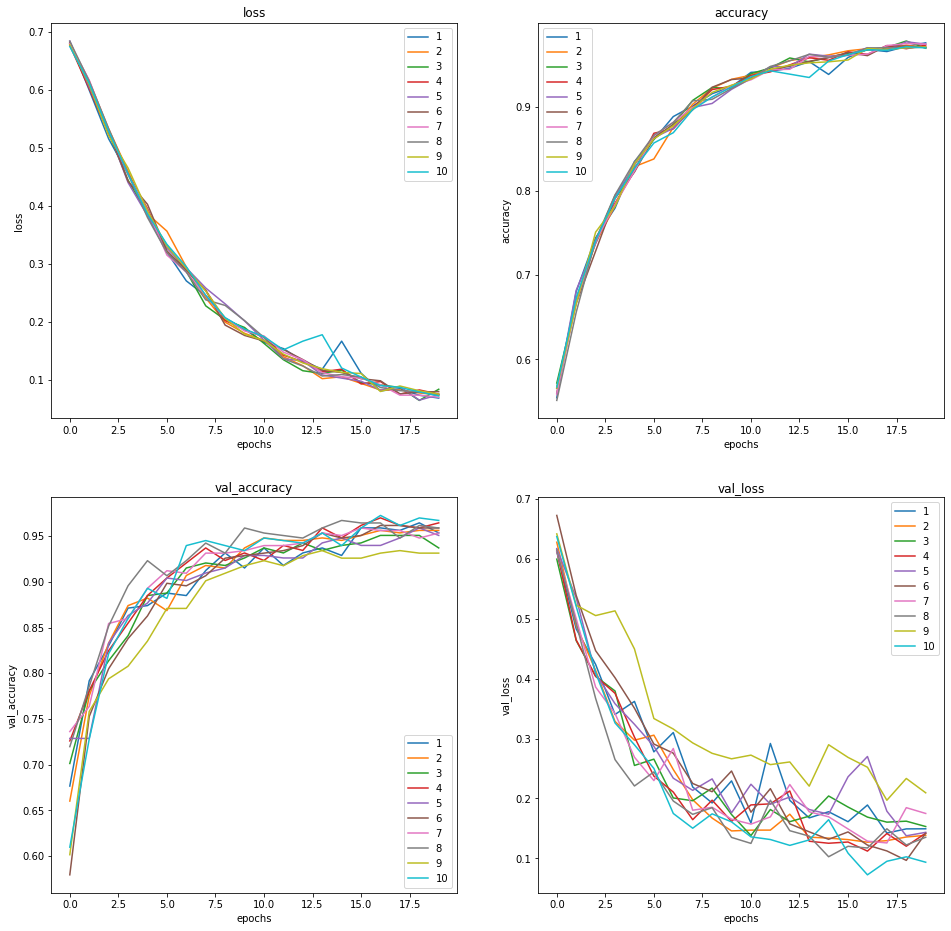

In [ ]:
# Visualize training result
visualize_training(pfizer_lstm_histories, 'pfizer_training_lstm.jpg')

### **Training Model: CNN-LSTM**

In [ ]:
# Training hybrid CNN-LSTM model
pfizer_cnn_lstm_histories = []
pfizer_cnn_lstm_train_scores = []
pfizer_cnn_lstm_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_pfizer_train, y_pfizer_train):
        X_train, X_val = X_pfizer_train[train], X_pfizer_train[val]
        y_train, y_val = to_categorical(y_pfizer_train[train]), to_categorical(y_pfizer_train[val])
        
        pfizer_cnn_lstm_model = build_cnn_lstm_model(PFIZER_EMBEDDING_MATRIX, PFIZER_MAX_SEQUENCE)

        pfizer_cnn_lstm_history = pfizer_cnn_lstm_model.fit(x=X_train,
                                                            y=y_train,
                                                            batch_size=64,
                                                            validation_data=(X_val, y_val),
                                                            epochs=20)

        pfizer_cnn_lstm_histories.append(pfizer_cnn_lstm_history.history)
        pfizer_cnn_lstm_train_scores.append(pfizer_cnn_lstm_model.evaluate(X_train, y_train, verbose=0))
        pfizer_cnn_lstm_val_scores.append(pfizer_cnn_lstm_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
52/52 [==============================] - 2s 17ms/step - loss: 0.7013 - accuracy: 0.5345 - val_loss: 0.6807 - val_accuracy: 0.5726
Epoch 2/20
52/52 [==============================] - 0s 10ms/step - loss: 0.6844 - accuracy: 0.5512 - val_loss: 0.6507 - val_accuracy: 0.6329
Epoch 3/20
52/52 [==============================] - 0s 9ms/step - loss: 0.6377 - accuracy: 0.6329 - val_loss: 0.5478 - val_accuracy: 0.7288
Epoch 4/20
52/52 [==============================] - 0s 9ms/step - loss: 0.5532 - accuracy: 0.7213 - val_loss: 0.4344 - val_accuracy: 0.8055
Epoch 5/20
52/52 [==============================] - 0s 9ms/step - loss: 0.4480 - accuracy: 0.7909 - val_loss: 0.3377 - val_accuracy: 0.8630
Epoch 6/20
52/52 [==============================] - 0s 9ms/step - loss: 0.3438 - accuracy: 0.8521 - val_loss: 0.2611 - val_accuracy: 0.9096
Epoch 7/20
52/52 [==============================] - 0s 9ms/step - loss: 0.2672 - accuracy: 0.8893 - val_loss: 0.2197 - val_accuracy: 0.9205
Epoch 8/20
52/52 [

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(pfizer_cnn_lstm_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(pfizer_cnn_lstm_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(pfizer_cnn_lstm_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(pfizer_cnn_lstm_val_scores)[:, 0].mean()))
pfizer_cnn_lstm_model.summary()

Average train accuracy: 99.98%
Average train loss: 0.00
Average validation accuracy: 95.94%
Average validation loss: 0.14

Model: "model_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_90 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_89 (Embedding)     (None, 100, 200)          1133600   
_________________________________________________________________
dropout_237 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 98, 64)            38464     
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
dropout_238 (Dropout)        (None, 49, 64)            0         
_

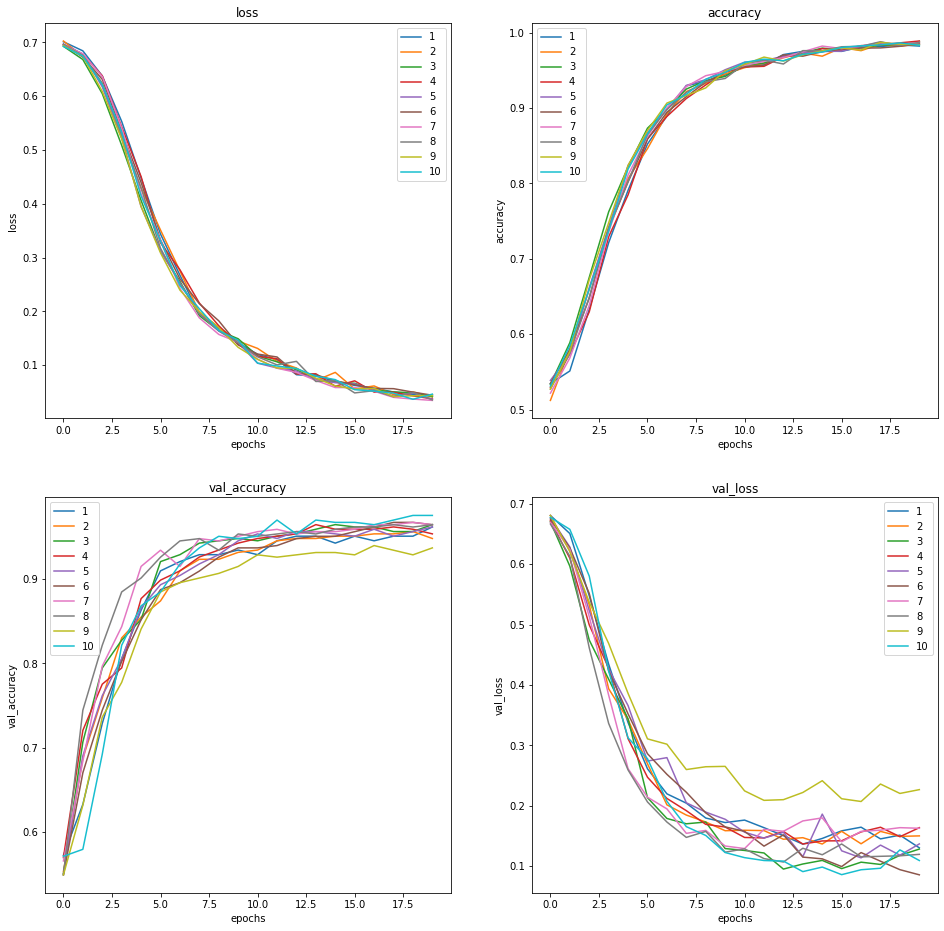

In [ ]:
# Visualize training result
visualize_training(pfizer_cnn_lstm_histories, 'pfizer_training_cnn_lstm.jpg')

## **Moderna Dataset**

In [ ]:
# Define the training data, validation data, and test data
X_moderna_train = X_moderna_train_padded
X_moderna_test = X_moderna_test_padded

y_moderna_train = y_moderna_train_category
y_moderna_test = y_moderna_test_category 

MODERNA_WORD_INDEX = moderna_tokenizer.word_index
MODERNA_NUM_WORDS = moderna_num_words
MODERNA_MAX_SEQUENCE = moderna_max_length
MODERNA_EMBEDDING_MATRIX = map_word_embedding(MODERNA_WORD_INDEX,
                                              MODERNA_NUM_WORDS,
                                              GLOVE_WORD_EMBEDDING)

### **Training Model: CNN**

In [ ]:
# Training single CNN model
moderna_cnn_histories = []
moderna_cnn_train_scores = []
moderna_cnn_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_moderna_train, y_moderna_train):
        X_train, X_val = X_moderna_train[train], X_moderna_train[val]
        y_train, y_val = to_categorical(y_moderna_train[train]), to_categorical(y_moderna_train[val])
        
        moderna_cnn_model = build_cnn_model(MODERNA_EMBEDDING_MATRIX, MODERNA_MAX_SEQUENCE)

        moderna_cnn_history = moderna_cnn_model.fit(x=X_train,
                                                    y=y_train,
                                                    batch_size=64,
                                                    validation_data=(X_val, y_val),
                                                    epochs=20)

        moderna_cnn_histories.append(moderna_cnn_history.history)
        moderna_cnn_train_scores.append(moderna_cnn_model.evaluate(X_train, y_train, verbose=0))
        moderna_cnn_val_scores.append(moderna_cnn_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
75/75 [==============================] - 1s 9ms/step - loss: 0.7194 - accuracy: 0.5411 - val_loss: 0.6830 - val_accuracy: 0.5849
Epoch 2/20
75/75 [==============================] - 0s 5ms/step - loss: 0.6656 - accuracy: 0.5973 - val_loss: 0.6258 - val_accuracy: 0.6925
Epoch 3/20
75/75 [==============================] - 0s 5ms/step - loss: 0.5842 - accuracy: 0.6927 - val_loss: 0.4759 - val_accuracy: 0.8264
Epoch 4/20
75/75 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.8061 - val_loss: 0.3439 - val_accuracy: 0.8604
Epoch 5/20
75/75 [==============================] - 0s 5ms/step - loss: 0.3073 - accuracy: 0.8692 - val_loss: 0.2640 - val_accuracy: 0.8925
Epoch 6/20
75/75 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9084 - val_loss: 0.1934 - val_accuracy: 0.9151
Epoch 7/20
75/75 [==============================] - 0s 5ms/step - loss: 0.1622 - accuracy: 0.9373 - val_loss: 0.1629 - val_accuracy: 0.9340
Epoch 8/20
75/75 [==

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(moderna_cnn_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(moderna_cnn_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(moderna_cnn_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(moderna_cnn_val_scores)[:, 0].mean()))
moderna_cnn_model.summary()

Average train accuracy: 99.99%
Average train loss: 0.00
Average validation accuracy: 95.92%
Average validation loss: 0.13

Model: "model_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_100 (InputLayer)       [(None, 100)]             0         
_________________________________________________________________
embedding_99 (Embedding)     (None, 100, 200)          1546400   
_________________________________________________________________
dropout_267 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 98, 64)            38464     
_________________________________________________________________
max_pooling1d_69 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
dropout_268 (Dropout)        (None, 49, 64)            0         
_

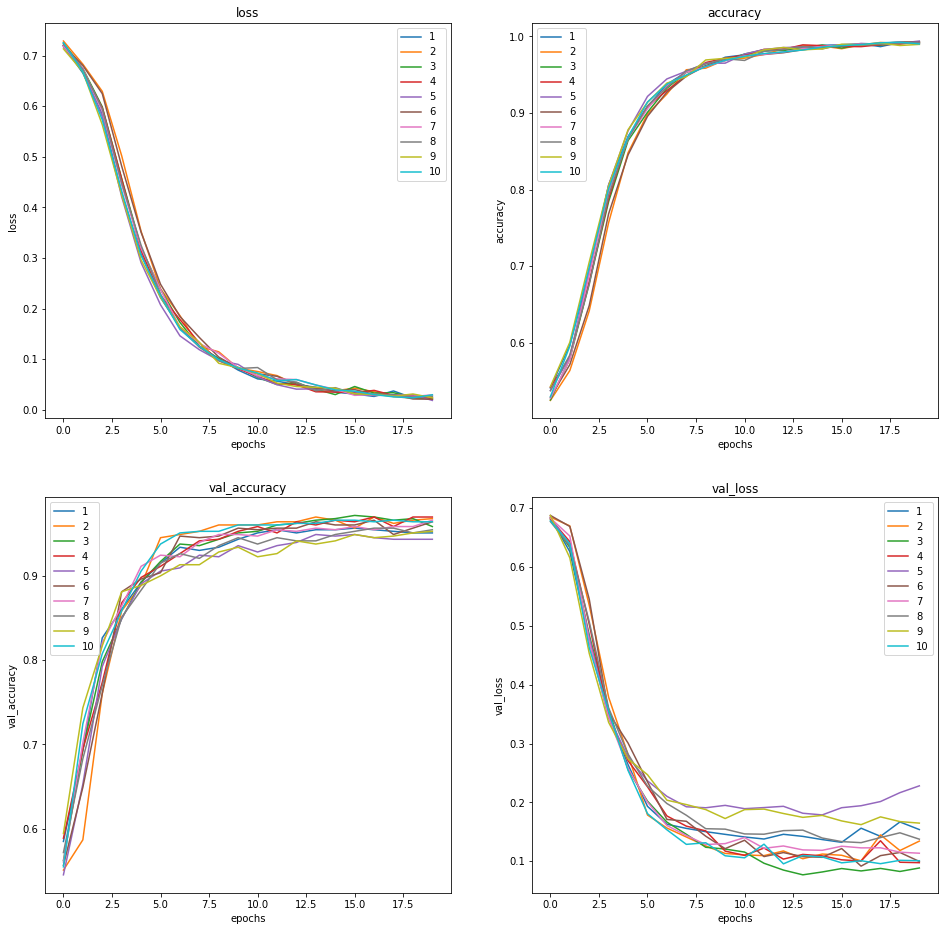

In [ ]:
# Visualize training result
visualize_training(moderna_cnn_histories, 'moderna_training_cnn.jpg')

### **Training Model: LSTM**

In [ ]:
# Training single LSTM model
moderna_lstm_histories = []
moderna_lstm_train_scores = []
moderna_lstm_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_moderna_train, y_moderna_train):
        X_train, X_val = X_moderna_train[train], X_moderna_train[val]
        y_train, y_val = to_categorical(y_moderna_train[train]), to_categorical(y_moderna_train[val])
        
        moderna_lstm_model = build_lstm_model(MODERNA_EMBEDDING_MATRIX, MODERNA_MAX_SEQUENCE)

        moderna_lstm_history = moderna_lstm_model.fit(x=X_train,
                                                      y=y_train,
                                                      batch_size=64,
                                                      validation_data=(X_val, y_val),
                                                      epochs=20)

        moderna_lstm_histories.append(moderna_lstm_history.history)
        moderna_lstm_train_scores.append(moderna_lstm_model.evaluate(X_train, y_train, verbose=0))
        moderna_lstm_val_scores.append(moderna_lstm_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
75/75 [==============================] - 3s 16ms/step - loss: 0.6710 - accuracy: 0.5797 - val_loss: 0.5569 - val_accuracy: 0.7170
Epoch 2/20
75/75 [==============================] - 1s 11ms/step - loss: 0.5634 - accuracy: 0.7084 - val_loss: 0.4804 - val_accuracy: 0.7849
Epoch 3/20
75/75 [==============================] - 1s 11ms/step - loss: 0.4719 - accuracy: 0.7748 - val_loss: 0.3209 - val_accuracy: 0.8604
Epoch 4/20
75/75 [==============================] - 1s 11ms/step - loss: 0.3961 - accuracy: 0.8226 - val_loss: 0.2962 - val_accuracy: 0.8774
Epoch 5/20
75/75 [==============================] - 1s 11ms/step - loss: 0.3150 - accuracy: 0.8652 - val_loss: 0.2647 - val_accuracy: 0.8887
Epoch 6/20
75/75 [==============================] - 1s 11ms/step - loss: 0.2715 - accuracy: 0.8874 - val_loss: 0.2602 - val_accuracy: 0.8887
Epoch 7/20
75/75 [==============================] - 1s 11ms/step - loss: 0.2257 - accuracy: 0.9101 - val_loss: 0.2869 - val_accuracy: 0.9019
Epoch 8/20
75

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(moderna_lstm_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(moderna_lstm_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(moderna_lstm_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(moderna_lstm_val_scores)[:, 0].mean()))
moderna_lstm_model.summary()

Average train accuracy: 99.93%
Average train loss: 0.00
Average validation accuracy: 95.96%
Average validation loss: 0.16

Model: "model_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_110 (InputLayer)       [(None, 100)]             0         
_________________________________________________________________
embedding_109 (Embedding)    (None, 100, 200)          1546400   
_________________________________________________________________
dropout_288 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 128)               168448    
_________________________________________________________________
dense_218 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_289 (Dropout)        (None, 128)               0         


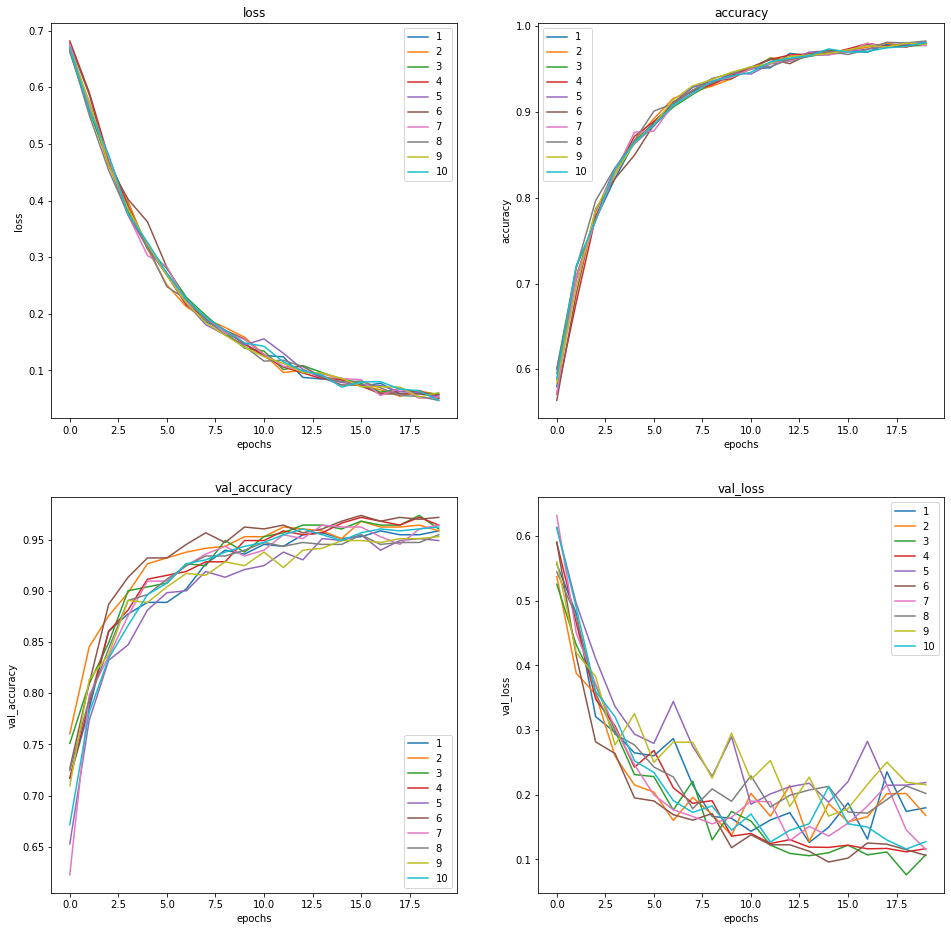

In [ ]:
# Visualize training result
visualize_training(moderna_lstm_histories, 'moderna_training_lstm.jpg')

### **Training Model: CNN-LSTM**

In [ ]:
# Training hybrid CNN-LSTM model
moderna_cnn_lstm_histories = []
moderna_cnn_lstm_train_scores = []
moderna_cnn_lstm_val_scores = []

with tf.device('/device:GPU:0'):
    k = 1
    for train, val in kfold.split(X_moderna_train, y_moderna_train):
        X_train, X_val = X_moderna_train[train], X_moderna_train[val]
        y_train, y_val = to_categorical(y_moderna_train[train]), to_categorical(y_moderna_train[val])
        
        moderna_cnn_lstm_model = build_cnn_lstm_model(MODERNA_EMBEDDING_MATRIX, MODERNA_MAX_SEQUENCE)

        moderna_cnn_lstm_history = moderna_cnn_lstm_model.fit(x=X_train,
                                                              y=y_train,
                                                              batch_size=64,
                                                              validation_data=(X_val, y_val),
                                                              epochs=20)

        moderna_cnn_lstm_histories.append(moderna_cnn_lstm_history.history)
        moderna_cnn_lstm_train_scores.append(moderna_cnn_lstm_model.evaluate(X_train, y_train, verbose=0))
        moderna_cnn_lstm_val_scores.append(moderna_cnn_lstm_model.evaluate(X_val, y_val, verbose=0))
        print('\n')
        k += 1

Epoch 1/20
75/75 [==============================] - 3s 14ms/step - loss: 0.6967 - accuracy: 0.5325 - val_loss: 0.6796 - val_accuracy: 0.5981
Epoch 2/20
75/75 [==============================] - 1s 9ms/step - loss: 0.6686 - accuracy: 0.5912 - val_loss: 0.5613 - val_accuracy: 0.7189
Epoch 3/20
75/75 [==============================] - 1s 9ms/step - loss: 0.5630 - accuracy: 0.7092 - val_loss: 0.3859 - val_accuracy: 0.8453
Epoch 4/20
75/75 [==============================] - 1s 9ms/step - loss: 0.4238 - accuracy: 0.8069 - val_loss: 0.2889 - val_accuracy: 0.8943
Epoch 5/20
75/75 [==============================] - 1s 9ms/step - loss: 0.3169 - accuracy: 0.8700 - val_loss: 0.2311 - val_accuracy: 0.9057
Epoch 6/20
75/75 [==============================] - 1s 9ms/step - loss: 0.2366 - accuracy: 0.9050 - val_loss: 0.1797 - val_accuracy: 0.9226
Epoch 7/20
75/75 [==============================] - 1s 9ms/step - loss: 0.1903 - accuracy: 0.9235 - val_loss: 0.1711 - val_accuracy: 0.9396
Epoch 8/20
75/75 [=

In [ ]:
print('Average train accuracy: {:.2f}%'.format(np.asarray(moderna_cnn_lstm_train_scores)[:, 1].mean()*100))
print('Average train loss: {:.2f}'.format(np.asarray(moderna_cnn_lstm_train_scores)[:, 0].mean()))
print('Average validation accuracy: {:.2f}%'.format(np.asarray(moderna_cnn_lstm_val_scores)[:, 1].mean()*100))
print('Average validation loss: {:.2f}\n'.format(np.asarray(moderna_cnn_lstm_val_scores)[:, 0].mean()))
moderna_cnn_lstm_model.summary()

Average train accuracy: 99.98%
Average train loss: 0.00
Average validation accuracy: 96.02%
Average validation loss: 0.15

Model: "model_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_120 (InputLayer)       [(None, 100)]             0         
_________________________________________________________________
embedding_119 (Embedding)    (None, 100, 200)          1546400   
_________________________________________________________________
dropout_317 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 98, 64)            38464     
_________________________________________________________________
max_pooling1d_79 (MaxPooling (None, 49, 64)            0         
_________________________________________________________________
dropout_318 (Dropout)        (None, 49, 64)            0         


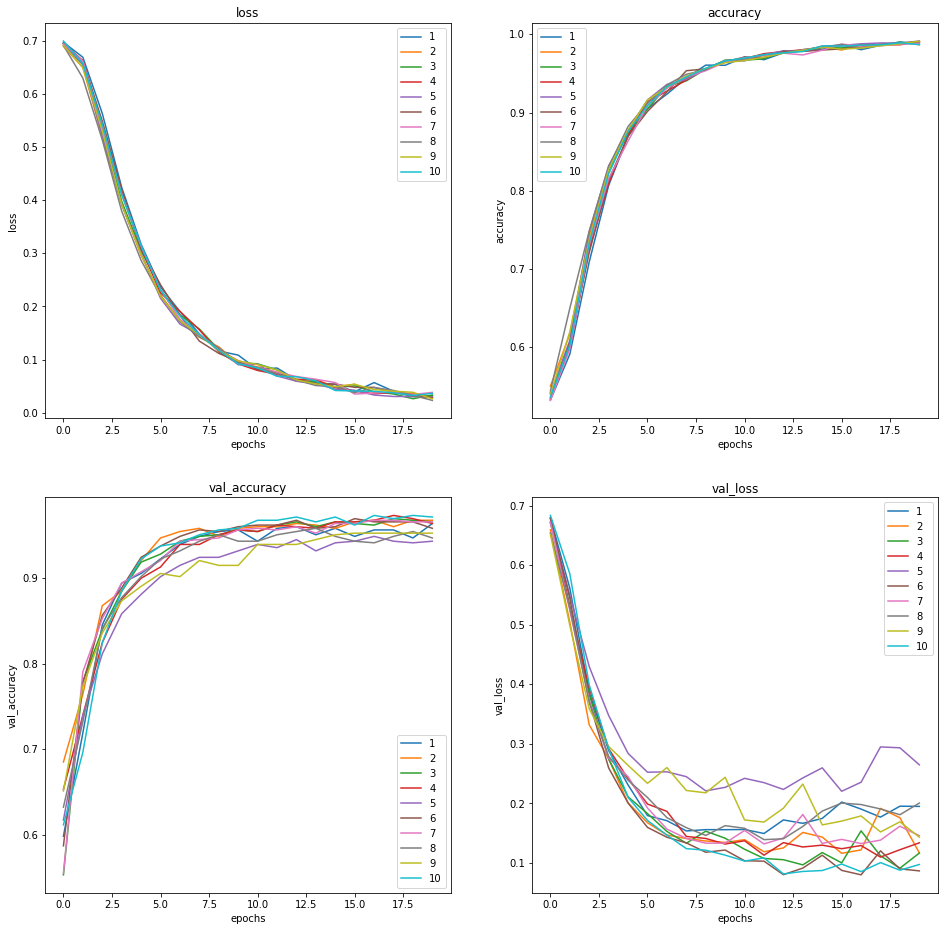

In [ ]:
# Visualize training result
visualize_training(moderna_cnn_lstm_histories, 'moderna_training_cnn_lstm.jpg')

# **Testing & Evaluation Model**

In [ ]:
def visualize_confussion_matrix(y_true, y_pred, title, file_name):
    
    classes = ['Negative', 'Positive']
    cm = confusion_matrix(y_true, y_pred)
    
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    

    plt.savefig(os.path.join('assets/', file_name))
    plt.show()
    
def evaluate_model(y_true, y_pred):
    target_names = ['Negative', 'Positive']
    classification_eval = metrics.classification_report(y_true, y_pred, target_names=target_names)
    print(classification_eval)
    
def visualize_metrics(y_pred_cnn_lstm, 
                      y_pred_cnn,
                      y_pred_lstm,
                      y_true,
                      file_name):
    
    accuracies = [accuracy_score(y_true, y_pred_cnn_lstm),
                accuracy_score(y_true, y_pred_cnn),
                accuracy_score(y_true, y_pred_lstm),]
    precissions = [precision_score(y_true, y_pred_cnn_lstm),
                  precision_score(y_true, y_pred_cnn),
                  precision_score(y_true, y_pred_lstm)]
    recalls = [recall_score(y_true, y_pred_cnn_lstm),
              recall_score(y_true, y_pred_cnn),
              recall_score(y_true, y_pred_lstm)]
    f1_scores = [f1_score(y_true, y_pred_cnn_lstm),
                f1_score(y_true, y_pred_cnn),
                f1_score(y_true, y_pred_lstm)]
    models = ['CNN-LSTM', 'CNN', 'LSTM']
    
    df_metrics = pd.DataFrame({'Model': models,
                               'Accuracy': accuracies,
                               'Precision': precissions,
                               'Recall': recalls,
                               'F1-Score': f1_scores})
    
    df_metrics.plot(x="Model",
                    y=["Accuracy", "Precision", "Recall", "F1-Score"],
                    kind="bar",
                    figsize=(15, 10))
    
    plt.savefig(os.path.join('assets/', file_name))
    plt.show()

## **Sinovac Dataset**

### **Testing & Evaluation:  CNN**

In [ ]:
with tf.device('/device:GPU:0'):
    result = sinovac_cnn_model.evaluate(X_sinovac_test, y_sinovac_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.2}'.format(result[0]))

11/11 [==============================] - 0s 3ms/step - loss: 0.8936 - accuracy: 0.7838
Accuracy test : 78.38%
Loss test : 0.89


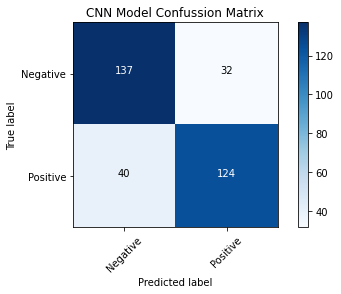

              precision    recall  f1-score   support

    Negative       0.77      0.81      0.79       169
    Positive       0.79      0.76      0.77       164

    accuracy                           0.78       333
   macro avg       0.78      0.78      0.78       333
weighted avg       0.78      0.78      0.78       333



In [ ]:
with tf.device('/device:GPU:0'):
    y_sinovac_pred_raw = sinovac_cnn_model.predict(X_sinovac_test)
    y_sinovac_pred_cnn = np.argmax(y_sinovac_pred_raw, axis=1)
    y_sinovac_true = np.argmax(y_sinovac_test, axis=1)

    visualize_confussion_matrix(y_sinovac_pred_cnn,
                                y_sinovac_true,
                                'CNN Model Confussion Matrix',
                                'sinovac_cnn_confussion.jpg')
    
    evaluate_model(y_sinovac_pred_cnn, y_sinovac_true)

In [ ]:
sinovac_cnn_model.save('model/sinovac_cnn_model.h5')

### **Testing & Evaluation: LSTM**

In [ ]:
with tf.device('/device:GPU:0'):
    result = sinovac_lstm_model.evaluate(X_sinovac_test, y_sinovac_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.2}'.format(result[0]))

11/11 [==============================] - 0s 5ms/step - loss: 0.9485 - accuracy: 0.7688
Accuracy test : 76.88%
Loss test : 0.95


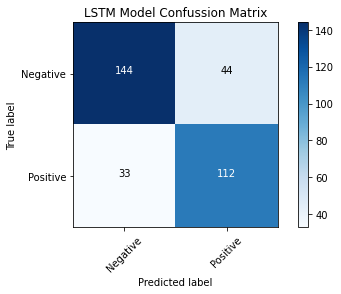

              precision    recall  f1-score   support

    Negative       0.81      0.77      0.79       188
    Positive       0.72      0.77      0.74       145

    accuracy                           0.77       333
   macro avg       0.77      0.77      0.77       333
weighted avg       0.77      0.77      0.77       333



In [ ]:
with tf.device('/device:GPU:0'):
    y_sinovac_pred_raw = sinovac_lstm_model.predict(X_sinovac_test)
    y_sinovac_pred_lstm = np.argmax(y_sinovac_pred_raw, axis=1)
    y_sinovac_true = np.argmax(y_sinovac_test, axis=1)

    visualize_confussion_matrix(y_sinovac_pred_lstm, 
                                y_sinovac_true,
                                'LSTM Model Confussion Matrix',
                                'sinovac_lstm_confussion.jpg')
    
    evaluate_model(y_sinovac_pred_lstm, y_sinovac_true)

In [ ]:
sinovac_lstm_model.save('model/sinovac_lstm_model.h5')


### **Testing & Evaluation:  CNN-LSTM**

In [ ]:
with tf.device('/device:GPU:0'):
    result = sinovac_cnn_lstm_model.evaluate(X_sinovac_test, y_sinovac_test, verbose=1)

    
print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.2}'.format(result[0]))

11/11 [==============================] - 0s 4ms/step - loss: 1.1773 - accuracy: 0.7568
Accuracy test : 75.68%
Loss test : 1.2


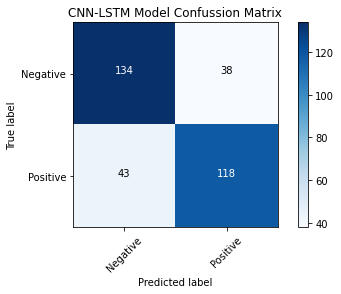

              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77       172
    Positive       0.76      0.73      0.74       161

    accuracy                           0.76       333
   macro avg       0.76      0.76      0.76       333
weighted avg       0.76      0.76      0.76       333



In [ ]:
with tf.device('/device:GPU:0'):
    y_sinovac_pred_raw = sinovac_cnn_lstm_model.predict(X_sinovac_test)
    y_sinovac_pred_cnn_lstm = np.argmax(y_sinovac_pred_raw, axis=1)
    y_sinovac_true = np.argmax(y_sinovac_test, axis=1)

    visualize_confussion_matrix(y_sinovac_pred_cnn_lstm,
                                y_sinovac_true,
                                'CNN-LSTM Model Confussion Matrix',
                                'sinovac_cnn_lstm_confussion.jpg')
    
    evaluate_model(y_sinovac_pred_cnn_lstm, y_sinovac_true)

In [ ]:
sinovac_cnn_lstm_model.save('model/sinovac_cnn_lstm_model.h5')

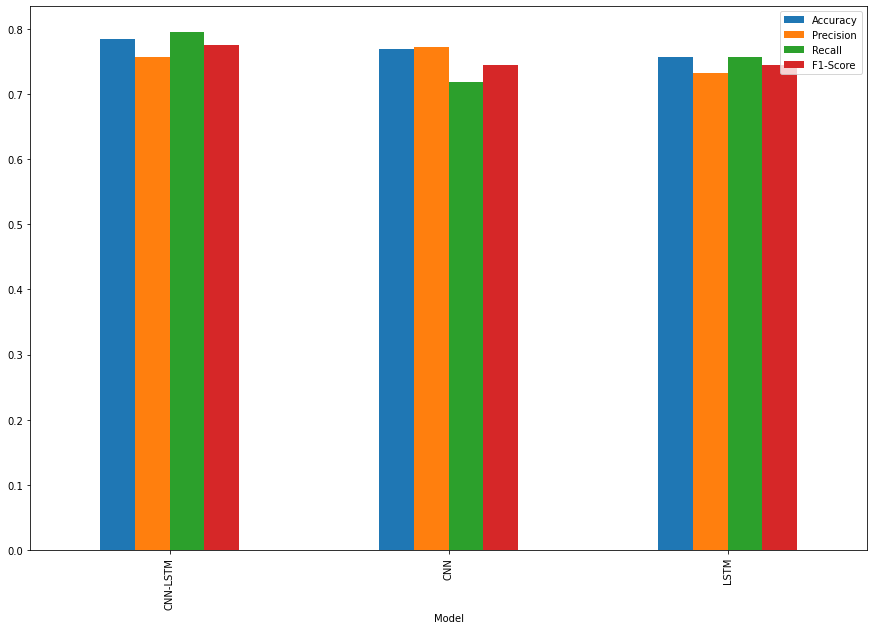

In [ ]:
visualize_metrics(y_sinovac_pred_cnn, 
                  y_sinovac_pred_lstm, 
                  y_sinovac_pred_cnn_lstm, 
                  y_sinovac_true,
                  'sinovac_metrics.jpg')

## **AstraZeneca Dataset**

### **Testing & Evaluation:  CNN**

In [ ]:
with tf.device('/device:GPU:0'):
    result = astrazeneca_cnn_model.evaluate(X_astrazeneca_test, y_astrazeneca_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.2}'.format(result[0]))

6/6 [==============================] - 0s 3ms/step - loss: 0.7836 - accuracy: 0.8043
Accuracy test : 80.43%
Loss test : 0.78


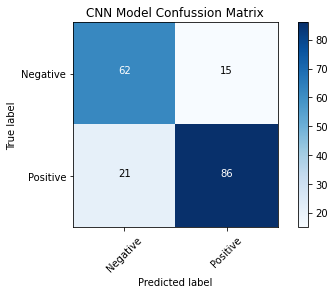

              precision    recall  f1-score   support

    Negative       0.75      0.81      0.77        77
    Positive       0.85      0.80      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.81       184



In [ ]:
with tf.device('/device:GPU:0'):
    y_astrazeneca_pred_raw = astrazeneca_cnn_model.predict(X_astrazeneca_test)
    y_astrazeneca_pred_cnn = np.argmax(y_astrazeneca_pred_raw, axis=1)
    y_astrazeneca_true = np.argmax(y_astrazeneca_test, axis=1)

    visualize_confussion_matrix(y_astrazeneca_pred_cnn,
                                y_astrazeneca_true, 
                                'CNN Model Confussion Matrix',
                                'astrazeneca_cnn_confusion.jpg')
    
    evaluate_model(y_astrazeneca_pred_cnn, y_astrazeneca_true)

In [ ]:
astrazeneca_cnn_model.save('model/astrazeneca_cnn_model.h5')

### **Testing & Evaluation: LSTM**

In [ ]:
with tf.device('/device:GPU:0'):
    result = astrazeneca_lstm_model.evaluate(X_astrazeneca_test, y_astrazeneca_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.2}'.format(result[0]))

6/6 [==============================] - 0s 5ms/step - loss: 1.1104 - accuracy: 0.8152
Accuracy test : 81.52%
Loss test : 1.1


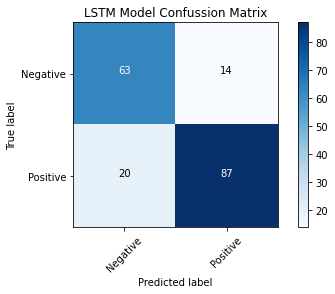

              precision    recall  f1-score   support

    Negative       0.76      0.82      0.79        77
    Positive       0.86      0.81      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



In [ ]:
with tf.device('/device:GPU:0'):
    y_astrazeneca_pred_raw = astrazeneca_lstm_model.predict(X_astrazeneca_test)
    y_astrazeneca_pred_lstm = np.argmax(y_astrazeneca_pred_raw, axis=1)
    y_astrazeneca_true = np.argmax(y_astrazeneca_test, axis=1)

    visualize_confussion_matrix(y_astrazeneca_pred_lstm,
                                y_astrazeneca_true,
                                'LSTM Model Confussion Matrix',
                                'astrazeneca_lstm_confusion.jpg')
    
    evaluate_model(y_astrazeneca_pred_lstm, y_astrazeneca_true)

In [ ]:
astrazeneca_lstm_model.save('model/astrazeneca_lstm_model.h5')

### **Testing & Evaluation:  CNN-LSTM**

In [ ]:
with tf.device('/device:GPU:0'):
    result = astrazeneca_cnn_lstm_model.evaluate(X_astrazeneca_test, y_astrazeneca_test, verbose=1)


print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.2}'.format(result[0]))

6/6 [==============================] - 0s 4ms/step - loss: 0.8583 - accuracy: 0.8152
Accuracy test : 81.52%
Loss test : 0.86


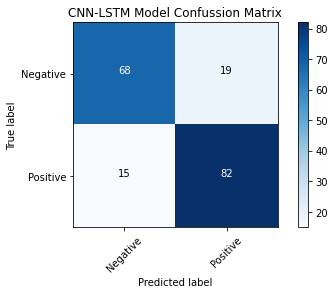

              precision    recall  f1-score   support

    Negative       0.82      0.78      0.80        87
    Positive       0.81      0.85      0.83        97

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



In [ ]:
with tf.device('/device:GPU:0'):
    y_astrazeneca_pred_raw = astrazeneca_cnn_lstm_model.predict(X_astrazeneca_test)
    y_astrazeneca_pred_cnn_lstm = np.argmax(y_astrazeneca_pred_raw, axis=1)
    y_astrazeneca_true = np.argmax(y_astrazeneca_test, axis=1)

    visualize_confussion_matrix(y_astrazeneca_pred_cnn_lstm, 
                                y_astrazeneca_true,
                                'CNN-LSTM Model Confussion Matrix',
                                'astrazeneca_cnn_lstm_confussion.jpg')
    
    evaluate_model(y_astrazeneca_pred_cnn_lstm, y_astrazeneca_true)

In [ ]:
astrazeneca_cnn_lstm_model.save('model/astrazeneca_cnn_lstm_model.h5')

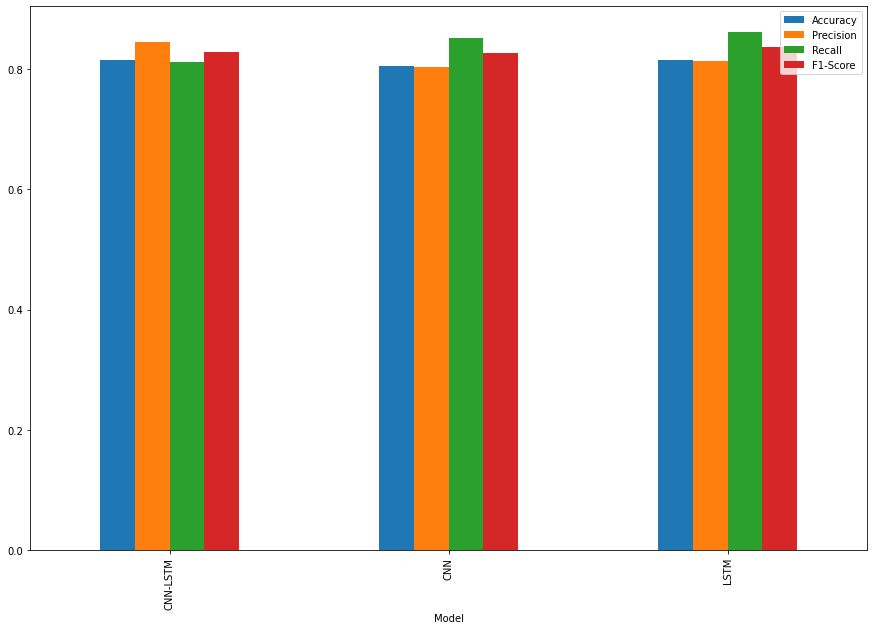

In [ ]:
visualize_metrics(y_astrazeneca_pred_cnn_lstm, 
                  y_astrazeneca_pred_cnn, 
                  y_astrazeneca_pred_lstm, 
                  y_astrazeneca_true,
                  'astrazeneca_metrics.jpg')


## **Pfizer Dataset**

### **Testing & Evaluation:  CNN**

In [ ]:
with tf.device('/device:GPU:0'):
    result = pfizer_cnn_model.evaluate(X_pfizer_test, y_pfizer_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.3}'.format(result[0]))

6/6 [==============================] - 0s 8ms/step - loss: 1.1437 - accuracy: 0.6885
Accuracy test : 68.85%
Loss test : 1.14


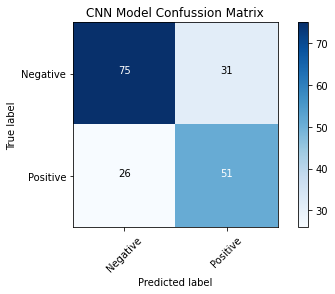

              precision    recall  f1-score   support

    Negative       0.74      0.71      0.72       106
    Positive       0.62      0.66      0.64        77

    accuracy                           0.69       183
   macro avg       0.68      0.68      0.68       183
weighted avg       0.69      0.69      0.69       183



In [ ]:
with tf.device('/device:GPU:0'):
    y_pfizer_pred_raw = pfizer_cnn_model.predict(X_pfizer_test)
    y_pfizer_pred_cnn = np.argmax(y_pfizer_pred_raw, axis=1)
    y_pfizer_true = np.argmax(y_pfizer_test, axis=1)

    visualize_confussion_matrix(y_pfizer_pred_cnn,
                                y_pfizer_true,
                                'CNN Model Confussion Matrix',
                                'pfizer_cnn_confusion.jpg')
    
    evaluate_model(y_pfizer_pred_cnn, y_pfizer_true)

In [ ]:
pfizer_cnn_model.save('model/pfizer_cnn_model.h5')

### **Testing & Evaluation: LSTM**

In [ ]:
with tf.device('/device:GPU:0'):
    result = pfizer_lstm_model.evaluate(X_pfizer_test, y_pfizer_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.3}'.format(result[0]))

6/6 [==============================] - 0s 4ms/step - loss: 1.0837 - accuracy: 0.6995
Accuracy test : 69.95%
Loss test : 1.08


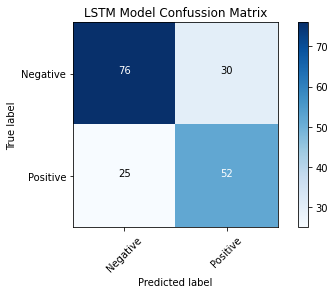

              precision    recall  f1-score   support

    Negative       0.75      0.72      0.73       106
    Positive       0.63      0.68      0.65        77

    accuracy                           0.70       183
   macro avg       0.69      0.70      0.69       183
weighted avg       0.70      0.70      0.70       183



In [ ]:
with tf.device('/device:GPU:0'):
    y_pfizer_pred_raw = pfizer_lstm_model.predict(X_pfizer_test)
    y_pfizer_pred_lstm = np.argmax(y_pfizer_pred_raw, axis=1)
    y_pfizer_true = np.argmax(y_pfizer_test, axis=1)

    visualize_confussion_matrix(y_pfizer_pred_lstm,
                                y_pfizer_true,
                                'LSTM Model Confussion Matrix',
                                'pfizer_lstm_confusion.jpg')
    
    evaluate_model(y_pfizer_pred_lstm, y_pfizer_true)

In [ ]:
pfizer_lstm_model.save('model/pfizer_lstm_model.h5')

### **Testing & Evaluation:  CNN-LSTM**

In [ ]:
with tf.device('/device:GPU:0'):
    result = pfizer_cnn_lstm_model.evaluate(X_pfizer_test, y_pfizer_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.3}'.format(result[0]))

6/6 [==============================] - 0s 4ms/step - loss: 1.1690 - accuracy: 0.7104
Accuracy test : 71.04%
Loss test : 1.17


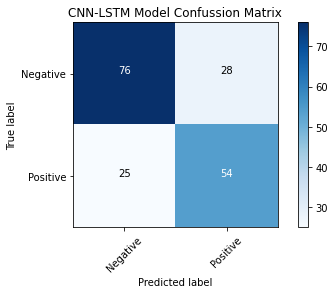

              precision    recall  f1-score   support

    Negative       0.75      0.73      0.74       104
    Positive       0.66      0.68      0.67        79

    accuracy                           0.71       183
   macro avg       0.71      0.71      0.71       183
weighted avg       0.71      0.71      0.71       183



In [ ]:
with tf.device('/device:GPU:0'):
    y_pfizer_pred_raw = pfizer_cnn_lstm_model.predict(X_pfizer_test)
    y_pfizer_pred_cnn_lstm = np.argmax(y_pfizer_pred_raw, axis=1)
    y_pfizer_true = np.argmax(y_pfizer_test, axis=1)

    visualize_confussion_matrix(y_pfizer_pred_cnn_lstm,
                                y_pfizer_true,
                                'CNN-LSTM Model Confussion Matrix',
                                'pfizer_cnn_lstm_confusion.jpg')
    
    evaluate_model(y_pfizer_pred_cnn_lstm, y_pfizer_true)

In [ ]:
pfizer_cnn_lstm_model.save('model/pfizer_cnn_lstm_model.h5')

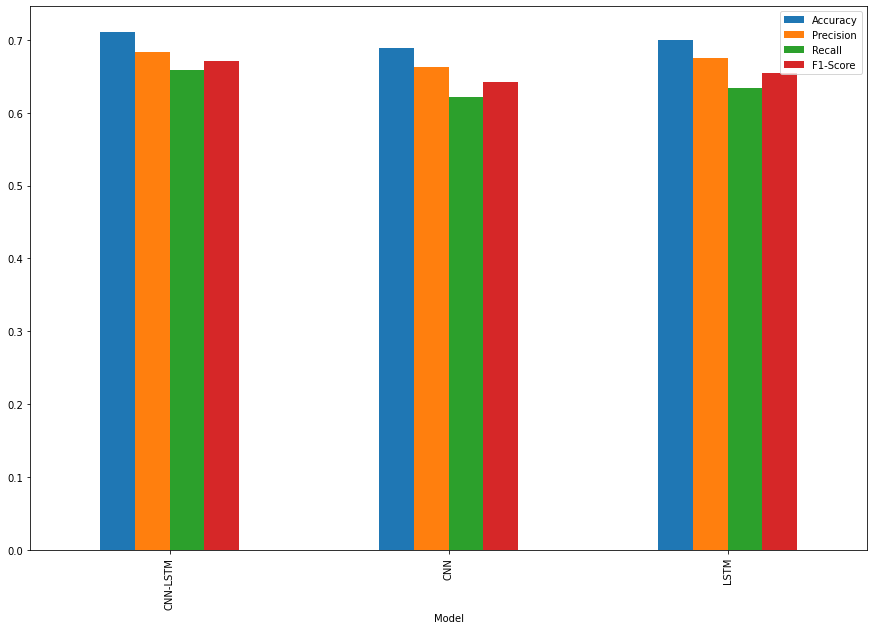

In [ ]:
visualize_metrics(y_pfizer_pred_cnn_lstm, 
                  y_pfizer_pred_cnn, 
                  y_pfizer_pred_lstm, 
                  y_pfizer_true,
                  'pfizer_metrics.jpg')

## **Moderna Dataset**

### **Testing & Evaluation:  CNN**

In [ ]:
with tf.device('/device:GPU:0'):
    result = moderna_cnn_model.evaluate(X_moderna_test, y_moderna_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.3}'.format(result[0]))

9/9 [==============================] - 0s 5ms/step - loss: 1.0228 - accuracy: 0.7698
Accuracy test : 76.98%
Loss test : 1.02


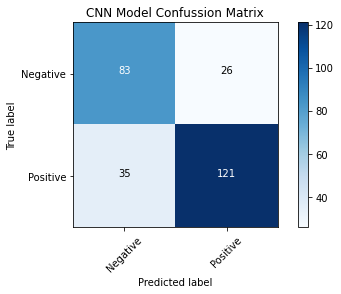

              precision    recall  f1-score   support

    Negative       0.70      0.76      0.73       109
    Positive       0.82      0.78      0.80       156

    accuracy                           0.77       265
   macro avg       0.76      0.77      0.76       265
weighted avg       0.77      0.77      0.77       265



In [ ]:
with tf.device('/device:GPU:0'):
    y_moderna_pred_raw = moderna_cnn_model.predict(X_moderna_test)
    y_moderna_pred_cnn = np.argmax(y_moderna_pred_raw, axis=1)
    y_moderna_true = np.argmax(y_moderna_test, axis=1)

    visualize_confussion_matrix(y_moderna_pred_cnn,
                                y_moderna_true,
                                'CNN Model Confussion Matrix',
                                'moderna_cnn_confusion.jpg')
    
    evaluate_model(y_moderna_pred_cnn, y_moderna_true)

In [ ]:
moderna_cnn_model.save('model/moderna_cnn_model.h5')

### **Testing & Evaluation: LSTM**

In [ ]:
with tf.device('/device:GPU:0'):
    result = moderna_lstm_model.evaluate(X_moderna_test, y_moderna_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.3}'.format(result[0]))

9/9 [==============================] - 0s 4ms/step - loss: 1.0705 - accuracy: 0.7509
Accuracy test : 75.09%
Loss test : 1.07


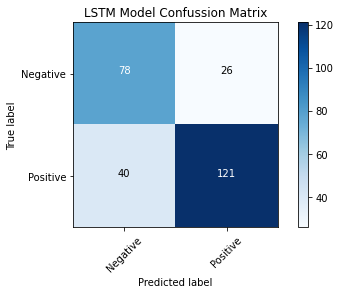

              precision    recall  f1-score   support

    Negative       0.66      0.75      0.70       104
    Positive       0.82      0.75      0.79       161

    accuracy                           0.75       265
   macro avg       0.74      0.75      0.74       265
weighted avg       0.76      0.75      0.75       265



In [ ]:
with tf.device('/device:GPU:0'):
    y_moderna_pred_raw = moderna_lstm_model.predict(X_moderna_test)
    y_moderna_pred_lstm = np.argmax(y_moderna_pred_raw, axis=1)
    y_moderna_true = np.argmax(y_moderna_test, axis=1)

    visualize_confussion_matrix(y_moderna_pred_lstm,
                                y_moderna_true,
                                'LSTM Model Confussion Matrix',
                                'moderna_lstm_confusion.jpg')
    
    evaluate_model(y_moderna_pred_lstm, y_moderna_true)

In [ ]:
moderna_lstm_model.save('model/moderna_lstm_model.h5')

### **Testing & Evaluation:  CNN-LSTM**

In [ ]:
with tf.device('/device:GPU:0'):
    result = moderna_cnn_lstm_model.evaluate(X_moderna_test, y_moderna_test, verbose=1)

print('Accuracy test : {:.2f}%'.format(result[1]*100))
print('Loss test : {:.3}'.format(result[0]))

9/9 [==============================] - 0s 4ms/step - loss: 1.1169 - accuracy: 0.7396
Accuracy test : 73.96%
Loss test : 1.12


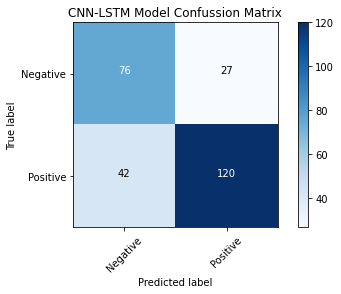

              precision    recall  f1-score   support

    Negative       0.64      0.74      0.69       103
    Positive       0.82      0.74      0.78       162

    accuracy                           0.74       265
   macro avg       0.73      0.74      0.73       265
weighted avg       0.75      0.74      0.74       265



In [ ]:
with tf.device('/device:GPU:0'):
    y_moderna_pred_raw = moderna_cnn_lstm_model.predict(X_moderna_test)
    y_moderna_pred_cnn_lstm = np.argmax(y_moderna_pred_raw, axis=1)
    y_moderna_true = np.argmax(y_moderna_test, axis=1)

    visualize_confussion_matrix(y_moderna_pred_cnn_lstm,
                                y_moderna_true,
                                'CNN-LSTM Model Confussion Matrix',
                                'moderna_cnn_lstm_confusion.jpg')
    
    evaluate_model(y_moderna_pred_cnn_lstm, y_moderna_true)

In [ ]:
moderna_cnn_lstm_model.save('model/moderna_cnn_lstm_model.h5')

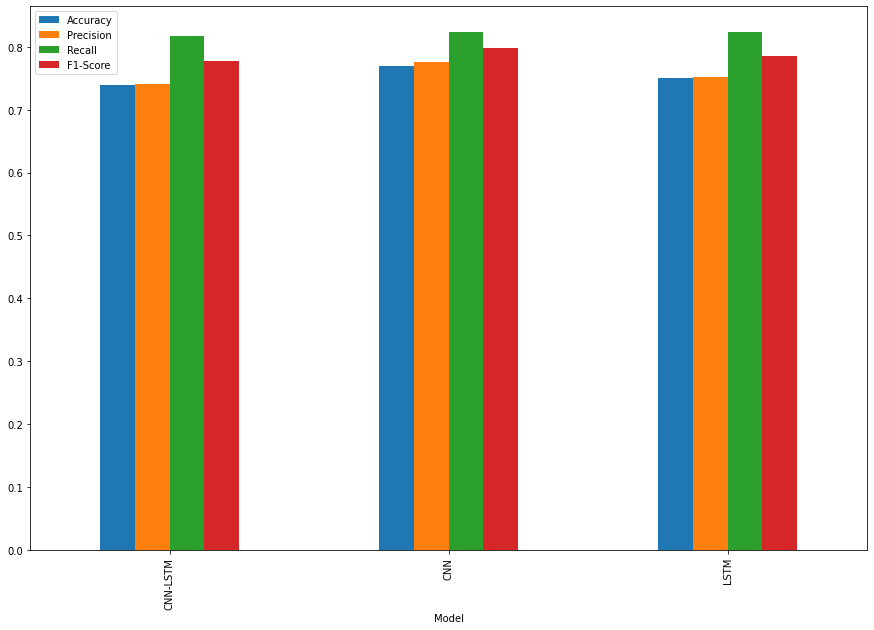

In [ ]:
visualize_metrics(y_moderna_pred_cnn_lstm, 
                  y_moderna_pred_cnn, 
                  y_moderna_pred_lstm, 
                  y_moderna_true,
                  'moderna_metrics.jpg')